# Chekhov's writing style analysis: A shift from actions to inner struggles and finally the balanced point

## Yuming Huang
Instructions:

1. Replace "yourname" in the title of this notebook, and "your name here" in the markdown above, with your name.
Create a title for your final project. Preferably, this should indicate what your argument is. Replace "your title here" in the markdown above with your title.
2. Write your paper, and include everything (your prose in Markdown, your code, and your figures) in this notebook. Don't include the texts you're analyzing. If you generated your corpus programmatically (i.e. using corpus-db.org or some fancy Python), maybe you'll want to include that in the code somewhere here. Your notebook file (.ipynb) will be the only thing you turn in.
3. Annotate your code using markdown cells, and/or comment lines (lines beginning with #), explaining why you're doing what you're doing. If one of your functions takes certain parameters, for instance, why did you choose those parameters?
4. Prune your notebook of unnecessary or redundant code. Run all your code again, to show that it works as-is. Each code cell should have a number in it, and an output, if applicable.
5. Proofread well! If English is not your first language, you might consider making an appointment with the Writing Center to get help polishing the language of your paper. At minimum, you'll want to use a spell checker and maybe even an automatic grammar-checking service like Grammerly. (Of course, you now have the tools to analyze your own writing, if you want. You can get your markdown text into Python by adapting the word count function below, and use it to analyze your most frequent n-grams!) You might also consider organizing a mutual editing session with classmates.
6. Ensure that you have no more than three plots (figures). One figure with several subplots is OK, and counts as one figure.
7. If you quote from or reference literary works, or works of criticirm, provide in-text parenthetical citations. Then create a bibliographic entry for each work you cite, and include them at the end. Unless your discipline requires a different format, use MLA Style as the format for your bibliography, and title it "works cited."
8. Replace the value of the filename variable in the wordcount cell below to the name your file. (E.g., Jonathan-Final.ipynb.) Then run the wordcount cell. Ensure that your paper is between 1000 and 2000 words, so it doesn't give you any errors or warnings.
9. Optionally, and for a 5% bonus, add your notebook to the /Projects directory of the course repository, and submit it as a pull request. Your project will then become public.
10. Email me your .ipynb file: jonathan.reeve@columbia.edu. Please email me only your .ipynb file, alone and uncompressed. Please don't respond to an existing email, but create a new email, with the subject: Yourname: Final Project, replacing yourname with your name. Do this regardless of whether you also submit a pull request.
11. Celebrate! You've finished your final project, and gloriously completed Introduction to Computational Literary Analysis!

In [1]:
# Import all your libraries here, and only here, please.
import nltk
from nltk import word_tokenize, sent_tokenize, pos_tag
from matplotlib import pyplot as plt
from nltk.util import ngrams
from nltk.corpus import wordnet as wn
from collections import Counter
import pandas as pd
import os
from sklearn.decomposition import PCA,LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from pylab import *
import numpy as np
from sklearn.cluster import KMeans
import pyLDAvis.sklearn
from collections import Counter
import matplotlib as mpl
%matplotlib inline

# Don't remove this line. It's necessary for the wordcount function 
# below to work. 
from IPython.nbformat import current

# This is to make your plots a little bigger.
# You may adjust this, but be careful of making your plots too big or too small.
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 30]

C:\Users\93264\Anaconda3\lib\site-packages\IPython\nbformat.py:13: ShimWarning: The `IPython.nbformat` package has been deprecated since IPython 4.0. You should import from nbformat instead.
  "You should import from nbformat instead.", ShimWarning)
C:\Users\93264\Anaconda3\lib\site-packages\nbformat\current.py:19: UserWarning: nbformat.current is deprecated.

- use nbformat for read/write/validate public API
- use nbformat.vX directly to composing notebooks of a particular version

  """)


### Wordcount Function

Please replace `Yourname-Final.ipynb` with the filename of this notebook. For instance, if my name is Jonathan, and I've renamed this notebook to `Jonathan-Final.ipynb`, I'd change `filename = 'Yourname-Final.ipynb'` below to `filename = 'Jonathan-Final.ipynb`. 

In [2]:
filename = 'YumingHuang-Final.ipynb'

if filename == 'Yourname-Final.ipynb': 
    raise ValueError("You forgot to change the filename above!")

with open('YumingHuang-Final.ipynb', encoding='utf-8') as f:
    nb = current.read(f, 'json')

wordCount = 0

for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        wordCount += len(cell['source'].replace('#', '').lstrip().split(' '))

# This is the word count of my instructions. 
# My instructions obviously don't count toward the final word count, 
tare = 533

wordCount = wordCount - tare

print("Total words: {}".format(wordCount))

if wordCount < 1000: 
    raise Warning('Your paper has not yet met the minimum required length.')
if wordCount > 2000: 
    raise Warning('Your paper has exceeded the maximum allowed length. Please edit for concision.')

Total words: 1925


In [3]:
%cd Desktop/things/Chekhov/

C:\Users\93264\Desktop\things\Chekhov


# The changes among the writings of Chekhov's

When I read the early novels of Chekhov's, I found the length of which is short but the irony is intense. However, with the time passing, I find the novels are becoming longer and longer, the writing targets are not limited to the actions of crownish people who live in cracks, but also to have lots of details about the inner behaviors of the people. So, I have made some hyposis below:

1. The target objects shifted from the description of people's outside behaviors to the description of people's inner struggles, along with social relationship. And finally reached a balance.

2. With the length of articles increases, Chekhov can focus more on the details of things, not only there can be more dialogs, but also can be more interactions between people.



## The shift from actions to inner struggles and social relationship, finally reaching a balance


I have read lots of Chekhov's stories and found that in the early stage of his writing, he was familar with the description of people's actions and dialogs, which are used to show crownish characterestics of the characters' and the conflicts between maybe just a few words. 

Like in the _A Chameleon_,written in 1882-1885, he used lots of description to show the changes of the police's attitude towards the dog, influenced just by the possible owner of the dog. For example, someone said "I fancy it's General Zhigalov's"(para 21) when the police first asks who is the owner of the dog, then it comes the interesting description that he wants to take off his coat and said "It's a little dog, and you are a great hulking fellow! You must have scratched your finger with a nail, and then the idea struck you to get damages for it. We all know . . . your sort! I know you devils"!(para 23) When later, someone has doubted that the dog cannot beb the General's dog, the police changes his attitude suddenly and said "You've been injured, Hryukin, and we can't let the matter drop. . . . We must give them a lesson"!(para 37) And, when there is another voice to tell the police that the dog might be the General's brother's, the police just wants to put on his coat again and decides to punlish the worker just like what he wants to do when he heards that the dog might belongs to the General. In a story short like this, seven thousand words, there is no more place for him to put in lots of details but with the description of the dialogs and some minimal details of contrasted actions to show the confilits inside the characters implicitly.

With the time passing, there are more inner emotional descriptions deadded into the stories. Like _The Man In A Case_, written in 1896-1904, Chekhov writes in his late years, has put lots of details of what the old fellow looks like. Chekhov has descriebed many aspects of him; "a tall, lean old fellow with long moustaches, was sitting outside the door, smoking a pipe in the moonlight. Burkin was lying within on the hay, and could not be seen in the darkness."(para 5)On the other side, the Chekhov uses an event about  the old fellow's dating to show his narrow and limited ideas. Also, there are some direct psychological descriptions about both the old fellow and other people around him. There are more and more explicit description of other people, and there is no longer a one-man show. All the new status above cannot be seen at the early stage of Chekhov's writing and it's not surprisingly that the length of the story is more than four times the length of _A Chameleon_.

And, from figure one, we can see that there is absolutly changes among the writings of the Chekhov's. The more interesting part is that, the two end of the writing periods in the figure are not the start and end points of the time. At last, there is a rebound from the bottom of the figure into the middle, which can suggest that by thinking through all his life, Chekhov then came to a balanced state that can realize the balance between the descrition of inside and outside people. From figure three, we can see there is a huge shift in communication. More verbs are used. It can suggest that communication is becoming more and more important. As I have mentioned, there is no longer an one-man show, more interactions are added into the stories.

## More details and more interactions

With the length increase, I wonder what's new is put into the stories. By close reading, I found there are more and more details added into the stories. 

At first, all the item descriptions are for contradictory comparisons. Like in the _A Chameleon_, the item of the coat, the dog, the worker are all the must components of the articles, which shows the contraries inside them. The dog's fate is judged by its owner, which is a society that doesn't treat people like human beings. The coat suggests the embarrassing circumstances that the police is in, and the actions of on and off are the signals. In a length of seven thousand words, Chekhov just used the components to show the irony。

And then we find that more and more details are added into the stories. Like in _A Day In The Country_, written in 1886, has added lots of details to describe the stage itself, but not to promote the development of the irony, "A dark leaden-coloured mass is creeping over the sky towards the sun. Red zigzags of lightning gleam here and there across it. There is a sound of far-away rumbling. A warm wind frolics over the grass, bends the trees, and stirs up the dust. "(para 1)Futher more, in the later stage, with the length becoming longer and longer, not only the environment, but also adding some description of other people's thoughts, who are not main character. 

Also, from the fiture two, we can see that there is no big change among the components ratio, which means Chekhov just used the same structure into the stories. More details, more descriptions and more aspects of the descriptions. The length has increased the amount of the details and made the stories not just an intense irony, but a lively story with emotions insides.

## Conclusions
The writing style of Chekhov has changed with time passing, he focusd more on the details, along with interactions and social relationship.
1. From PCA test, after we have splited the passages into parts of the same length, the different articles of different writing periods are distinguishable.
2. With the topic analysis, the frequency of different pos in the topics show us a tendency of changes of writing styles but not the changes of writing structure. He just added more details but not to use other kinds of presentation to replace his style.
3. The frequency of different synsets suggest that Chekhov focused more on inner, psychological activies with time passing and the writing themes have not obviously changed.

## nameList and nameLength

In [4]:
List = os.listdir()#get all the file names

In [5]:
'''
names = []
for name in List:
    names.append(name.split('.')[0])
    locals()[name.split('.')[0]] = open(name).read()#construct variables for all the files
'''

"\nnames = []\nfor name in List:\n    names.append(name.split('.')[0])\n    locals()[name.split('.')[0]] = open(name).read()#construct variables for all the files\n"

In [6]:
def print2Lists(list1, list2):
    if len(list1)==len(list2):
        for i in range(len(list1)):
            print(list1[i],list2[i])
    else:
        print("the lengths of the two list are not the same and cannot be printed")

In [7]:
allText = [open(name).read() for name in List]

In [8]:
nameList = [name.split('.')[0] for name in List]

In [9]:
nameLength = [len(sto) for sto in allText]

In [10]:
print2Lists(nameList, nameLength)

1882-1885__A_Chameleon 7121
1882-1885__A_Dead_Body 9693
1882-1885__Oh!_The_Public 7566
1886__A_Day_In_The_Country 12971
1886__A_Joke 8855
1886__A_Nightmare 29586
1887__A_Problem 14983
1887__The_Beggar 11001
1887__The_Lottery_Ticket 10460
1888-1895__ Peasant_Wives 30463
1888-1895__The_Horse_Stealers 35901
1888-1895__The_Murder 66938
1896-1904__About_Love 20816
1896-1904__At_Home 27081
1896-1904__The_Man_In_A_Case 29355


In [11]:
yearList = list(set([name.split('__')[0] for name in nameList]))

In [12]:
yearList.sort()

In [13]:
yearLength =[]
for year in yearList:
    length = 0
    for i in range(len(nameList)):
        #print(nameList[i].split('__')[0], year)
        if nameList[i].split('__')[0]==year:
            length+=nameLength[i]
            #print('yeah')
    yearLength.append(length)

In [14]:
print2Lists(yearList, yearLength)

1882-1885 24380
1886 51412
1887 36444
1888-1895 133302
1896-1904 77252


It shows that the length of the articles are becoming longer and longer, which means it is necessary to put the length factor into consideration when doing pca tests

# PCA test

So, first I read in all the files, tokenize them and then split them into the same length of the minimal length of the article. As I have mentioned before, the length of different words of different periods vary, I have show a contrast between before and after spliting. And, I also want to know whether idf will bother.

In [15]:
least = 100000
for length in nameLength:
    if length<least:
        least = length

In [16]:
for name in allText:
    print(name[:20])#to check if the articles are all well

A CHAMELEON
by Anton
A DEAD BODY
by Anton
OH! THE PUBLIC
by An
A DAY IN THE COUNTRY
A JOKE
by Anton Chek
A NIGHTMARE
by Anton
A PROBLEM
by Anton C
THE BEGGAR
by Anton 
THE LOTTERY TICKET
b
PEASANT WIVES
by Ant
THE HORSE-STEALERS
b
THE MURDER
by Anton 
ABOUT LOVE
by Anton 
AT HOME
by Anton Che
THE MAN IN A CASE
by


In [17]:
nameListNew = []
allTextNew = []
'''
for name in namesLength:   #to divide articles into parts of the same length 
    length = namesLength[name]
    parts = int(length/least)
    text = locals()[name]
    print("the name is",name,"and the parts number is: ",parts)
    if parts<=1:
        print('continue')
        names_new.append(name)
        continue
        
    for i in range(parts):
        locals()[name+'_part_'+str(i)] = text[(i-1)*least:i*least]
        names_new.append(name+'_part_'+str(i))
'''

for i in range(len(nameLength)):
    length = nameLength[i]
    parts = int(length/least)
    text = allText[i]
    print("the name is", nameList[i],"and the parts number is: ", parts)
    if parts<=1:
        print('continue')
        nameListNew.append(nameList[i])
        allTextNew.append(text[:least])
        continue
    for a in range(parts):
        nameListNew.append(nameList[i]+"Part"+str(a))
        #print("the text is {}".format(text[(a)*least:(a+1)*least+20]))
        allTextNew.append(text[(a)*least:(a+1)*least])
    

the name is 1882-1885__A_Chameleon and the parts number is:  1
continue
the name is 1882-1885__A_Dead_Body and the parts number is:  1
continue
the name is 1882-1885__Oh!_The_Public and the parts number is:  1
continue
the name is 1886__A_Day_In_The_Country and the parts number is:  1
continue
the name is 1886__A_Joke and the parts number is:  1
continue
the name is 1886__A_Nightmare and the parts number is:  4
the name is 1887__A_Problem and the parts number is:  2
the name is 1887__The_Beggar and the parts number is:  1
continue
the name is 1887__The_Lottery_Ticket and the parts number is:  1
continue
the name is 1888-1895__ Peasant_Wives and the parts number is:  4
the name is 1888-1895__The_Horse_Stealers and the parts number is:  5
the name is 1888-1895__The_Murder and the parts number is:  9
the name is 1896-1904__About_Love and the parts number is:  2
the name is 1896-1904__At_Home and the parts number is:  3
the name is 1896-1904__The_Man_In_A_Case and the parts number is:  4


In [18]:
tfidf = TfidfVectorizer(use_idf=False, max_features=1500)
tfidf_ = TfidfVectorizer(use_idf=True, max_features=1500)

In [19]:
tfTable = tfidf.fit_transform(allText).todense()
tfTable_new = tfidf.fit_transform(allTextNew).todense()
tfTable_ = tfidf_.fit_transform(allText).todense()
tfTable_new_ = tfidf_.fit_transform(allTextNew).todense()

In [20]:
pca = PCA(n_components = 50)

In [21]:
pcaOut= pca.fit_transform(tfTable)
pcaOut_new = pca.fit_transform(tfTable_new)
pcaOut_= pca.fit_transform(tfTable_)
pcaOut_new_ = pca.fit_transform(tfTable_new_)

In [22]:
Kmeans = KMeans(n_clusters=7, random_state =0).fit_predict(pcaOut)
Kmeans_new = KMeans(n_clusters=7, random_state=0).fit_predict(pcaOut_new)
Kmeans_ = KMeans(n_clusters=7, random_state =0).fit_predict(pcaOut_)
Kmeans_new_ = KMeans(n_clusters=7, random_state=0).fit_predict(pcaOut_new_)

"\nplt.subplot(248)\nplt.scatter(pcaOut_new_[:,0],pcaOut_new_[:,1],c=Kmeans_new_)\nplt.title('1-8-clustering')\n"

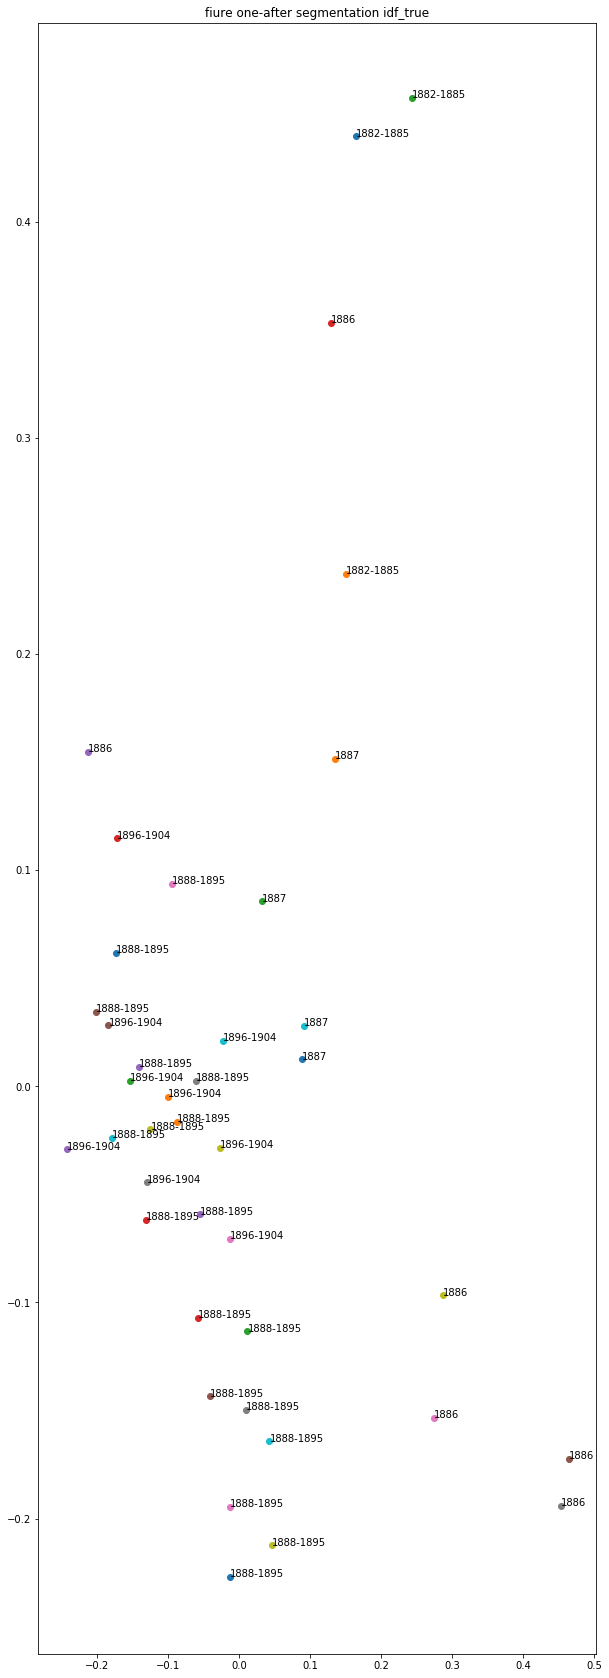

In [23]:
plt.rcParams['figure.figsize'] = [10, 30]
'''
plt.subplot(241)
xs, ys = pcaOut[:,0],pcaOut[:,1]
for i in range(len(xs)):
    plt.scatter(xs[i],ys[i])
    plt.annotate(nameList[i],(xs[i],ys[i]))
plt.title('1-1-text')

plt.subplot(242)
plt.scatter(pcaOut[:,0],pcaOut[:,1],c=Kmeans)

plt.title('1-2-clustering')


plt.subplot(245)

xs_n, ys_n = pcaOut_new[:,0],pcaOut_new[:,1]
for i in range(len(xs_n)):
    plt.scatter(xs_n[i],ys_n[i])
    plt.annotate(nameListNew[i].split('__')[0],(xs_n[i],ys_n[i]))
    if xs_n[i]>0.4:
        print(nameListNew[i])
plt.title('figure 1-after segmentation')


plt.subplot(246)
plt.scatter(pcaOut_new[:,0],pcaOut_new[:,1],c=Kmeans_new)
plt.title('1-6-clustering')

plt.subplot(243)
xs, ys = pcaOut_[:,0],pcaOut_[:,1]
for i in range(len(xs)):
    plt.scatter(xs[i],ys[i])
    plt.annotate(nameList[i],(xs[i],ys[i]))
plt.title('1-3-text idf_true')

plt.subplot(244)
plt.scatter(pcaOut_[:,0],pcaOut_[:,1],c=Kmeans_)
plt.title('1-4-clustering')

plt.subplot(247)
'''
xs_n, ys_n = pcaOut_new_[:,0],pcaOut_new_[:,1]
for i in range(len(xs_n)):
    plt.scatter(xs_n[i],ys_n[i])
    plt.annotate(nameListNew[i].split('__')[0],(xs_n[i],ys_n[i]))
plt.title('fiure one-after segmentation idf_true')

'''
plt.subplot(248)
plt.scatter(pcaOut_new_[:,0],pcaOut_new_[:,1],c=Kmeans_new_)
plt.title('1-8-clustering')
'''

From the figure one, we can see a obvious change from time "1882-1885" to the time"1896-1904", which confirms me hyposis that the style of Chekhov's writing has changed with time passing. The time "1886" is kind of transitional phase, and his style of writing may be not stable and it shows some characters similar to the time "1888-1895" and time"1887". In general, the graph does tell us that the writing style of Chekhov has changed with the time line.

# Topic analyze

As I am considering the difference between different writing peirods, so I would like to see if the pos of the articles of the different writing periods differ.

In this part, I follow the steps talked in the class and analyze topics of different year periods. After finding the topics of different articles, I then count the frequency of different words in the topics of articles. If the word appears more than one topics, I think the word will have some special meaning for Chekhov. After doing that, I then use pos_tag function to find the pos of the words. I cannot easily find the meaning of the words in the context, so I try to analyze the words with their pairs of pos. I store the pairs of pos under the different periods of time. After that, I use pd.DataFrame to store the frequency and plot them.

In [24]:
def chunk(tokens, size):
    return list(zip(*[tokens[i::size] for i in range(size)]))

In [25]:
allTextTokens = [word_tokenize(text) for text in allText]

In [26]:
allTextChunks = [chunk(text,500) for text in allTextTokens]

In [27]:
for text in range(len(allTextChunks)):
    allTextChunks[text] = [' '.join(chunk) for chunk in allTextChunks[text]]

In [28]:
cv = CountVectorizer(min_df=0.2, max_df=0.8, stop_words='english')

In [29]:
lda = LatentDirichletAllocation(n_topics=15, learning_method='online')

In [30]:
allTextTopicLabels = {}
ldaOutDic = {}
cvDic = {}
countsDic = {}
for text in range(len(allTextChunks)):
    cv = CountVectorizer(min_df=0.01, max_df=0.95, stop_words='english')
    counts = cv.fit_transform(allTextChunks[text])
    wordLabels=cv.get_feature_names()
    ldaOut = lda.fit_transform(counts)
    ldaOutDic[nameList[text]] = ldaOut
    cvDic[nameList[text]] = cv
    countsDic[nameList[text]]=counts
    print("Topic of {}".format(nameList[text]))
    topicLabels = []
    for i, topic in enumerate(lda.components_):
        print("Topic {} ".format(i))
        topicLabel = ' '.join([wordLabels[i] for i in topic.argsort()[:-10 - 1:-1]])
        print(topicLabel)
        topicLabels.append(topicLabel)
    allTextTopicLabels[nameList[text]]=topicLabels

C:\Users\93264\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
C:\Users\93264\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
C:\Users\93264\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
C:\Users\93264\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


Topic of 1882-1885__A_Chameleon
Topic 0 
gooseberries blockhead nonsensical street inquires makes teach need cigarette thinking
Topic 1 
general like sticking law ve fined low god unbuttoned muzzle
Topic 2 
like lads arm eyes yellow use yard protruded yes shirt
Topic 3 
body scratched fined gate culprit getting good sha wearing row
Topic 4 
looked joke need lesson surely puppy asking world means damned
Topic 5 
yard beast countenances creature standing sharp equal coat regulations great
Topic 6 
pushing sound nonsensical parcel shouted recognises hind culprit hears drunken
Topic 7 
ll wo lies teach zhigalov telling yeldyrin general law damages
Topic 8 
rogue mad got swine nowadays make came dear draw square
Topic 9 
general like time stray know waste valuable tell need sense
Topic 10 
gate prohibited parcel confiscated came telling lies holding getting week
Topic 11 
waste excuse sieve sees decide arm walking creature blackguard body
Topic 12 
row sent sieve white confiscated waistcoat

C:\Users\93264\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
C:\Users\93264\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


began went decent like incredible wife old hands understand altar
Topic 1 
wife said priest school tea ashamed like saw began hands
Topic 2 
said doing thoughts wife sit pitiful cordially called begin saints
Topic 3 
thought glass people reverend question face like tea took bishop
Topic 4 
loathing positively bowing imagined faces conducted fortune cleaving gone failing
Topic 5 
nice lives grotesque sinkino thirty complete year books brimmed liberal
Topic 6 
forth fault ikons pull held tuesday saying begin service month
Topic 7 
haste eyes hand standing flustered smart pavel come pull roubles
Topic 8 
roubles beg living know avraamy god end said sinkino believe
Topic 9 
face said began looking good time man thought priest chair
Topic 10 
way rouble held salary blinks heaved did thank recent house
Topic 11 
help haste roubles eyes rouble member hand table avraamy road
Topic 12 
face brains showed faded photographs hands grey blame irony clerical
Topic 13 
bass priest looked servants bea

C:\Users\93264\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
C:\Users\93264\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
C:\Users\93264\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


warm knees mushrooms run trees lying days serene silly drink
Topic 1 
tuesday thrilling fro bank pictured soapy hopes women tomorrow sun
Topic 2 
abroad sight thought soon head needed farthing soapy train relations
Topic 3 
want despondently agreeable cooking regular night begin income bathing opaque
Topic 4 
thousand said little won summer sand probability hot need estate
Topic 5 
won thousand new began provinces needed seventy holding sweetly fresh
Topic 6 
sand finger prize garden face bright sighing column girl disappointed
Topic 7 
number said yes 499 looking little wait caught pleasant season
Topic 8 
tree continually possibility 26 careless married today knees martin spend
Topic 9 
anton fancy stopped pit dogs opaque tremble hotel ladybirds sweetly
Topic 10 
slander caught begin stomach yes green soap ice italy weather
Topic 11 
grown journey cooking bags capital tremble vodka naples forgot yes
Topic 12 
abroad water said fish rains garden goes walk drink cold
Topic 13 
number 4

C:\Users\93264\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
C:\Users\93264\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


Topic of 1888-1895__The_Horse_Stealers
Topic 0 
horse white dogs did let said shoulder pig ran cow
Topic 1 
arms eyes perished appeared merik tree answer hour nice matches
Topic 2 
struck stay distance fond likely ached asleep vanished snowflakes match
Topic 3 
rattling warm thank guard jobs chaste bang ran strained watch
Topic 4 
said merik lyubka went horse kalashnikov looked horses peasant look
Topic 5 
kalashnikov went lyubka horse floor white merik thought said got
Topic 6 
merik lyubka said door kuban chain look appeared poker yard
Topic 7 
kalashnikov merik began lyubka heels chest shook fun prayed make
Topic 8 
said red lyubka devils kalashnikov feet wonderful floor room elijah
Topic 9 
free hospital lyubka went began peasants night thinking snow head
Topic 10 
room match little horse quilt shift lyubka time shouted began
Topic 11 
merik round arms lyubka like ll said little set eyes
Topic 12 
horse hospital little home red snow way away come road
Topic 13 
shout place said bou

C:\Users\93264\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


Topic of 1888-1895__The_Murder
Topic 0 
yakov felt terrible day aglaia matvey turned began sat brought
Topic 1 
station snow sergey nikanoritch spring said labourer looking waiter peasants
Topic 2 
posting horses yard road drove people came money said time
Topic 3 
went reading room matvey prayer rapidly hardly sledge candlesticks silence
Topic 4 
home matvey factory yakov did aglaia roubles dashutka viper ah
Topic 5 
matvey said aglaia went dashutka candle ivanitch read book tavern
Topic 6 
used fast did mother matvey time tea people day days
Topic 7 
yakov hands agonizing line station walked way away nikanoritch slowly
Topic 8 
day read pleasing seized late prayer considering order lord far
Topic 9 
sent longing celebrated wine steamer venture lantern course lights meals
Topic 10 
unto superiors pronouncing good order interested come carried things yashka
Topic 11 
matvey yakov room day aglaia said went ivanitch money dashutka
Topic 12 
said matvey aglaia day yakov dashutka money gon

C:\Users\93264\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
C:\Users\93264\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


Topic of 1896-1904__At_Home
Topic 0 
good course old neglected beaten handsome come match poor works
Topic 1 
said child bed tell aunt dasha darling auntie make hateful
Topic 2 
house auntie dasha visitors home aunt day night come mother
Topic 3 
works young interesting hand silent talked sewing badly read white
Topic 4 
steppe thought childhood sewing heat driver endless pale strange grandchild
Topic 5 
life living fields home garden time happiness steppe day river
Topic 6 
dinner left look grandfather stick patience estate silent face did
Topic 7 
dasha sleepless air long mawkish old neck woman aunt dumb
Topic 8 
auntie space laden dasha want able loathing beautiful met matter
Topic 9 
away alyona like aunt house heart oppressive dressing beat began
Topic 10 
works read people interesting talked young room reading like little
Topic 11 
hear managers handkerchief doctors interests helplessness grant rapidly debated storm
Topic 12 
peasants children talk schools roubles school people p

C:\Users\93264\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


In [31]:
word_count = {}
for name in range(len(allTextTopicLabels)):
    word=[]
    for topic in allTextTopicLabels[nameList[name]]:
        word.extend(word_tokenize(topic))
        #print(" ")
    word_count[nameList[name]]=Counter(word).most_common(100)

In [32]:
wordList={}
for novel in range(len(word_count)):
    #print(novel)
    for word in word_count[nameList[novel]]:
        if word[0] not in wordList:
            wordList[word[0]]=[nameList[novel]]
        else:
            wordList[word[0]].append(nameList[novel])

In [33]:
wordCommon =[word for word in wordList if len(wordList[word])>=2]

In [34]:
wordPos = pos_tag(wordCommon)

In [35]:
PosDic={}
for tuple in wordPos:
    if tuple[1] not in PosDic:
        PosDic[tuple[1]] = [tuple[0]]
    else:
        PosDic[tuple[1]].append(tuple[0])

In [36]:
yearTopics = {}
for novel in allTextTopicLabels:
    year = novel.split("__")[0]
    if year not in yearTopics:
        yearTopics[year] = allTextTopicLabels[novel]
    else:
        yearTopics[year] = yearTopics[year]+allTextTopicLabels[novel]

In [37]:
yearTopics

{'1882-1885': ['gooseberries blockhead nonsensical street inquires makes teach need cigarette thinking',
  'general like sticking law ve fined low god unbuttoned muzzle',
  'like lads arm eyes yellow use yard protruded yes shirt',
  'body scratched fined gate culprit getting good sha wearing row',
  'looked joke need lesson surely puppy asking world means damned',
  'yard beast countenances creature standing sharp equal coat regulations great',
  'pushing sound nonsensical parcel shouted recognises hind culprit hears drunken',
  'll wo lies teach zhigalov telling yeldyrin general law damages',
  'rogue mad got swine nowadays make came dear draw square',
  'general like time stray know waste valuable tell need sense',
  'gate prohibited parcel confiscated came telling lies holding getting week',
  'waste excuse sieve sees decide arm walking creature blackguard body',
  'row sent sieve white confiscated waistcoat middle lads victory chekhov',
  'yard timber ah sees waistcoat shops unbutt

In [38]:
yearTopicWords = {}
#print(yearTopics)
for year in yearTopics:
    tokens = []
    for topics in yearTopics[year]:
        print(topics)
        tokens = tokens+word_tokenize(topics)
        print(tokens)
    yearTopicWords[year] = tokens

gooseberries blockhead nonsensical street inquires makes teach need cigarette thinking
['gooseberries', 'blockhead', 'nonsensical', 'street', 'inquires', 'makes', 'teach', 'need', 'cigarette', 'thinking']
general like sticking law ve fined low god unbuttoned muzzle
['gooseberries', 'blockhead', 'nonsensical', 'street', 'inquires', 'makes', 'teach', 'need', 'cigarette', 'thinking', 'general', 'like', 'sticking', 'law', 've', 'fined', 'low', 'god', 'unbuttoned', 'muzzle']
like lads arm eyes yellow use yard protruded yes shirt
['gooseberries', 'blockhead', 'nonsensical', 'street', 'inquires', 'makes', 'teach', 'need', 'cigarette', 'thinking', 'general', 'like', 'sticking', 'law', 've', 'fined', 'low', 'god', 'unbuttoned', 'muzzle', 'like', 'lads', 'arm', 'eyes', 'yellow', 'use', 'yard', 'protruded', 'yes', 'shirt']
body scratched fined gate culprit getting good sha wearing row
['gooseberries', 'blockhead', 'nonsensical', 'street', 'inquires', 'makes', 'teach', 'need', 'cigarette', 'thinki

In [39]:
yearTopicPos = {}
for year in yearTopicWords:
    yearTopicPos[year] = pos_tag(yearTopicWords[year])

In [40]:
yearPosDic = {}
for year in yearTopicPos:
    posDic = {}
    for pos in yearTopicPos[year]:
        if pos[1] not in posDic:
            posDic[pos[1]] = [pos[0]]
        else:
            posDic[pos[1]].append(pos[0])
    yearPosDic[year] = posDic

In [41]:
yearPosDicCount = {}
for year in yearPosDic:
    sums = 0
    count = []
    for pos in yearPosDic[year]:
        lens = len(yearPosDic[year][pos])
        #sums+=lens
        count.append((pos,lens))
    #count.append(('sums',sums))
    yearPosDicCount[year] = count

In [42]:
data = []
labels = []
for year in yearPosDicCount:
    lab = []
    List = yearPosDicCount[year]
    #print(List)
    List.sort(key=lambda x:x[0])
    for li in List:
        lab.append(li[0])
    labels.append(lab)
    data.append(List)

In [43]:
typeList = []
for po in data:
    for pos in po:
        if pos[0] not in typeList:
            typeList.append(pos[0])
for da in range(len(data)):
    #print(data[da])
    for ty in typeList:
        if ty not in labels[da]:
            print('append: ',(ty,0))
            data[da].append((ty,0))
            
for da in range(len(data)):
    data[da].sort(key=lambda x:x[0])

append:  ('JJS', 0)
append:  ('RBR', 0)
append:  ('CD', 0)
append:  ('JJR', 0)
append:  ('NNP', 0)
append:  ('UH', 0)
append:  ('FW', 0)
append:  ('PRP', 0)
append:  ('CC', 0)
append:  ('MD', 0)
append:  ('RP', 0)
append:  ('CD', 0)
append:  ('JJR', 0)
append:  ('NNP', 0)
append:  ('UH', 0)
append:  ('FW', 0)
append:  ('PRP', 0)
append:  ('CC', 0)
append:  ('RP', 0)
append:  ('JJS', 0)
append:  ('FW', 0)
append:  ('PRP', 0)
append:  ('CC', 0)
append:  ('RP', 0)
append:  ('JJS', 0)
append:  ('CD', 0)
append:  ('NNP', 0)
append:  ('UH', 0)
append:  ('PRP', 0)
append:  ('CC', 0)
append:  ('RP', 0)
append:  ('RBR', 0)
append:  ('CD', 0)
append:  ('JJR', 0)
append:  ('NNP', 0)
append:  ('UH', 0)
append:  ('FW', 0)


In [44]:
base = []
for da in data:
    d = []
    for pos in da:
        d.append(pos[1])
    base.append(d)

In [45]:
df = pd.DataFrame(base, index=yearList,columns=typeList).T

Text(0.5,1,'figure 2')

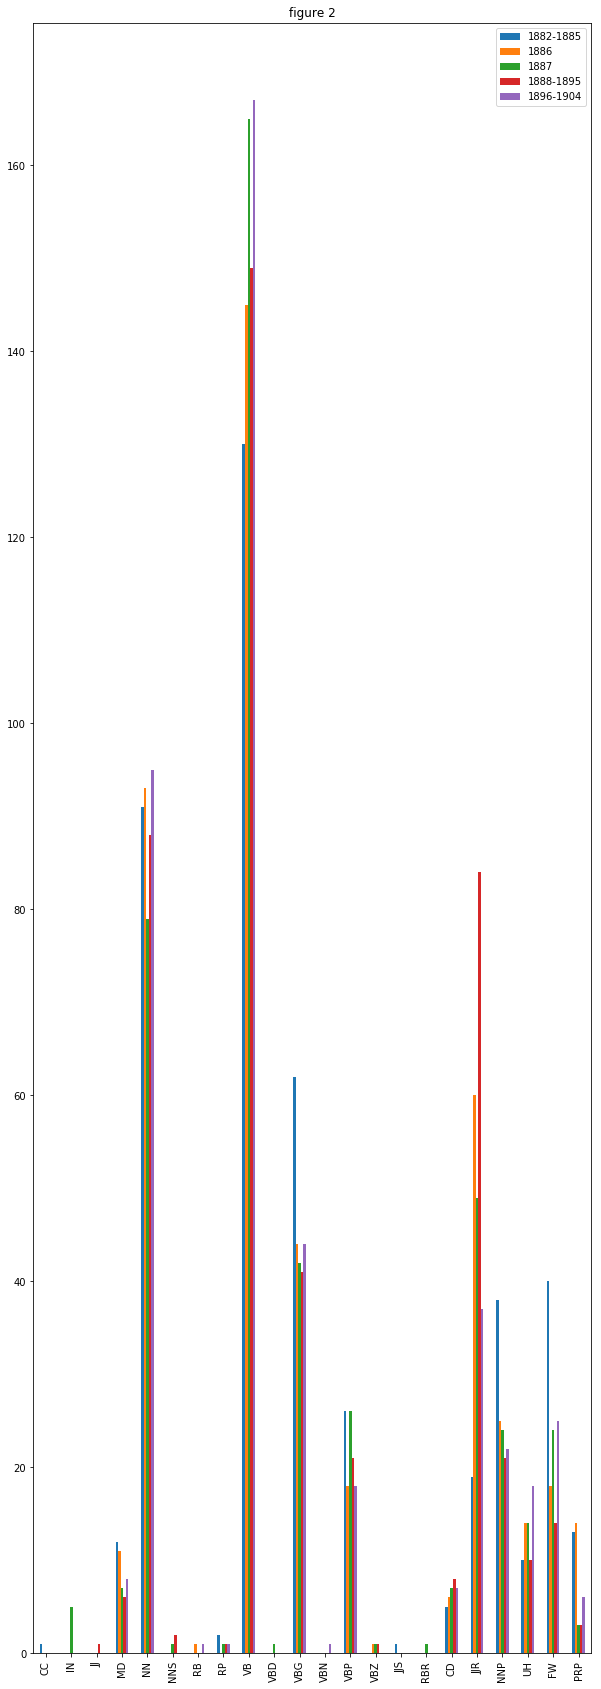

In [46]:
df.plot.bar()
plt.title('figure 2')

First of all, we can see from the graph that all the time periods have some similarity, which makes sense for they are from the same author. With the length increasing, the ratio remains the same, which means the author uses the same structure to describe things and adds more details into the stories.


# Wordnet analysis

After figuring that the writing style are changing with time passing, and there are some obvious evdence among the topics, I want to futher discuss if the changes of topics show some relation with the words' synsets. From the different definition of the synsets, we can see if the core of his writing is changing.

I first tokenize the articles with the organization of different time periods. Then use a function **_hypernym_** to find their roots of synsets with hdight of two, which can help us find meaningful synsets. The function **_hypernym_** use a token as input and then return the hypernym with its max_depth equals to 2. After doing that, I use a dictionary to store the result.

Then, I use the function **_findYear_** to find the dataframe of different pos. As I have mentioned above, I am most interested in the pos of NN, JJ,VBD, RBR and CD, so I just need the result of the three. **_findYear_** function get the pos, length of year(the total length of articles of different writing period to get the frequency of synsets) and the dictionary of the hypernums as inputs and return a dataframe of the pos as output.

In [47]:
yearToken = {}
for year in yearList:
    yearToken[year] = []
    for i in range(len(nameList)):
        if nameList[i].split('__')[0] ==year:
            yearToken[year].extend(word_tokenize(allText[i]))

In [48]:
def hypernym (name, case = 0):
    timse = 0
    if type(name) == str:
        synsets = wn.synsets(name)
        #print(synsets)
        if len(synsets)<1:
            #print("word name is:", name)
            #print("synsets", synsets)
            #print("cannot find the synsets")
            return "cannot_find_the_synsets"
        synset = synsets[0]
        times = synset.max_depth()
        hypers = synset.hypernyms()
        if len(hypers) <1:
            flag = 0
            #print("cannot find hypers simply:")#try other elements of synsets to find hypernyms
            for names in synsets:
                if len(names.hypernyms())>0:
                    hypers = names.hypernyms()
                    flag = 1
                    break
            if flag ==0:
                if case == 1:
                    return synsets[0]
                #print(name)
                case = 1
                name = name.capitalize()
                return hypernym(name,1)
        hyper = hypers[0]
        #print("the hypernym is: "+hyper.name())
    elif type(name) == nltk.corpus.reader.wordnet.Synset:
        #print(name)
        times = name.max_depth()
        hypers = name.hypernyms()
        if len(hypers)<1:
            print("cannot find hyper nym and the name is:", name,"\t", hypers)
        else:
            hyper = hypers[0]
    else:
        return ("wrong input:", name)
    
    #print(times)
    if times>2:
        return hypernym(hyper)
    else:
        return name

def hyper_depth(name):
        synsets = wn.synsets(name)
        #print(synsets)
        if len(synsets)<1:
            #print("word name is:", name)
            #print("synsets", synsets)
            #print("cannot find the synsets")
            return "cannot_find_the_synsets"
        synset = synsets[0]
        times = synset.max_depth()
        return times

In [49]:
a = wn.synsets('a')[0]

In [50]:
namePos = {}
for name in yearToken:
    namePos[name] = pos_tag(yearToken[name])

In [51]:
PosNames = []
for name in namePos:
    for pos in namePos[name]:
        if pos[1] not in PosNames:
            PosNames.append(pos[1])

In [52]:
PosDictionary = {}
for name in namePos:
    PosDictionary[name] = {}
    for pos in namePos[name]:
        #print(pos)
        if pos[1] not in PosDictionary[name]:
            #print(pos[1])
            PosDictionary[name][pos[1]] = [pos[0]]
            #print("new pos, {} is {}".format(str(pos[1]),str(pos[0])))
        else:
            #print(pos[1])
            PosDictionary[name][pos[1]].append(pos[0])
            #print("add pos")
        

In [53]:
Final = {}
for name in PosDictionary:
    Final[name] = {}
    for sets in PosDictionary[name]:
        Final[name][sets] = {}
        Set = []
        print(sets)
        for word in PosDictionary[name][sets]:
            print(word)
            print(hypernym(word))
            if hypernym(word) not in Final[name][sets]:
                Final[name][sets][hypernym(word)] = [word]
            else:
                Final[name][sets][hypernym(word)].append(word)
    print("/n/n")

DT
A
Synset('measure.n.02')
the
cannot_find_the_synsets
a
Synset('measure.n.02')
a
Synset('measure.n.02')
A
Synset('measure.n.02')
a
Synset('measure.n.02')
all
Synset('all.a.01')
a
Synset('measure.n.02')
the
cannot_find_the_synsets
The
cannot_find_the_synsets
the
cannot_find_the_synsets
a
Synset('measure.n.02')
the
cannot_find_the_synsets
a
Synset('measure.n.02')
the
cannot_find_the_synsets
the
cannot_find_the_synsets
a
Synset('measure.n.02')
A
Synset('measure.n.02')
a
Synset('measure.n.02')
the
cannot_find_the_synsets
a
Synset('measure.n.02')
a
Synset('measure.n.02')
the
cannot_find_the_synsets
a
Synset('measure.n.02')
the
cannot_find_the_synsets
the
cannot_find_the_synsets
a
Synset('measure.n.02')
the
cannot_find_the_synsets
a
Synset('measure.n.02')
the
cannot_find_the_synsets
the
cannot_find_the_synsets
the
cannot_find_the_synsets
the
cannot_find_the_synsets
the
cannot_find_the_synsets
the
cannot_find_the_synsets
the
cannot_find_the_synsets
a
Synset('measure.n.02')
the
cannot_find_t

the
cannot_find_the_synsets
The
cannot_find_the_synsets
the
cannot_find_the_synsets
that
cannot_find_the_synsets
all
Synset('all.a.01')
the
cannot_find_the_synsets
the
cannot_find_the_synsets
No
Synset('psychological_feature.n.01')
no
Synset('psychological_feature.n.01')
The
cannot_find_the_synsets
a
Synset('measure.n.02')
a
Synset('measure.n.02')
the
cannot_find_the_synsets
the
cannot_find_the_synsets
the
cannot_find_the_synsets
all
Synset('all.a.01')
The
cannot_find_the_synsets
the
cannot_find_the_synsets
A
Synset('measure.n.02')
the
cannot_find_the_synsets
The
cannot_find_the_synsets
a
Synset('measure.n.02')
the
cannot_find_the_synsets
THE
cannot_find_the_synsets
the
cannot_find_the_synsets
a
Synset('measure.n.02')
that
cannot_find_the_synsets
the
cannot_find_the_synsets
the
cannot_find_the_synsets
all
Synset('all.a.01')
the
cannot_find_the_synsets
an
Synset('communication.n.02')
the
cannot_find_the_synsets
the
cannot_find_the_synsets
the
cannot_find_the_synsets
the
cannot_find_the_

Synset('object.n.01')
like
Synset('psychological_feature.n.01')
towards
cannot_find_the_synsets
in
Synset('measure.n.02')
by
Synset('by.r.01')
of
cannot_find_the_synsets
in
Synset('measure.n.02')
On
Synset('on.a.01')
of
cannot_find_the_synsets
of
cannot_find_the_synsets
In
Synset('measure.n.02')
with
cannot_find_the_synsets
on
Synset('on.a.01')
on
Synset('on.a.01')
with
cannot_find_the_synsets
in
Synset('measure.n.02')
of
cannot_find_the_synsets
of
cannot_find_the_synsets
in
Synset('measure.n.02')
about
Synset('about.s.01')
through
Synset('done.s.01')
for
cannot_find_the_synsets
with
cannot_find_the_synsets
into
cannot_find_the_synsets
for
cannot_find_the_synsets
for
cannot_find_the_synsets
for
cannot_find_the_synsets
that
cannot_find_the_synsets
with
cannot_find_the_synsets
from
cannot_find_the_synsets
If
cannot_find_the_synsets
over
Synset('psychological_feature.n.01')
after
Synset('after.s.01')
if
cannot_find_the_synsets
Without
cannot_find_the_synsets
in
Synset('measure.n.02')
with

through
Synset('done.s.01')
unlike
Synset('unlike.a.01')
of
cannot_find_the_synsets
in
Synset('measure.n.02')
though
Synset('though.r.01')
that
cannot_find_the_synsets
in
Synset('measure.n.02')
if
cannot_find_the_synsets
Before
Synset('earlier.r.01')
Behind
Synset('thing.n.12')
in
Synset('measure.n.02')
that
cannot_find_the_synsets
for
cannot_find_the_synsets
at
Synset('matter.n.03')
for
cannot_find_the_synsets
if
cannot_find_the_synsets
as
Synset('matter.n.03')
though
Synset('though.r.01')
with
cannot_find_the_synsets
in
Synset('measure.n.02')
on
Synset('on.a.01')
whether
cannot_find_the_synsets
for
cannot_find_the_synsets
if
cannot_find_the_synsets
in
Synset('measure.n.02')
in
Synset('measure.n.02')
of
cannot_find_the_synsets
by
Synset('by.r.01')
after
Synset('after.s.01')
for
cannot_find_the_synsets
that
cannot_find_the_synsets
Before
Synset('earlier.r.01')
while
Synset('measure.n.02')
at
Synset('matter.n.03')
in
Synset('measure.n.02')
of
cannot_find_the_synsets
in
Synset('measure.n

Synset('attribute.n.02')
way
Synset('attribute.n.02')
crowd
Synset('group.n.01')
finger
Synset('thing.n.12')
anyone
cannot_find_the_synsets
honour
Synset('attribute.n.02')
fist
Synset('thing.n.12')
firewood
Synset('matter.n.03')
brute
Synset('causal_agent.n.01')
rhyme
Synset('communication.n.02')
reason
Synset('psychological_feature.n.01')
bit
Synset('measure.n.02')
finger
Synset('thing.n.12')
man
Synset('causal_agent.n.01')
work
Synset('psychological_feature.n.01')
finger
Synset('thing.n.12')
week
Synset('measure.n.02')
law
Synset('group.n.01')
honour
Synset('attribute.n.02')
beast
Synset('object.n.01')
everyone
cannot_find_the_synsets
life
Synset('attribute.n.02')
living
Synset('psychological_feature.n.01')
dog
Synset('object.n.01')
pass
Synset('psychological_feature.n.01')
place
Synset('object.n.01')
time
Synset('psychological_feature.n.01')
blackguard
Synset('causal_agent.n.01')
lesson
Synset('psychological_feature.n.01')
Yeldyrin
cannot_find_the_synsets
superintendent
Synset('caus

Synset('group.n.01')
monastery
Synset('object.n.01')
foreman
Synset('causal_agent.n.01')
brickyard
Synset('object.n.01')
nephew
Synset('causal_agent.n.01')
man
Synset('causal_agent.n.01')
cassock
Synset('object.n.01')
hand
Synset('thing.n.12')
come
Synset('matter.n.03')
stranger
Synset('causal_agent.n.01')
life
Synset('attribute.n.02')
er
Synset('matter.n.03')
afraid
Synset('afraid.a.01')
anything
cannot_find_the_synsets
man
Synset('causal_agent.n.01')
corruption
Synset('attribute.n.02')
bishop
Synset('causal_agent.n.01')
life
Synset('attribute.n.02')
soul
Synset('causal_agent.n.01')
joys
Synset('attribute.n.02')
soul
Synset('causal_agent.n.01')
body
Synset('object.n.01')
man
Synset('causal_agent.n.01')
body
Synset('object.n.01')
chattering
Synset('psychological_feature.n.01')
village
Synset('group.n.01')
right
Synset('psychological_feature.n.01')
river-bank
cannot_find_the_synsets
river-bank
cannot_find_the_synsets
man
Synset('causal_agent.n.01')
cassock
Synset('object.n.01')
road
Syn

Synset('communicate.v.02')
is
is
's
cannot_find_the_synsets
is
is
says
Synset('attribute.n.02')
is
is
's
cannot_find_the_synsets
's
cannot_find_the_synsets
means
Synset('psychological_feature.n.01')
cries
Synset('communication.n.02')
is
is
's
cannot_find_the_synsets
is
is
's
cannot_find_the_synsets
says
Synset('attribute.n.02')
's
cannot_find_the_synsets
's
cannot_find_the_synsets
turns
Synset('attribute.n.02')
's
cannot_find_the_synsets
is
is
's
cannot_find_the_synsets
lies
Synset('communication.n.02')
is
is
is
is
is
is
's
cannot_find_the_synsets
is
is
's
cannot_find_the_synsets
says
Synset('attribute.n.02')
has
Synset('attribute.n.02')
has
Synset('attribute.n.02')
is
is
's
cannot_find_the_synsets
is
is
is
is
says
Synset('attribute.n.02')
's
cannot_find_the_synsets
is
is
's
cannot_find_the_synsets
says
Synset('attribute.n.02')
goes
Synset('measure.n.02')
is
is
's
cannot_find_the_synsets
's
cannot_find_the_synsets
comes
Synset('matter.n.03')
Is
Is
's
cannot_find_the_synsets
says
Synset

Synset('causal_agent.n.01')
stray
Synset('object.n.01')
stray
Synset('object.n.01')
stray
Synset('object.n.01')
other
Synset('other.a.01')
whole
Synset('psychological_feature.n.01')
ecstatic
Synset('ecstatic.s.01')
bad
Synset('attribute.n.02')
lively
Synset('lively.a.01')
angry
Synset('angry.a.01')
nice
Synset('nice.n.01')
little
Synset('measure.n.02')
crowd
Synset('group.n.01')
smart
Synset('psychological_feature.n.01')
DEAD
Synset('group.n.01')
next
Synset('following.s.02')
immense
Synset('huge.s.01')
white
Synset('causal_agent.n.01')
damp
Synset('attribute.n.02')
little
Synset('measure.n.02')
dead
Synset('group.n.01')
new
Synset('new.a.01')
white
Synset('causal_agent.n.01')
young
Synset('object.n.01')
oak-tree
cannot_find_the_synsets
wooden
Synset('wooden.s.01')
disagreeable
Synset('disagreeable.a.01')
uninviting
Synset('uninviting.a.01')
tall
Synset('attribute.n.02')
young
Synset('object.n.01')
perceptible
Synset('perceptible.a.01')
thick
Synset('object.n.01')
black
Synset('attribu

cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
!
cannot_find_the_synsets
!
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
?
cannot_find_the_synsets
!
cannot_find_the_synsets
!
cannot_find_the_synsets
.
cannot_find_the_synsets
!
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_

Synset('matter.n.03')
her
cannot_find_the_synsets
It
Synset('psychological_feature.n.01')
He
Synset('matter.n.03')
I
Synset('matter.n.03')
you
cannot_find_the_synsets
you
cannot_find_the_synsets
her
cannot_find_the_synsets
it
Synset('psychological_feature.n.01')
you
cannot_find_the_synsets
you
cannot_find_the_synsets
it
Synset('psychological_feature.n.01')
I
Synset('matter.n.03')
I
Synset('matter.n.03')
You
cannot_find_the_synsets
me
Synset('maine.n.01')
I
Synset('matter.n.03')
I
Synset('matter.n.03')
I
Synset('matter.n.03')
It
Synset('psychological_feature.n.01')
it
Synset('psychological_feature.n.01')
it
Synset('psychological_feature.n.01')
I
Synset('matter.n.03')
I
Synset('matter.n.03')
them
cannot_find_the_synsets
It
Synset('psychological_feature.n.01')
they
cannot_find_the_synsets
he
Synset('matter.n.03')
I
Synset('matter.n.03')
him
cannot_find_the_synsets
it
Synset('psychological_feature.n.01')
I
Synset('matter.n.03')
him
cannot_find_the_synsets
It
Synset('psychological_feature.n

you
cannot_find_the_synsets
it
Synset('psychological_feature.n.01')
me
Synset('maine.n.01')
you
cannot_find_the_synsets
me
Synset('maine.n.01')
It
Synset('psychological_feature.n.01')
it
Synset('psychological_feature.n.01')
you
cannot_find_the_synsets
It
Synset('psychological_feature.n.01')
you
cannot_find_the_synsets
me
Synset('maine.n.01')
It
Synset('psychological_feature.n.01')
I
Synset('matter.n.03')
you
cannot_find_the_synsets
it
Synset('psychological_feature.n.01')
you
cannot_find_the_synsets
you
cannot_find_the_synsets
you
cannot_find_the_synsets
it
Synset('psychological_feature.n.01')
It
Synset('psychological_feature.n.01')
it
Synset('psychological_feature.n.01')
they
cannot_find_the_synsets
us
Synset('matter.n.03')
it
Synset('psychological_feature.n.01')
He
Synset('matter.n.03')
it
Synset('psychological_feature.n.01')
you
cannot_find_the_synsets
I
Synset('matter.n.03')
you
cannot_find_the_synsets
himself
cannot_find_the_synsets
I
Synset('matter.n.03')
you
cannot_find_the_synse

know
Synset('psychological_feature.n.01')
do
Synset('psychological_feature.n.01')
've
cannot_find_the_synsets
'm
cannot_find_the_synsets
help
Synset('psychological_feature.n.01')
am
Synset('matter.n.03')
take
Synset('relation.n.01')
put
Synset('communication.n.02')
blockhead
Synset('causal_agent.n.01')
have
Synset('causal_agent.n.01')
do
Synset('psychological_feature.n.01')
are
Synset('measure.n.02')
are
Synset('measure.n.02')
Do
Synset('psychological_feature.n.01')
am
Synset('matter.n.03')
are
Synset('measure.n.02')
sit
sit
speak
Synset('communicate.v.02')
seem
seem
dare
Synset('psychological_feature.n.01')
are
Synset('measure.n.02')
have
Synset('causal_agent.n.01')
Are
Synset('measure.n.02')
are
Synset('measure.n.02')
am
Synset('matter.n.03')
are
Synset('measure.n.02')
are
Synset('measure.n.02')
have
Synset('causal_agent.n.01')
do
Synset('psychological_feature.n.01')
do
Synset('psychological_feature.n.01')
am
Synset('matter.n.03')
am
Synset('matter.n.03')
are
Synset('measure.n.02')
'

,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_fin

obey
teach
Synset('communicate.v.02')
keep
Synset('relation.n.01')
give
Synset('attribute.n.02')
find
Synset('psychological_feature.n.01')
draw
Synset('object.n.01')
be
Synset('matter.n.03')
be
Synset('matter.n.03')
Help
Synset('psychological_feature.n.01')
be
Synset('matter.n.03')
make
Synset('psychological_feature.n.01')
bite
Synset('attribute.n.02')
reach
Synset('object.n.01')
have
Synset('causal_agent.n.01')
get
Synset('psychological_feature.n.01')
snap
Synset('psychological_feature.n.01')
see
Synset('object.n.01')
see
Synset('object.n.01')
let
Synset('psychological_feature.n.01')
let
Synset('psychological_feature.n.01')
tell
cannot find hyper nym and the name is: Synset('express.v.02') 	 []
Synset('express.v.02')
cannot find hyper nym and the name is: Synset('express.v.02') 	 []
cannot find hyper nym and the name is: Synset('express.v.02') 	 []
argue
Synset('present.v.02')
keep
Synset('relation.n.01')
turn
Synset('attribute.n.02')
know
Synset('psychological_feature.n.01')
happen
h

Synset('attribute.n.02')
more
Synset('more.n.01')
lower
Synset('object.n.01')
more
Synset('more.n.01')
more
Synset('more.n.01')
more
Synset('more.n.01')
WDT
which
cannot_find_the_synsets
which
cannot_find_the_synsets
that
cannot_find_the_synsets
that
cannot_find_the_synsets
that
cannot_find_the_synsets
which
cannot_find_the_synsets
TO
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_

cannot_find_the_synsets
the
cannot_find_the_synsets
the
cannot_find_the_synsets
the
cannot_find_the_synsets
the
cannot_find_the_synsets
The
cannot_find_the_synsets
the
cannot_find_the_synsets
the
cannot_find_the_synsets
the
cannot_find_the_synsets
The
cannot_find_the_synsets
the
cannot_find_the_synsets
The
cannot_find_the_synsets
the
cannot_find_the_synsets
the
cannot_find_the_synsets
a
Synset('measure.n.02')
the
cannot_find_the_synsets
The
cannot_find_the_synsets
a
Synset('measure.n.02')
a
Synset('measure.n.02')
the
cannot_find_the_synsets
a
Synset('measure.n.02')
the
cannot_find_the_synsets
The
cannot_find_the_synsets
a
Synset('measure.n.02')
a
Synset('measure.n.02')
the
cannot_find_the_synsets
the
cannot_find_the_synsets
A
Synset('measure.n.02')
the
cannot_find_the_synsets
An
Synset('communication.n.02')
the
cannot_find_the_synsets
the
cannot_find_the_synsets
the
cannot_find_the_synsets
The
cannot_find_the_synsets
the
cannot_find_the_synsets
the
cannot_find_the_synsets
a
Synset('mea

An
Synset('communication.n.02')
a
Synset('measure.n.02')
the
cannot_find_the_synsets
a
Synset('measure.n.02')
the
cannot_find_the_synsets
a
Synset('measure.n.02')
the
cannot_find_the_synsets
the
cannot_find_the_synsets
the
cannot_find_the_synsets
the
cannot_find_the_synsets
The
cannot_find_the_synsets
a
Synset('measure.n.02')
some
Synset('some.a.01')
the
cannot_find_the_synsets
the
cannot_find_the_synsets
the
cannot_find_the_synsets
The
cannot_find_the_synsets
the
cannot_find_the_synsets
the
cannot_find_the_synsets
the
cannot_find_the_synsets
the
cannot_find_the_synsets
a
Synset('measure.n.02')
the
cannot_find_the_synsets
any
Synset('any.s.01')
this
cannot_find_the_synsets
The
cannot_find_the_synsets
the
cannot_find_the_synsets
the
cannot_find_the_synsets
the
cannot_find_the_synsets
the
cannot_find_the_synsets
the
cannot_find_the_synsets
the
cannot_find_the_synsets
the
cannot_find_the_synsets
the
cannot_find_the_synsets
a
Synset('measure.n.02')
the
cannot_find_the_synsets
a
Synset('mea

Synset('chekhov.n.01')
IT
Synset('psychological_feature.n.01')
Nadenka
cannot_find_the_synsets
Nadyezhda
cannot_find_the_synsets
Petrovna
cannot_find_the_synsets
Nadenka
cannot_find_the_synsets
Nadenka
cannot_find_the_synsets
Nadenka
cannot_find_the_synsets
Nothing
Synset('measure.n.02')
Nadenka
cannot_find_the_synsets
Nadenka
cannot_find_the_synsets
Nadenka
cannot_find_the_synsets
Did
Did
Well
Synset('object.n.01')
Shall
cannot_find_the_synsets
Nadenka
cannot_find_the_synsets
N.
cannot_find_the_synsets
Nadenka
cannot_find_the_synsets
Soon
Synset('soon.r.01')
Nadenka
cannot_find_the_synsets
Which
cannot_find_the_synsets
Nadenka
cannot_find_the_synsets
Whether
cannot_find_the_synsets
Nadenka
cannot_find_the_synsets
March
Synset('measure.n.02')
Nadenka
cannot_find_the_synsets
Petersburg
Synset('petersburg.n.01')
Nadenka
cannot_find_the_synsets
Nadenka
cannot_find_the_synsets
Nadenka
cannot_find_the_synsets
Nobility
Synset('group.n.01')
Wardenship
Synset('psychological_feature.n.01')
Nade

Synset('thing.n.12')
at
Synset('matter.n.03')
at
Synset('matter.n.03')
in
Synset('measure.n.02')
In
Synset('measure.n.02')
before
Synset('earlier.r.01')
of
cannot_find_the_synsets
of
cannot_find_the_synsets
of
cannot_find_the_synsets
about
Synset('about.s.01')
about
Synset('about.s.01')
about
Synset('about.s.01')
into
cannot_find_the_synsets
of
cannot_find_the_synsets
about
Synset('about.s.01')
about
Synset('about.s.01')
in
Synset('measure.n.02')
of
cannot_find_the_synsets
of
cannot_find_the_synsets
after
Synset('after.s.01')
with
cannot_find_the_synsets
in
Synset('measure.n.02')
of
cannot_find_the_synsets
whether
cannot_find_the_synsets
on
Synset('on.a.01')
out
Synset('psychological_feature.n.01')
of
cannot_find_the_synsets
of
cannot_find_the_synsets
on
Synset('on.a.01')
While
Synset('measure.n.02')
at
Synset('matter.n.03')
of
cannot_find_the_synsets
before
Synset('earlier.r.01')
about
Synset('about.s.01')
than
cannot_find_the_synsets
with
cannot_find_the_synsets
from
cannot_find_the_

in
Synset('measure.n.02')
into
cannot_find_the_synsets
with
cannot_find_the_synsets
with
cannot_find_the_synsets
in
Synset('measure.n.02')
of
cannot_find_the_synsets
in
Synset('measure.n.02')
of
cannot_find_the_synsets
in
Synset('measure.n.02')
with
cannot_find_the_synsets
of
cannot_find_the_synsets
on
Synset('on.a.01')
of
cannot_find_the_synsets
by
Synset('by.r.01')
at
Synset('matter.n.03')
that
cannot_find_the_synsets
from
cannot_find_the_synsets
in
Synset('measure.n.02')
in
Synset('measure.n.02')
in
Synset('measure.n.02')
in
Synset('measure.n.02')
with
cannot_find_the_synsets
in
Synset('measure.n.02')
with
cannot_find_the_synsets
in
Synset('measure.n.02')
while
Synset('measure.n.02')
in
Synset('measure.n.02')
of
cannot_find_the_synsets
with
cannot_find_the_synsets
of
cannot_find_the_synsets
at
Synset('matter.n.03')
on
Synset('on.a.01')
of
cannot_find_the_synsets
on
Synset('on.a.01')
on
Synset('on.a.01')
on
Synset('on.a.01')
Yes
Synset('communication.n.02')
before
Synset('earlier.r.0

and
cannot_find_the_synsets
and
cannot_find_the_synsets
and
cannot_find_the_synsets
and
cannot_find_the_synsets
and
cannot_find_the_synsets
and
cannot_find_the_synsets
but
Synset('merely.r.01')
and
cannot_find_the_synsets
or
Synset('object.n.01')
or
Synset('object.n.01')
and
cannot_find_the_synsets
and
cannot_find_the_synsets
and
cannot_find_the_synsets
and
cannot_find_the_synsets
and
cannot_find_the_synsets
and
cannot_find_the_synsets
and
cannot_find_the_synsets
and
cannot_find_the_synsets
and
cannot_find_the_synsets
but
Synset('merely.r.01')
and
cannot_find_the_synsets
and
cannot_find_the_synsets
and
cannot_find_the_synsets
And
cannot_find_the_synsets
and
cannot_find_the_synsets
and
cannot_find_the_synsets
and
cannot_find_the_synsets
and
cannot_find_the_synsets
and
cannot_find_the_synsets
But
Synset('merely.r.01')
and
cannot_find_the_synsets
but
Synset('merely.r.01')
and
cannot_find_the_synsets
and
cannot_find_the_synsets
and
cannot_find_the_synsets
and
cannot_find_the_synsets
and
ca

Synset('object.n.01')
hole
Synset('attribute.n.02')
day
Synset('measure.n.02')
trouble
Synset('psychological_feature.n.01')
Terenty
cannot_find_the_synsets
head
Synset('thing.n.12')
spat
Synset('psychological_feature.n.01')
wolf
Synset('object.n.01')
gobble
Synset('psychological_feature.n.01')
orphan
Synset('causal_agent.n.01')
legs
Synset('attribute.n.02')
village
Synset('group.n.01')
street
Synset('object.n.01')
side
Synset('object.n.01')
pursuit
Synset('psychological_feature.n.01')
village
Synset('group.n.01')
road
Synset('object.n.01')
count
Synset('measure.n.02')
copse
Synset('group.n.01')
blue
Synset('attribute.n.02')
distance
Synset('relation.n.01')
mile
Synset('measure.n.02')
sun
Synset('process.n.06')
speck
Synset('object.n.01')
sky
Synset('matter.n.03')
dark
Synset('attribute.n.02')
holy
Synset('object.n.01')
holy
Synset('object.n.01')
road
Synset('object.n.01')
drop
Synset('attribute.n.02')
cheek
Synset('thing.n.12')
chin
Synset('thing.n.12')
rain
Synset('process.n.06')
cobb

Synset('attribute.n.02')
down
Synset('matter.n.03')
lip
Synset('thing.n.12')
frost
Synset('matter.n.03')
arm
Synset('thing.n.12')
hill
Synset('object.n.01')
ground
Synset('object.n.01')
descent
Synset('psychological_feature.n.01')
sun
Synset('process.n.06')
looking-glass
cannot_find_the_synsets
sledge
Synset('object.n.01')
cloth
Synset('object.n.01')
slope
Synset('object.n.01')
bottom
Synset('object.n.01')
ice
Synset('matter.n.03')
hill
Synset('object.n.01')
abyss
Synset('attribute.n.02')
spirit
Synset('causal_agent.n.01')
breath
Synset('process.n.06')
sledge
Synset('object.n.01')
abyss
Synset('attribute.n.02')
mind
Synset('psychological_feature.n.01')
way
Synset('attribute.n.02')
face
Synset('thing.n.12')
way
Synset('attribute.n.02')
dread
Synset('attribute.n.02')
sledge
Synset('object.n.01')
pale
Synset('object.n.01')
trembling
Synset('attribute.n.02')
arm
Synset('thing.n.12')
round
Synset('object.n.01')
cast
Synset('group.n.01')
precipice
Synset('object.n.01')
sledge
Synset('object.

Synset('communication.n.02')
approval
Synset('psychological_feature.n.01')
face
Synset('thing.n.12')
nothing
Synset('measure.n.02')
shyness
Synset('attribute.n.02')
uneasiness
Synset('attribute.n.02')
time
Synset('psychological_feature.n.01')
afraid
Synset('afraid.a.01')
failure
Synset('psychological_feature.n.01')
fellow
Synset('causal_agent.n.01')
footman
Synset('causal_agent.n.01')
study
Synset('psychological_feature.n.01')
tea
Synset('matter.n.03')
tray
Synset('object.n.01')
glass
Synset('matter.n.03')
bishop
Synset('causal_agent.n.01')
aloud
Synset('aloud.r.01')
question
Synset('psychological_feature.n.01')
church
Synset('group.n.01')
sum
Synset('relation.n.01')
money
Synset('measure.n.02')
purpose
Synset('psychological_feature.n.01')
nothing
Synset('measure.n.02')
tea
Synset('matter.n.03')
question
Synset('psychological_feature.n.01')
moment
Synset('measure.n.02')
question
Synset('psychological_feature.n.01')
head
Synset('thing.n.12')
expression
Synset('attribute.n.02')
pleasure


teacher
Synset('causal_agent.n.01')
priest
Synset('causal_agent.n.01')
bent
Synset('psychological_feature.n.01')
something
cannot_find_the_synsets
visitor
Synset('causal_agent.n.01')
woman
Synset('causal_agent.n.01')
voice
Synset('attribute.n.02')
partition
Synset('object.n.01')
whispering
Synset('psychological_feature.n.01')
pang
Synset('attribute.n.02')
tea
Synset('matter.n.03')
use
Synset('psychological_feature.n.01')
tea
Synset('matter.n.03')
watch
Synset('object.n.01')
visitor
Synset('causal_agent.n.01')
host
Synset('causal_agent.n.01')
word
Synset('relation.n.01')
hat
Synset('object.n.01')
good-bye
Synset('communication.n.02')
morning
Synset('measure.n.02')
way
Synset('attribute.n.02')
home
Synset('object.n.01')
blockhead
Synset('causal_agent.n.01')
dummy
Synset('causal_agent.n.01')
school
Synset('group.n.01')
year
Synset('measure.n.02')
snow
Synset('process.n.06')
anything
cannot_find_the_synsets
priest
Synset('causal_agent.n.01')
hurry
Synset('attribute.n.02')
school
Synset('gr

Synset('matter.n.03')
past
Synset('attribute.n.02')
father
Synset('causal_agent.n.01')
fortune
Synset('process.n.06')
puppy
Synset('object.n.01')
twenty
Synset('measure.n.02')
day
Synset('measure.n.02')
cab-driver
cannot_find_the_synsets
vanity
Synset('attribute.n.02')
month
Synset('measure.n.02')
priest
Synset('causal_agent.n.01')
wife
Synset('causal_agent.n.01')
chemise
Synset('object.n.01')
doctor
Synset('causal_agent.n.01')
wife
Synset('causal_agent.n.01')
washerwoman
Synset('causal_agent.n.01')
information
Synset('communication.n.02')
bishop
Synset('causal_agent.n.01')
draught
Synset('measure.n.02')
air
Synset('matter.n.03')
remembrance
Synset('psychological_feature.n.01')
shame
Synset('attribute.n.02')
inner
Synset('inner.s.01')
self
Synset('attribute.n.02')
truth
Synset('psychological_feature.n.01')
effort
Synset('psychological_feature.n.01')
service
Synset('psychological_feature.n.01')
part
Synset('relation.n.01')
person
Synset('causal_agent.n.01')
.
.
cannot_find_the_synsets
.

.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
?
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
?
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
!
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_fin

.
cannot_find_the_synsets
!
cannot_find_the_synsets
!
cannot_find_the_synsets
!
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
!
cannot_find_the_synsets
!
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
!
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
JJ
dark
Synset('attribute.n.02')
leaden-coloured
cannot_find_the

Synset('group.n.01')
awful
Synset('atrocious.s.02')
glorious
Synset('glorious.a.01')
white
Synset('causal_agent.n.01')
such
Synset('such.s.01')
young
Synset('object.n.01')
green
Synset('attribute.n.02')
several
Synset('several.s.01')
wooden
Synset('wooden.s.01')
old
Synset('attribute.n.02')
white
Synset('causal_agent.n.01')
ungainly
Synset('gawky.s.01')
old
Synset('attribute.n.02')
hollow
Synset('attribute.n.02')
indistinct
Synset('indistinct.a.01')
softened
softened
poverty-stricken
Synset('destitute.s.01')
short
Synset('object.n.01')
crumpled
crumpled
long
long
yellow
Synset('attribute.n.02')
full
Synset('attribute.n.02')
first
Synset('attribute.n.02')
strange
Synset('strange.a.01')
old
Synset('attribute.n.02')
little
Synset('measure.n.02')
aged-looking
cannot_find_the_synsets
young
Synset('object.n.01')
old
Synset('attribute.n.02')
little
Synset('measure.n.02')
optical
Synset('optical.a.01')
cold
Synset('attribute.n.02')
grey
Synset('group.n.01')
outside
Synset('object.n.01')
dark
S

staggering
standing
Synset('attribute.n.02')
looking
Synset('psychological_feature.n.01')
darling
Synset('causal_agent.n.01')
lisping
lisping
tugging
Synset('attract.v.01')
lifting
lifting
striding
striding
stopping
Synset('object.n.01')
looking
Synset('psychological_feature.n.01')
hurrying
Synset('psychological_feature.n.01')
kicking
Synset('psychological_feature.n.01')
dropping
dropping
rolling
Synset('psychological_feature.n.01')
tearing
Synset('process.n.06')
crossing
Synset('psychological_feature.n.01')
going
Synset('psychological_feature.n.01')
leaning
Synset('attribute.n.02')
looking
Synset('psychological_feature.n.01')
gazing
gazing
thinking
Synset('psychological_feature.n.01')
seeing
Synset('psychological_feature.n.01')
thundering
thundering
rubbing
Synset('process.n.06')
rubbing
Synset('process.n.06')
nesting
nesting
wringing
Synset('twist.v.04')
scurrying
Synset('run.v.01')
trying
trying
grinning
Synset('communication.n.02')
pointing
Synset('communicate.v.02')
flying
Synset(

Synset('lone.s.03')
not
Synset('not.r.01')
not
Synset('not.r.01')
then
Synset('measure.n.02')
kindly
Synset('charitable.s.03')
finally
Synset('finally.r.01')
nowhere
Synset('attribute.n.02')
now
Synset('attribute.n.02')
indeed
Synset('indeed.r.01')
long
long
perhaps
Synset('possibly.r.01')
ever
Synset('ever.r.01')
still
Synset('object.n.01')
pretty
Synset('pretty.s.01')
still
Synset('object.n.01')
already
Synset('already.r.01')
loudly
Synset('loudly.r.01')
up
up
straight
Synset('causal_agent.n.01')
very
Synset('very.s.01')
very
Synset('very.s.01')
once
Synset('once.r.01')
long
long
ago
Synset('ago.s.01')
Now
Synset('attribute.n.02')
not
Synset('not.r.01')
not
Synset('not.r.01')
now
Synset('attribute.n.02')
once
Synset('once.r.01')
together
Synset('together.s.01')
not
Synset('not.r.01')
now
Synset('attribute.n.02')
now
Synset('attribute.n.02')
not
Synset('not.r.01')
immediately
Synset('immediately.r.01')
there
Synset('object.n.01')
later
Synset('later.s.01')
Very
Synset('very.s.01')
her

Synset('psychological_feature.n.01')
They
cannot_find_the_synsets
They
cannot_find_the_synsets
it
Synset('psychological_feature.n.01')
You
cannot_find_the_synsets
you
cannot_find_the_synsets
it
Synset('psychological_feature.n.01')
you
cannot_find_the_synsets
you
cannot_find_the_synsets
It
Synset('psychological_feature.n.01')
you
cannot_find_the_synsets
you
cannot_find_the_synsets
You
cannot_find_the_synsets
They
cannot_find_the_synsets
them
cannot_find_the_synsets
them
cannot_find_the_synsets
them
cannot_find_the_synsets
They
cannot_find_the_synsets
them
cannot_find_the_synsets
they
cannot_find_the_synsets
you
cannot_find_the_synsets
them
cannot_find_the_synsets
them
cannot_find_the_synsets
you
cannot_find_the_synsets
you
cannot_find_the_synsets
them
cannot_find_the_synsets
it
Synset('psychological_feature.n.01')
they
cannot_find_the_synsets
it
Synset('psychological_feature.n.01')
you
cannot_find_the_synsets
you
cannot_find_the_synsets
them
cannot_find_the_synsets
it
Synset('psychologi

cannot_find_the_synsets
I
Synset('matter.n.03')
I
Synset('matter.n.03')
I
Synset('matter.n.03')
us
Synset('matter.n.03')
He
Synset('matter.n.03')
it
Synset('psychological_feature.n.01')
it
Synset('psychological_feature.n.01')
He
Synset('matter.n.03')
He
Synset('matter.n.03')
we
cannot_find_the_synsets
you
cannot_find_the_synsets
it
Synset('psychological_feature.n.01')
we
cannot_find_the_synsets
They
cannot_find_the_synsets
I
Synset('matter.n.03')
I
Synset('matter.n.03')
you
cannot_find_the_synsets
it
Synset('psychological_feature.n.01')
he
Synset('matter.n.03')
He
Synset('matter.n.03')
he
Synset('matter.n.03')
He
Synset('matter.n.03')
he
Synset('matter.n.03')
it
Synset('psychological_feature.n.01')
he
Synset('matter.n.03')
it
Synset('psychological_feature.n.01')
it
Synset('psychological_feature.n.01')
it
Synset('psychological_feature.n.01')
it
Synset('psychological_feature.n.01')
it
Synset('psychological_feature.n.01')
it
Synset('psychological_feature.n.01')
him
cannot_find_the_synsets

Synset('psychological_feature.n.01')
eyes
Synset('psychological_feature.n.01')
addresses
Synset('communication.n.02')
people
Synset('group.n.01')
children
Synset('causal_agent.n.01')
afraid
Synset('afraid.a.01')
clouds
Synset('process.n.06')
afterwards
Synset('subsequently.r.01')
whispers
Synset('communication.n.02')
rain-drops
cannot_find_the_synsets
dots
Synset('attribute.n.02')
glides
Synset('relation.n.01')
feet
Synset('thing.n.12')
trees
Synset('object.n.01')
mutters
Synset('psychological_feature.n.01')
feet
Synset('thing.n.12')
gleams
Synset('attribute.n.02')
heads
Synset('thing.n.12')
feet
Synset('thing.n.12')
lumps
Synset('group.n.01')
trees
Synset('object.n.01')
stumps
Synset('object.n.01')
points
Synset('psychological_feature.n.01')
sideways
Synset('crabwise.s.01')
footsteps
Synset('psychological_feature.n.01')
ducks
Synset('object.n.01')
marshes
Synset('object.n.01')
ways
Synset('object.n.01')
nails
Synset('thing.n.12')
rogues
Synset('causal_agent.n.01')
insects
Synset('obje

prostitutes
Synset('causal_agent.n.01')
roubles
Synset('measure.n.02')
presents
Synset('attribute.n.02')
actresses
Synset('causal_agent.n.01')
notes
Synset('communication.n.02')
roubles
Synset('measure.n.02')
,
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_

,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_fin

bend
Synset('attribute.n.02')
shake
Synset('object.n.01')
rubs
Synset('psychological_feature.n.01')
know
Synset('psychological_feature.n.01')
know
Synset('psychological_feature.n.01')
move
Synset('psychological_feature.n.01')
drag
Synset('process.n.06')
explain
Synset('communicate.v.02')
talk
Synset('communication.n.02')
tell
cannot find hyper nym and the name is: Synset('express.v.02') 	 []
Synset('express.v.02')
cannot find hyper nym and the name is: Synset('express.v.02') 	 []
cannot find hyper nym and the name is: Synset('express.v.02') 	 []
be
Synset('matter.n.03')
know
Synset('psychological_feature.n.01')
want
Synset('attribute.n.02')
hear
hear
wander
wander
notice
Synset('communication.n.02')
be
Synset('matter.n.03')
stop
Synset('psychological_feature.n.01')
go
Synset('measure.n.02')
walk
Synset('psychological_feature.n.01')
listen
listen
eat
eat
think
Synset('psychological_feature.n.01')
be
Synset('matter.n.03')
sleep
Synset('attribute.n.02')
side
Synset('object.n.01')
tell
can

cannot_find_the_synsets
his
cannot_find_the_synsets
his
cannot_find_the_synsets
his
cannot_find_the_synsets
his
cannot_find_the_synsets
his
cannot_find_the_synsets
his
cannot_find_the_synsets
hut
Synset('object.n.01')
his
cannot_find_the_synsets
its
Synset('psychological_feature.n.01')
its
Synset('psychological_feature.n.01')
its
Synset('psychological_feature.n.01')
its
Synset('psychological_feature.n.01')
his
cannot_find_the_synsets
his
cannot_find_the_synsets
his
cannot_find_the_synsets
his
cannot_find_the_synsets
his
cannot_find_the_synsets
its
Synset('psychological_feature.n.01')
our
cannot_find_the_synsets
his
cannot_find_the_synsets
My
cannot_find_the_synsets
his
cannot_find_the_synsets
his
cannot_find_the_synsets
My
cannot_find_the_synsets
his
cannot_find_the_synsets
his
cannot_find_the_synsets
their
cannot_find_the_synsets
his
cannot_find_the_synsets
their
cannot_find_the_synsets
their
cannot_find_the_synsets
his
cannot_find_the_synsets
my
cannot_find_the_synsets
his
cannot_fin

``
cannot_find_the_synsets
``
cannot_find_the_synsets
``
cannot_find_the_synsets
``
cannot_find_the_synsets
``
cannot_find_the_synsets
``
cannot_find_the_synsets
WRB
where
cannot_find_the_synsets
where
cannot_find_the_synsets
when
cannot_find_the_synsets
where
cannot_find_the_synsets
Why
Synset('psychological_feature.n.01')
where
cannot_find_the_synsets
how
cannot_find_the_synsets
When
cannot_find_the_synsets
when
cannot_find_the_synsets
where
cannot_find_the_synsets
when
cannot_find_the_synsets
how
cannot_find_the_synsets
when
cannot_find_the_synsets
when
cannot_find_the_synsets
when
cannot_find_the_synsets
where
cannot_find_the_synsets
when
cannot_find_the_synsets
where
cannot_find_the_synsets
where
cannot_find_the_synsets
when
cannot_find_the_synsets
when
cannot_find_the_synsets
When
cannot_find_the_synsets
when
cannot_find_the_synsets
how
cannot_find_the_synsets
how
cannot_find_the_synsets
when
cannot_find_the_synsets
where
cannot_find_the_synsets
when
cannot_find_the_synsets
why
S

Synset('speculate.v.02')
detected
detected
raised
raised
been
been
set
Synset('group.n.01')
faded
Synset('decrease.v.01')
induced
induced
inspired
Synset('stimulate.v.03')
glittered
glittered
floated
floated
been
been
painted
painted
peeled
peeled
touched
touched
softened
softened
begun
begun
been
been
smiled
Synset('communicate.v.02')
struck
struck
stood
stood
mistaken
Synset('identify.v.06')
begrimed
begrimed
defaced
Synset('mar.v.01')
grey
Synset('group.n.01')
twilight
Synset('psychological_feature.n.01')
impressed
impressed
touched
touched
vanished
vanished
come
Synset('matter.n.03')
formed
formed
led
Synset('object.n.01')
finished
finished
pulled
pulled
emphasized
Synset('communicate.v.02')
disappointed
disappointed
covered
covered
supposed
Synset('speculate.v.02')
gone
gone
given
Synset('psychological_feature.n.01')
smashed
smashed
been
been
given
Synset('psychological_feature.n.01')
been
been
painted
painted
been
been
parched
parched
heated
heated
brought
brought
written
written

had
rushed
rushed
did
did
moaned
moaned
turned
turned
pressed
pressed
racked
racked
hundred
Synset('measure.n.02')
reckoned
Synset('expect.v.01')
was
Synset('communicate.v.02')
hundred
Synset('measure.n.02')
brought
brought
was
Synset('communicate.v.02')
had
had
had
had
had
had
thought
Synset('psychological_feature.n.01')
recalled
recalled
had
had
writhed
writhed
filled
filled
had
had
had
had
POS
's
cannot_find_the_synsets
's
cannot_find_the_synsets
's
cannot_find_the_synsets
's
cannot_find_the_synsets
's
cannot_find_the_synsets
's
cannot_find_the_synsets
's
cannot_find_the_synsets
's
cannot_find_the_synsets
's
cannot_find_the_synsets
's
cannot_find_the_synsets
's
cannot_find_the_synsets
's
cannot_find_the_synsets
's
cannot_find_the_synsets
's
cannot_find_the_synsets
's
cannot_find_the_synsets
's
cannot_find_the_synsets
's
cannot_find_the_synsets
's
cannot_find_the_synsets
's
cannot_find_the_synsets
's
cannot_find_the_synsets
's
cannot_find_the_synsets
's
cannot_find_the_synsets
's
can

which
cannot_find_the_synsets
which
cannot_find_the_synsets
that
cannot_find_the_synsets
that
cannot_find_the_synsets
that
cannot_find_the_synsets
that
cannot_find_the_synsets
which
cannot_find_the_synsets
UH
Yes
Synset('communication.n.02')
Yes
Synset('communication.n.02')
Oh
Synset('ohio.n.01')
oh
Synset('ohio.n.01')
Yes
Synset('communication.n.02')
No
Synset('psychological_feature.n.01')
Yes
Synset('communication.n.02')
No
Synset('psychological_feature.n.01')
Oh
Synset('ohio.n.01')
RBS
most
Synset('most.a.01')
most
Synset('most.a.01')
most
Synset('most.a.01')
most
Synset('most.a.01')
NNPS
Comes
Synset('matter.n.03')
Towards
cannot_find_the_synsets
Saints
Synset('psychological_feature.n.01')
WP$
whose
cannot_find_the_synsets
whose
cannot_find_the_synsets
whose
cannot_find_the_synsets
/n/n
DT
A
Synset('measure.n.02')
the
cannot_find_the_synsets
the
cannot_find_the_synsets
the
cannot_find_the_synsets
the
cannot_find_the_synsets
the
cannot_find_the_synsets
the
cannot_find_the_synsets
no

a
Synset('measure.n.02')
the
cannot_find_the_synsets
a
Synset('measure.n.02')
the
cannot_find_the_synsets
a
Synset('measure.n.02')
a
Synset('measure.n.02')
the
cannot_find_the_synsets
that
cannot_find_the_synsets
this
cannot_find_the_synsets
no
Synset('psychological_feature.n.01')
this
cannot_find_the_synsets
the
cannot_find_the_synsets
that
cannot_find_the_synsets
the
cannot_find_the_synsets
a
Synset('measure.n.02')
all
Synset('all.a.01')
the
cannot_find_the_synsets
a
Synset('measure.n.02')
the
cannot_find_the_synsets
the
cannot_find_the_synsets
THE
cannot_find_the_synsets
a
Synset('measure.n.02')
an
Synset('communication.n.02')
a
Synset('measure.n.02')
the
cannot_find_the_synsets
the
cannot_find_the_synsets
the
cannot_find_the_synsets
the
cannot_find_the_synsets
the
cannot_find_the_synsets
the
cannot_find_the_synsets
the
cannot_find_the_synsets
All
Synset('all.a.01')
no
Synset('psychological_feature.n.01')
a
Synset('measure.n.02')
the
cannot_find_the_synsets
the
cannot_find_the_synse

Synset('object.n.01')
St.
cannot_find_the_synsets
Martin
Synset('object.n.01')
Ivan
cannot_find_the_synsets
Dmitritch
cannot_find_the_synsets
Masha
cannot_find_the_synsets
South
Synset('relation.n.01')
France
Synset('france.n.01')
Italy
Synset('italy.n.01')
India
Synset('india.n.01')
Wait
Synset('measure.n.02')
Ivan
cannot_find_the_synsets
Dmitritch
cannot_find_the_synsets
Besides
Synset('besides.r.01')
Naples
Synset('naples.n.01')
Klin
cannot_find_the_synsets
Ivan
cannot_find_the_synsets
Dmitritch
cannot_find_the_synsets
Wretched
Synset('deplorable.s.02')
Ivan
cannot_find_the_synsets
Dmitritch
cannot_find_the_synsets
Anger
Synset('attribute.n.02')
Hatred
Synset('attribute.n.02')
Ivan
cannot_find_the_synsets
Dmitritch
cannot_find_the_synsets
Ivan
cannot_find_the_synsets
Dmitritch
cannot_find_the_synsets
Damnation
Synset('psychological_feature.n.01')
IN
by
Synset('by.r.01')
that
cannot_find_the_synsets
of
cannot_find_the_synsets
in
Synset('measure.n.02')
that
cannot_find_the_synsets
of


Synset('psychological_feature.n.01')
before
Synset('earlier.r.01')
in
Synset('measure.n.02')
that
cannot_find_the_synsets
that
cannot_find_the_synsets
in
Synset('measure.n.02')
if
cannot_find_the_synsets
for
cannot_find_the_synsets
with
cannot_find_the_synsets
of
cannot_find_the_synsets
on
Synset('on.a.01')
from
cannot_find_the_synsets
over
Synset('psychological_feature.n.01')
that
cannot_find_the_synsets
of
cannot_find_the_synsets
like
Synset('psychological_feature.n.01')
in
Synset('measure.n.02')
round
Synset('object.n.01')
on
Synset('on.a.01')
of
cannot_find_the_synsets
for
cannot_find_the_synsets
into
cannot_find_the_synsets
against
cannot_find_the_synsets
in
Synset('measure.n.02')
for
cannot_find_the_synsets
By
Synset('by.r.01')
by
Synset('by.r.01')
upon
cannot_find_the_synsets
as
Synset('matter.n.03')
with
cannot_find_the_synsets
in
Synset('measure.n.02')
at
Synset('matter.n.03')
with
cannot_find_the_synsets
into
cannot_find_the_synsets
with
cannot_find_the_synsets
on
Synset('on.

Synset('object.n.01')
days
Synset('measure.n.02')
uncles
Synset('causal_agent.n.01')
hands
Synset('psychological_feature.n.01')
outsiders
Synset('causal_agent.n.01')
questions
Synset('psychological_feature.n.01')
uncles
Synset('causal_agent.n.01')
friends
Synset('causal_agent.n.01')
motives
Synset('psychological_feature.n.01')
members
Synset('causal_agent.n.01')
newspapers
Synset('object.n.01')
newspapers
Synset('object.n.01')
rights
Synset('psychological_feature.n.01')
temptations
Synset('psychological_feature.n.01')
mortals
Synset('causal_agent.n.01')
men
Synset('group.n.01')
errors
Synset('psychological_feature.n.01')
mistakes
Synset('psychological_feature.n.01')
writers
Synset('causal_agent.n.01')
people
Synset('group.n.01')
days
Synset('measure.n.02')
parents
Synset('causal_agent.n.01')
influences
Synset('attribute.n.02')
feet
Synset('thing.n.12')
souls
Synset('causal_agent.n.01')
agonies
Synset('attribute.n.02')
relations
Synset('relation.n.01')
representatives
Synset('causal_age

aroused
was
Synset('communicate.v.02')
loved
loved
had
had
were
were
defiled
Synset('mar.v.01')
liked
liked
defended
Synset('present.v.02')
sank
sank
said
said
was
Synset('communicate.v.02')
used
used
was
Synset('communicate.v.02')
cried
cried
wanted
wanted
said
said
gave
gave
summoned
Synset('convey.v.03')
said
said
shrugged
Synset('communicate.v.02')
followed
followed
was
Synset('communicate.v.02')
had
had
was
Synset('communicate.v.02')
wanted
wanted
had
had
was
Synset('communicate.v.02')
was
Synset('communicate.v.02')
was
Synset('communicate.v.02')
felt
Synset('object.n.01')
hurried
hurried
looked
looked
happened
happened
saw
Synset('communication.n.02')
scrutinized
scrutinized
unlocked
unlocked
banged
banged
interrupted
Synset('break.v.10')
thought
Synset('psychological_feature.n.01')
saw
Synset('communication.n.02')
flung
Synset('throw.v.01')
began
began
drew
cannot find hyper nym and the name is: Synset('move.v.02') 	 []
Synset('move.v.02')
cannot find hyper nym and the name is: 

Synset('psychological_feature.n.01')
scoundrel
Synset('causal_agent.n.01')
punishment
Synset('psychological_feature.n.01')
law
Synset('group.n.01')
gentleman
Synset('causal_agent.n.01')
family
Synset('group.n.01')
honour
Synset('attribute.n.02')
cowardice
Synset('attribute.n.02')
army
Synset('group.n.01')
instance
Synset('psychological_feature.n.01')
honour
Synset('attribute.n.02')
army
Synset('group.n.01')
honour
Synset('attribute.n.02')
honour
Synset('attribute.n.02')
army
Synset('group.n.01')
suffer
Synset('experience.v.01')
consequence
Synset('process.n.06')
opposite
Synset('relation.n.01')
uncle
Synset('causal_agent.n.01')
official
Synset('causal_agent.n.01')
taciturn
Synset('taciturn.a.01')
man
Synset('causal_agent.n.01')
silent
Synset('silent.s.01')
fact
Synset('psychological_feature.n.01')
name
Synset('relation.n.01')
case
Synset('psychological_feature.n.01')
trial
Synset('psychological_feature.n.01')
opinion
Synset('psychological_feature.n.01')
case
Synset('psychological_featu

Synset('psychological_feature.n.01')
office
Synset('object.n.01')
choir
Synset('group.n.01')
billiard-marker
cannot_find_the_synsets
nothing
Synset('measure.n.02')
labour
Synset('group.n.01')
house
Synset('object.n.01')
porter
Synset('causal_agent.n.01')
hand
Synset('thing.n.12')
beggar
Synset('causal_agent.n.01')
smile
Synset('communication.n.02')
work
Synset('psychological_feature.n.01')
shopman
cannot_find_the_synsets
trade
Synset('psychological_feature.n.01')
one
Synset('measure.n.02')
boy
Synset('causal_agent.n.01')
one
Synset('measure.n.02')
house
Synset('object.n.01')
porter
Synset('causal_agent.n.01')
class
Synset('group.n.01')
work
Synset('psychological_feature.n.01')
factory
Synset('object.n.01')
trade
Synset('psychological_feature.n.01')
nothing
Synset('measure.n.02')
Nonsense
Synset('communication.n.02')
justification
Synset('psychological_feature.n.01')
wood
Synset('matter.n.03')
work
Synset('psychological_feature.n.01')
anything
cannot_find_the_synsets
wood
Synset('matter

Synset('mind.v.02')
fact
Synset('psychological_feature.n.01')
wife
Synset('causal_agent.n.01')
plain
Synset('object.n.01')
smell
Synset('psychological_feature.n.01')
cooking
Synset('psychological_feature.n.01')
course
Synset('psychological_feature.n.01')
nonsense
Synset('communication.n.02')
course
Synset('psychological_feature.n.01')
reality
Synset('psychological_feature.n.01')
way
Synset('attribute.n.02')
woman
Synset('causal_agent.n.01')
money
Synset('measure.n.02')
farthing
Synset('measure.n.02')
thought
Synset('psychological_feature.n.01')
ticket
Synset('communication.n.02')
anything
cannot_find_the_synsets
kind
Synset('psychological_feature.n.01')
misfortune
Synset('psychological_feature.n.01')
repulsive
Synset('abhorrent.s.01')
hateful
Synset('hateful.a.01')
wife
Synset('causal_agent.n.01')
face
Synset('thing.n.12')
repulsive
Synset('abhorrent.s.01')
hateful
Synset('hateful.a.01')
heart
Synset('psychological_feature.n.01')
nothing
Synset('measure.n.02')
money
Synset('measure.n.0

finally
Synset('finally.r.01')
even
Synset('measure.n.02')
noticeably
Synset('perceptibly.r.01')
saintly
Synset('angelic.s.01')
up
up
over
Synset('psychological_feature.n.01')
again
Synset('again.r.01')
then
Synset('measure.n.02')
over
Synset('psychological_feature.n.01')
not
Synset('not.r.01')
joyfully
Synset('gleefully.r.01')
tranquilly
Synset('tranquilly.r.01')
later
Synset('later.s.01')
not
Synset('not.r.01')
gradually
Synset('gradually.r.01')
up
up
swiftly
Synset('swiftly.r.01')
again
Synset('again.r.01')
then
Synset('measure.n.02')
not
Synset('not.r.01')
once
Synset('once.r.01')
impatiently
Synset('impatiently.r.01')
n't
cannot_find_the_synsets
still
Synset('object.n.01')
not
Synset('not.r.01')
n't
cannot_find_the_synsets
n't
cannot_find_the_synsets
rapidly
Synset('quickly.r.01')
away
Synset('away.s.01')
again
Synset('again.r.01')
up
up
Now
Synset('attribute.n.02')
so
Synset('relation.n.01')
not
Synset('not.r.01')
not
Synset('not.r.01')
now
Synset('attribute.n.02')
now
Synset('at

think
Synset('psychological_feature.n.01')
corner
Synset('object.n.01')
be
Synset('matter.n.03')
be
Synset('matter.n.03')
put
Synset('communication.n.02')
get
Synset('psychological_feature.n.01')
be
Synset('matter.n.03')
need
Synset('attribute.n.02')
bring
bring
go
Synset('measure.n.02')
rubs
Synset('psychological_feature.n.01')
fro
cannot_find_the_synsets
be
Synset('matter.n.03')
buy
Synset('relation.n.01')
have
Synset('causal_agent.n.01')
take
Synset('relation.n.01')
get
Synset('psychological_feature.n.01')
drink
Synset('measure.n.02')
eat
eat
drink
Synset('measure.n.02')
come
Synset('matter.n.03')
lie
Synset('communication.n.02')
give
Synset('attribute.n.02')
slumber
Synset('attribute.n.02')
walk
Synset('psychological_feature.n.01')
go
Synset('measure.n.02')
go
Synset('measure.n.02')
be
Synset('matter.n.03')
go
Synset('measure.n.02')
go
Synset('measure.n.02')
go
Synset('measure.n.02')
travel
Synset('psychological_feature.n.01')
talk
Synset('communication.n.02')
be
Synset('matter.n.0

.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
?
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
?
cannot_find_the_synsets
.
cannot_find_the_synsets
?
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
?
cannot_find_the_synsets
?
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
!
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
!
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
?
cannot_fin

;
cannot_find_the_synsets
:
cannot_find_the_synsets
:
cannot_find_the_synsets
;
cannot_find_the_synsets
;
cannot_find_the_synsets
;
cannot_find_the_synsets
;
cannot_find_the_synsets
;
cannot_find_the_synsets
;
cannot_find_the_synsets
;
cannot_find_the_synsets
:
cannot_find_the_synsets
;
cannot_find_the_synsets
;
cannot_find_the_synsets
;
cannot_find_the_synsets
;
cannot_find_the_synsets
:
cannot_find_the_synsets
--
cannot_find_the_synsets
;
cannot_find_the_synsets
;
cannot_find_the_synsets
;
cannot_find_the_synsets
;
cannot_find_the_synsets
;
cannot_find_the_synsets
;
cannot_find_the_synsets
;
cannot_find_the_synsets
:
cannot_find_the_synsets
:
cannot_find_the_synsets
;
cannot_find_the_synsets
;
cannot_find_the_synsets
;
cannot_find_the_synsets
;
cannot_find_the_synsets
:
cannot_find_the_synsets
;
cannot_find_the_synsets
--
cannot_find_the_synsets
:
cannot_find_the_synsets
--
cannot_find_the_synsets
--
cannot_find_the_synsets
;
cannot_find_the_synsets
;
cannot_find_the_synsets
;
cannot

Synset('communication.n.02')
getting
Synset('psychological_feature.n.01')
leading
Synset('object.n.01')
squandering
Synset('psychological_feature.n.01')
making
Synset('psychological_feature.n.01')
going
Synset('psychological_feature.n.01')
ordering
Synset('group.n.01')
talking
Synset('communication.n.02')
taking
Synset('psychological_feature.n.01')
sitting
Synset('psychological_feature.n.01')
standing
Synset('attribute.n.02')
stifling
Synset('psychological_feature.n.01')
choking
Synset('attribute.n.02')
trying
trying
wringing
Synset('twist.v.04')
weeping
Synset('process.n.06')
quivering
Synset('attribute.n.02')
rolling
Synset('psychological_feature.n.01')
getting
Synset('psychological_feature.n.01')
inclining
Synset('psychological_feature.n.01')
sighing
sighing
saying
Synset('communication.n.02')
weeping
Synset('process.n.06')
begging
Synset('psychological_feature.n.01')
weeping
Synset('process.n.06')
muttering
Synset('psychological_feature.n.01')
seeing
Synset('psychological_feature.n

Synset('matter.n.03')
I
Synset('matter.n.03')
they
cannot_find_the_synsets
we
cannot_find_the_synsets
him
cannot_find_the_synsets
You
cannot_find_the_synsets
he
Synset('matter.n.03')
you
cannot_find_the_synsets
I
Synset('matter.n.03')
I
Synset('matter.n.03')
him
cannot_find_the_synsets
he
Synset('matter.n.03')
It
Synset('psychological_feature.n.01')
he
Synset('matter.n.03')
He
Synset('matter.n.03')
I
Synset('matter.n.03')
it
Synset('psychological_feature.n.01')
I
Synset('matter.n.03')
it
Synset('psychological_feature.n.01')
you
cannot_find_the_synsets
you
cannot_find_the_synsets
he
Synset('matter.n.03')
I
Synset('matter.n.03')
me
Synset('maine.n.01')
He
Synset('matter.n.03')
He
Synset('matter.n.03')
he
Synset('matter.n.03')
he
Synset('matter.n.03')
him
cannot_find_the_synsets
He
Synset('matter.n.03')
It
Synset('psychological_feature.n.01')
She
cannot_find_the_synsets
I
Synset('matter.n.03')
you
cannot_find_the_synsets
me
Synset('maine.n.01')
me
Synset('maine.n.01')
I
Synset('matter.n.0

cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_

Synset('communication.n.02')
weep
weep
are
Synset('measure.n.02')
know
Synset('psychological_feature.n.01')
look
Synset('attribute.n.02')
live
live
know
Synset('psychological_feature.n.01')
are
Synset('measure.n.02')
do
Synset('psychological_feature.n.01')
are
Synset('measure.n.02')
are
Synset('measure.n.02')
``
``
cannot_find_the_synsets
``
cannot_find_the_synsets
``
cannot_find_the_synsets
``
cannot_find_the_synsets
``
cannot_find_the_synsets
``
cannot_find_the_synsets
``
cannot_find_the_synsets
``
cannot_find_the_synsets
``
cannot_find_the_synsets
``
cannot_find_the_synsets
``
cannot_find_the_synsets
``
cannot_find_the_synsets
``
cannot_find_the_synsets
``
cannot_find_the_synsets
``
cannot_find_the_synsets
``
cannot_find_the_synsets
``
cannot_find_the_synsets
``
cannot_find_the_synsets
``
cannot_find_the_synsets
``
cannot_find_the_synsets
``
cannot_find_the_synsets
``
cannot_find_the_synsets
``
cannot_find_the_synsets
``
cannot_find_the_synsets
``
cannot_find_the_synsets
``
cannot_f

cannot_find_the_synsets
Dyudya
cannot_find_the_synsets
God
Synset('psychological_feature.n.01')
Afanasyevna
cannot_find_the_synsets
Carnival
Synset('psychological_feature.n.01')
Simply
Synset('merely.r.01')
Dyudya
cannot_find_the_synsets
Somewhere
Synset('object.n.01')
Varvara
cannot_find_the_synsets
Again
Synset('again.r.01')
Matvey
cannot_find_the_synsets
Savitch
cannot_find_the_synsets
Well
Synset('object.n.01')
Vasya
cannot_find_the_synsets
Warsaw
Synset('warszawa.n.01')
Mashenka
cannot_find_the_synsets
Mashenka
cannot_find_the_synsets
God
Synset('psychological_feature.n.01')
Dyudya.
cannot_find_the_synsets
God
Synset('psychological_feature.n.01')
Vasya
cannot_find_the_synsets
Seat
Synset('object.n.01')
Judgment
Synset('psychological_feature.n.01')
Vasya
cannot_find_the_synsets
Saturday
Synset('measure.n.02')
Trinity
Synset('measure.n.02')
Kuzka
cannot_find_the_synsets
Kuzka
cannot_find_the_synsets
Trinity
Synset('measure.n.02')
Sunday
Synset('measure.n.02')
Kuzka
cannot_find_the_s

cannot_find_the_synsets
Matvey
cannot_find_the_synsets
Dashutka
cannot_find_the_synsets
Matvey
cannot_find_the_synsets
Matvey
cannot_find_the_synsets
Terehov
cannot_find_the_synsets
Police
Synset('group.n.01')
Department
Synset('group.n.01')
Railways
Synset('group.n.01')
Kuzma
cannot_find_the_synsets
Nikolaev
cannot_find_the_synsets
Zhukov
Synset('zhukov.n.01')
II
Synset('measure.n.02')
Annunciation
Synset('measure.n.02')
Day
Synset('measure.n.02')
Matvey
cannot_find_the_synsets
Zhukov
Synset('zhukov.n.01')
Matvey
cannot_find_the_synsets
First
Synset('attribute.n.02')
Monday
Synset('measure.n.02')
Lent
Synset('measure.n.02')
Saturday
Synset('measure.n.02')
Sunday
Synset('measure.n.02')
Lent
Synset('measure.n.02')
Fridays
Synset('measure.n.02')
St.
cannot_find_the_synsets
Peter
Synset('thing.n.12')
Lenten
Synset('lenten.a.01')
Lord
Synset('causal_agent.n.01')
Mount
Synset('object.n.01')
Athos
Synset('athos.n.01')
Psalter
Synset('object.n.01')
Bible
Synset('communication.n.02')
'Matvey
c

cannot_find_the_synsets
that
cannot_find_the_synsets
from
cannot_find_the_synsets
of
cannot_find_the_synsets
of
cannot_find_the_synsets
that
cannot_find_the_synsets
that
cannot_find_the_synsets
on
Synset('on.a.01')
at
Synset('matter.n.03')
that
cannot_find_the_synsets
from
cannot_find_the_synsets
that
cannot_find_the_synsets
for
cannot_find_the_synsets
in
Synset('measure.n.02')
by
Synset('by.r.01')
off
off
if
cannot_find_the_synsets
as
Synset('matter.n.03')
in
Synset('measure.n.02')
in
Synset('measure.n.02')
on
Synset('on.a.01')
at
Synset('matter.n.03')
with
cannot_find_the_synsets
of
cannot_find_the_synsets
over
Synset('psychological_feature.n.01')
as
Synset('matter.n.03')
so
Synset('relation.n.01')
that
cannot_find_the_synsets
in
Synset('measure.n.02')
as
Synset('matter.n.03')
from
cannot_find_the_synsets
on
Synset('on.a.01')
at
Synset('matter.n.03')
for
cannot_find_the_synsets
on
Synset('on.a.01')
in
Synset('measure.n.02')
in
Synset('measure.n.02')
for
cannot_find_the_synsets
for
ca

Synset('matter.n.03')
from
cannot_find_the_synsets
with
cannot_find_the_synsets
of
cannot_find_the_synsets
of
cannot_find_the_synsets
like
Synset('psychological_feature.n.01')
from
cannot_find_the_synsets
into
cannot_find_the_synsets
behind
Synset('thing.n.12')
in
Synset('measure.n.02')
of
cannot_find_the_synsets
with
cannot_find_the_synsets
of
cannot_find_the_synsets
of
cannot_find_the_synsets
of
cannot_find_the_synsets
with
cannot_find_the_synsets
in
Synset('measure.n.02')
for
cannot_find_the_synsets
about
Synset('about.s.01')
that
cannot_find_the_synsets
In
Synset('measure.n.02')
on
Synset('on.a.01')
from
cannot_find_the_synsets
into
cannot_find_the_synsets
without
cannot_find_the_synsets
about
Synset('about.s.01')
under
Synset('nether.s.03')
in
Synset('measure.n.02')
with
cannot_find_the_synsets
in
Synset('measure.n.02')
of
cannot_find_the_synsets
while
Synset('measure.n.02')
at
Synset('matter.n.03')
of
cannot_find_the_synsets
in
Synset('measure.n.02')
over
Synset('psychological_fe

over
Synset('psychological_feature.n.01')
that
cannot_find_the_synsets
that
cannot_find_the_synsets
of
cannot_find_the_synsets
of
cannot_find_the_synsets
of
cannot_find_the_synsets
over
Synset('psychological_feature.n.01')
that
cannot_find_the_synsets
in
Synset('measure.n.02')
by
Synset('by.r.01')
in
Synset('measure.n.02')
by
Synset('by.r.01')
as
Synset('matter.n.03')
of
cannot_find_the_synsets
that
cannot_find_the_synsets
as
Synset('matter.n.03')
that
cannot_find_the_synsets
under
Synset('nether.s.03')
After
Synset('after.s.01')
without
cannot_find_the_synsets
from
cannot_find_the_synsets
with
cannot_find_the_synsets
on
Synset('on.a.01')
of
cannot_find_the_synsets
of
cannot_find_the_synsets
with
cannot_find_the_synsets
at
Synset('matter.n.03')
in
Synset('measure.n.02')
in
Synset('measure.n.02')
at
Synset('matter.n.03')
in
Synset('measure.n.02')
with
cannot_find_the_synsets
on
Synset('on.a.01')
with
cannot_find_the_synsets
like
Synset('psychological_feature.n.01')
with
cannot_find_the_

in
Synset('measure.n.02')
by
Synset('by.r.01')
of
cannot_find_the_synsets
on
Synset('on.a.01')
out
Synset('psychological_feature.n.01')
in
Synset('measure.n.02')
of
cannot_find_the_synsets
out
Synset('psychological_feature.n.01')
of
cannot_find_the_synsets
in
Synset('measure.n.02')
for
cannot_find_the_synsets
because
cannot_find_the_synsets
from
cannot_find_the_synsets
while
Synset('measure.n.02')
as
Synset('matter.n.03')
unto
cannot_find_the_synsets
in
Synset('measure.n.02')
like
Synset('psychological_feature.n.01')
upon
cannot_find_the_synsets
of
cannot_find_the_synsets
on
Synset('on.a.01')
in
Synset('measure.n.02')
that
cannot_find_the_synsets
of
cannot_find_the_synsets
along
Synset('along.r.01')
in
Synset('measure.n.02')
before
Synset('earlier.r.01')
of
cannot_find_the_synsets
at
Synset('matter.n.03')
in
Synset('measure.n.02')
of
cannot_find_the_synsets
with
cannot_find_the_synsets
over
Synset('psychological_feature.n.01')
by
Synset('by.r.01')
into
cannot_find_the_synsets
with
cann

cannot_find_the_synsets
at
Synset('matter.n.03')
at
Synset('matter.n.03')
on
Synset('on.a.01')
along
Synset('along.r.01')
in
Synset('measure.n.02')
in
Synset('measure.n.02')
into
cannot_find_the_synsets
by
Synset('by.r.01')
with
cannot_find_the_synsets
over
Synset('psychological_feature.n.01')
by
Synset('by.r.01')
in
Synset('measure.n.02')
in
Synset('measure.n.02')
As
Synset('matter.n.03')
along
Synset('along.r.01')
In
Synset('measure.n.02')
as
Synset('matter.n.03')
on
Synset('on.a.01')
for
cannot_find_the_synsets
by
Synset('by.r.01')
so
Synset('relation.n.01')
that
cannot_find_the_synsets
of
cannot_find_the_synsets
because
cannot_find_the_synsets
like
Synset('psychological_feature.n.01')
for
cannot_find_the_synsets
of
cannot_find_the_synsets
of
cannot_find_the_synsets
of
cannot_find_the_synsets
before
Synset('earlier.r.01')
as
Synset('matter.n.03')
before
Synset('earlier.r.01')
in
Synset('measure.n.02')
upon
cannot_find_the_synsets
of
cannot_find_the_synsets
as
Synset('matter.n.03')
o

Synset('measure.n.02')
against
cannot_find_the_synsets
by
Synset('by.r.01')
by
Synset('by.r.01')
into
cannot_find_the_synsets
at
Synset('matter.n.03')
for
cannot_find_the_synsets
of
cannot_find_the_synsets
out
Synset('psychological_feature.n.01')
of
cannot_find_the_synsets
as
Synset('matter.n.03')
on
Synset('on.a.01')
into
cannot_find_the_synsets
with
cannot_find_the_synsets
in
Synset('measure.n.02')
from
cannot_find_the_synsets
so
Synset('relation.n.01')
that
cannot_find_the_synsets
on
Synset('on.a.01')
that
cannot_find_the_synsets
with
cannot_find_the_synsets
as
Synset('matter.n.03')
over
Synset('psychological_feature.n.01')
in
Synset('measure.n.02')
of
cannot_find_the_synsets
of
cannot_find_the_synsets
at
Synset('matter.n.03')
near
near
from
cannot_find_the_synsets
into
cannot_find_the_synsets
in
Synset('measure.n.02')
before
Synset('earlier.r.01')
of
cannot_find_the_synsets
by
Synset('by.r.01')
near
near
Between
Synset('between.r.01')
at
Synset('matter.n.03')
on
Synset('on.a.01')
o

DT
the
cannot_find_the_synsets
the
cannot_find_the_synsets
a
Synset('measure.n.02')
a
Synset('measure.n.02')
an
Synset('communication.n.02')
the
cannot_find_the_synsets
the
cannot_find_the_synsets
the
cannot_find_the_synsets
that
cannot_find_the_synsets
some
Synset('some.a.01')
a
Synset('measure.n.02')
the
cannot_find_the_synsets
a
Synset('measure.n.02')
the
cannot_find_the_synsets
the
cannot_find_the_synsets
the
cannot_find_the_synsets
the
cannot_find_the_synsets
the
cannot_find_the_synsets
a
Synset('measure.n.02')
every
Synset('every.s.01')
the
cannot_find_the_synsets
the
cannot_find_the_synsets
a
Synset('measure.n.02')
a
Synset('measure.n.02')
the
cannot_find_the_synsets
the
cannot_find_the_synsets
the
cannot_find_the_synsets
the
cannot_find_the_synsets
the
cannot_find_the_synsets
a
Synset('measure.n.02')
a
Synset('measure.n.02')
a
Synset('measure.n.02')
a
Synset('measure.n.02')
a
Synset('measure.n.02')
the
cannot_find_the_synsets
a
Synset('measure.n.02')
a
Synset('measure.n.02')
Th

Synset('all.a.01')
an
Synset('communication.n.02')
a
Synset('measure.n.02')
the
cannot_find_the_synsets
the
cannot_find_the_synsets
a
Synset('measure.n.02')
the
cannot_find_the_synsets
the
cannot_find_the_synsets
a
Synset('measure.n.02')
a
Synset('measure.n.02')
the
cannot_find_the_synsets
a
Synset('measure.n.02')
the
cannot_find_the_synsets
the
cannot_find_the_synsets
the
cannot_find_the_synsets
the
cannot_find_the_synsets
the
cannot_find_the_synsets
The
cannot_find_the_synsets
a
Synset('measure.n.02')
a
Synset('measure.n.02')
the
cannot_find_the_synsets
the
cannot_find_the_synsets
both
Synset('both.s.01')
the
cannot_find_the_synsets
a
Synset('measure.n.02')
the
cannot_find_the_synsets
a
Synset('measure.n.02')
a
Synset('measure.n.02')
the
cannot_find_the_synsets
an
Synset('communication.n.02')
Both
Synset('both.s.01')
all
Synset('all.a.01')
No
Synset('psychological_feature.n.01')
the
cannot_find_the_synsets
Both
Synset('both.s.01')
all
Synset('all.a.01')
the
cannot_find_the_synsets
th

a
Synset('measure.n.02')
a
Synset('measure.n.02')
the
cannot_find_the_synsets
a
Synset('measure.n.02')
a
Synset('measure.n.02')
a
Synset('measure.n.02')
the
cannot_find_the_synsets
a
Synset('measure.n.02')
the
cannot_find_the_synsets
the
cannot_find_the_synsets
a
Synset('measure.n.02')
a
Synset('measure.n.02')
the
cannot_find_the_synsets
the
cannot_find_the_synsets
a
Synset('measure.n.02')
a
Synset('measure.n.02')
a
Synset('measure.n.02')
a
Synset('measure.n.02')
a
Synset('measure.n.02')
a
Synset('measure.n.02')
a
Synset('measure.n.02')
the
cannot_find_the_synsets
both
Synset('both.s.01')
The
cannot_find_the_synsets
the
cannot_find_the_synsets
the
cannot_find_the_synsets
the
cannot_find_the_synsets
the
cannot_find_the_synsets
The
cannot_find_the_synsets
the
cannot_find_the_synsets
all
Synset('all.a.01')
the
cannot_find_the_synsets
the
cannot_find_the_synsets
a
Synset('measure.n.02')
another
Synset('another.s.01')
the
cannot_find_the_synsets
a
Synset('measure.n.02')
that
cannot_find_the

the
cannot_find_the_synsets
the
cannot_find_the_synsets
an
Synset('communication.n.02')
the
cannot_find_the_synsets
a
Synset('measure.n.02')
the
cannot_find_the_synsets
the
cannot_find_the_synsets
a
Synset('measure.n.02')
the
cannot_find_the_synsets
the
cannot_find_the_synsets
the
cannot_find_the_synsets
that
cannot_find_the_synsets
a
Synset('measure.n.02')
a
Synset('measure.n.02')
an
Synset('communication.n.02')
the
cannot_find_the_synsets
the
cannot_find_the_synsets
the
cannot_find_the_synsets
a
Synset('measure.n.02')
a
Synset('measure.n.02')
the
cannot_find_the_synsets
the
cannot_find_the_synsets
No
Synset('psychological_feature.n.01')
the
cannot_find_the_synsets
a
Synset('measure.n.02')
a
Synset('measure.n.02')
The
cannot_find_the_synsets
the
cannot_find_the_synsets
the
cannot_find_the_synsets
the
cannot_find_the_synsets
the
cannot_find_the_synsets
the
cannot_find_the_synsets
a
Synset('measure.n.02')
the
cannot_find_the_synsets
that
cannot_find_the_synsets
the
cannot_find_the_synse

Synset('measure.n.02')
a
Synset('measure.n.02')
a
Synset('measure.n.02')
the
cannot_find_the_synsets
the
cannot_find_the_synsets
the
cannot_find_the_synsets
a
Synset('measure.n.02')
the
cannot_find_the_synsets
the
cannot_find_the_synsets
the
cannot_find_the_synsets
a
Synset('measure.n.02')
the
cannot_find_the_synsets
the
cannot_find_the_synsets
a
Synset('measure.n.02')
the
cannot_find_the_synsets
the
cannot_find_the_synsets
a
Synset('measure.n.02')
all
Synset('all.a.01')
the
cannot_find_the_synsets
The
cannot_find_the_synsets
the
cannot_find_the_synsets
a
Synset('measure.n.02')
the
cannot_find_the_synsets
the
cannot_find_the_synsets
The
cannot_find_the_synsets
an
Synset('communication.n.02')
the
cannot_find_the_synsets
a
Synset('measure.n.02')
no
Synset('psychological_feature.n.01')
a
Synset('measure.n.02')
a
Synset('measure.n.02')
the
cannot_find_the_synsets
the
cannot_find_the_synsets
that
cannot_find_the_synsets
the
cannot_find_the_synsets
a
Synset('measure.n.02')
a
Synset('measure.

Synset('all.a.01')
a
Synset('measure.n.02')
the
cannot_find_the_synsets
the
cannot_find_the_synsets
the
cannot_find_the_synsets
a
Synset('measure.n.02')
an
Synset('communication.n.02')
every
Synset('every.s.01')
the
cannot_find_the_synsets
the
cannot_find_the_synsets
the
cannot_find_the_synsets
All
Synset('all.a.01')
a
Synset('measure.n.02')
a
Synset('measure.n.02')
the
cannot_find_the_synsets
The
cannot_find_the_synsets
an
Synset('communication.n.02')
the
cannot_find_the_synsets
the
cannot_find_the_synsets
the
cannot_find_the_synsets
a
Synset('measure.n.02')
the
cannot_find_the_synsets
the
cannot_find_the_synsets
the
cannot_find_the_synsets
an
Synset('communication.n.02')
the
cannot_find_the_synsets
a
Synset('measure.n.02')
A
Synset('measure.n.02')
the
cannot_find_the_synsets
the
cannot_find_the_synsets
the
cannot_find_the_synsets
the
cannot_find_the_synsets
The
cannot_find_the_synsets
a
Synset('measure.n.02')
the
cannot_find_the_synsets
a
Synset('measure.n.02')
a
Synset('measure.n.02

Synset('causal_agent.n.01')
pray
Synset('communicate.v.02')
mercy
Synset('psychological_feature.n.01')
transgression
Synset('psychological_feature.n.01')
inspiration
Synset('psychological_feature.n.01')
angel
Synset('psychological_feature.n.01')
counsel
Synset('causal_agent.n.01')
feeling
Synset('attribute.n.02')
wife
Synset('causal_agent.n.01')
soldier
Synset('causal_agent.n.01')
wife
Synset('causal_agent.n.01')
thing
Synset('attribute.n.02')
guard
Synset('causal_agent.n.01')
beg
Synset('convey.v.03')
anything
cannot_find_the_synsets
sign
Synset('communication.n.02')
way
Synset('attribute.n.02')
hand
Synset('thing.n.12')
cup
Synset('object.n.01')
tea
Synset('matter.n.03')
'Well
cannot_find_the_synsets
glad
Synset('object.n.01')
everything
cannot_find_the_synsets
sooner
Synset('causal_agent.n.01')
yard
Synset('measure.n.02')
Ah
cannot_find_the_synsets
neck
Synset('thing.n.12')
sake
Synset('attribute.n.02')
hussy
Synset('causal_agent.n.01')
foot
Synset('thing.n.12')
passage
Synset('psyc

whip
Synset('object.n.01')
granny
Synset('causal_agent.n.01')
hoarse
Synset('gruff.s.02')
bark
Synset('object.n.01')
dog
Synset('object.n.01')
ball
Synset('object.n.01')
horse
Synset('object.n.01')
dozen
Synset('measure.n.02')
whip
Synset('object.n.01')
muzzle
Synset('object.n.01')
shrill
shrill
howl
Synset('communication.n.02')
while
Synset('measure.n.02')
window
Synset('object.n.01')
hoar-frost
cannot_find_the_synsets
house
Synset('object.n.01')
figure
Synset('communication.n.02')
lantern
Synset('object.n.01')
hospital
Synset('object.n.01')
way
Synset('attribute.n.02')
weather
Synset('process.n.06')
granny
Synset('causal_agent.n.01')
home
Synset('object.n.01')
figure
Synset('communication.n.02')
grimly
Synset('grimly.r.01')
gate
Synset('object.n.01')
yard
Synset('measure.n.02')
labourer
Synset('causal_agent.n.01')
horse
Synset('object.n.01')
granny
Synset('causal_agent.n.01')
granny
Synset('causal_agent.n.01')
light
Synset('process.n.06')
face
Synset('thing.n.12')
house
Synset('objec

Synset('psychological_feature.n.01')
crockery
Synset('object.n.01')
ringing
Synset('psychological_feature.n.01')
cupboard
Synset('object.n.01')
flame
Synset('process.n.06')
dancing
Synset('psychological_feature.n.01')
broke
broke
floor
Synset('object.n.01')
kerchief
Synset('object.n.01')
cloud
Synset('process.n.06')
flitting
flitting
time
Synset('psychological_feature.n.01')
breathless
Synset('breathless.a.01')
bosom
Synset('attribute.n.02')
post
Synset('object.n.01')
jest
Synset('communication.n.02')
mother
Synset('causal_agent.n.01')
money
Synset('measure.n.02')
throat
Synset('thing.n.12')
fire
Synset('psychological_feature.n.01')
inn
Synset('object.n.01')
fire
Synset('psychological_feature.n.01')
money
Synset('measure.n.02')
sheep
Synset('object.n.01')
answer
Synset('communication.n.02')
air
Synset('matter.n.03')
nothing
Synset('measure.n.02')
chest
Synset('thing.n.12')
time
Synset('psychological_feature.n.01')
yard
Synset('measure.n.02')
horse
Synset('object.n.01')
snowstorm
Synset

humour
Synset('attribute.n.02')
way
Synset('attribute.n.02')
gambler
Synset('causal_agent.n.01')
priest
Synset('causal_agent.n.01')
vodka
Synset('matter.n.03')
clergy
Synset('group.n.01')
sacristan
Synset('causal_agent.n.01')
voice
Synset('attribute.n.02')
turkey-hen
cannot_find_the_synsets
sin
Synset('attribute.n.02')
day
Synset('measure.n.02')
brother
Synset('causal_agent.n.01')
brother
Synset('causal_agent.n.01')
notice
Synset('communication.n.02')
waiter
Synset('causal_agent.n.01')
tea
Synset('matter.n.03')
tray
Synset('object.n.01')
waiting-room
cannot_find_the_synsets
shout
Synset('communication.n.02')
way
Synset('attribute.n.02')
pig
Synset('object.n.01')
face
Synset('thing.n.12')
voice
Synset('attribute.n.02')
station-master
cannot_find_the_synsets
mutter
Synset('psychological_feature.n.01')
harsh
Synset('harsh.s.01')
shout
Synset('communication.n.02')
waiter
Synset('causal_agent.n.01')
time
Synset('psychological_feature.n.01')
satisfaction
Synset('attribute.n.02')
voice
Synset

Synset('measure.n.02')
thousand
Synset('measure.n.02')
policeman
Synset('causal_agent.n.01')
man
Synset('causal_agent.n.01')
face
Synset('thing.n.12')
cheeks
Synset('thing.n.12')
presence
Synset('attribute.n.02')
face
Synset('thing.n.12')
air
Synset('matter.n.03')
dinner
Synset('matter.n.03')
money
Synset('measure.n.02')
air
Synset('matter.n.03')
connoisseur
Synset('causal_agent.n.01')
agent
Synset('causal_agent.n.01')
anyone
cannot_find_the_synsets
estate
Synset('relation.n.01')
horse
Synset('object.n.01')
carriage
Synset('object.n.01')
grandfather
Synset('causal_agent.n.01')
fortune
Synset('process.n.06')
father
Synset('causal_agent.n.01')
uncle
Synset('causal_agent.n.01')
father
Synset('causal_agent.n.01')
man
Synset('causal_agent.n.01')
uncle
Synset('causal_agent.n.01')
hold
Synset('psychological_feature.n.01')
course
Synset('psychological_feature.n.01')
mama
Synset('causal_agent.n.01')
tenor
Synset('communication.n.02')
factory
Synset('object.n.01')
grass
Synset('object.n.01')
gro

wind
Synset('process.n.06')
side
Synset('object.n.01')
business
Synset('group.n.01')
labourer
Synset('causal_agent.n.01')
day
Synset('measure.n.02')
sleepless
Synset('insomniac.s.01')
night
Synset('measure.n.02')
camel
Synset('object.n.01')
mind
Synset('psychological_feature.n.01')
peasant
Synset('causal_agent.n.01')
horse
Synset('object.n.01')
man
Synset('causal_agent.n.01')
course
Synset('psychological_feature.n.01')
merchant
Synset('causal_agent.n.01')
trade
Synset('psychological_feature.n.01')
routine
Synset('psychological_feature.n.01')
thought
Synset('psychological_feature.n.01')
evening
Synset('measure.n.02')
service
Synset('psychological_feature.n.01')
day
Synset('measure.n.02')
wind
Synset('process.n.06')
blew
blew
face
Synset('thing.n.12')
collar
Synset('object.n.01')
plain
Synset('object.n.01')
plain
Synset('object.n.01')
childhood
Synset('measure.n.02')
trouble
Synset('psychological_feature.n.01')
faith
Synset('psychological_feature.n.01')
country
Synset('group.n.01')
home


Synset('measure.n.02')
search
Synset('psychological_feature.n.01')
hold
Synset('psychological_feature.n.01')
day
Synset('measure.n.02')
money
Synset('measure.n.02')
someone
Synset('causal_agent.n.01')
Darling
Synset('causal_agent.n.01')
tavern
Synset('object.n.01')
one
Synset('measure.n.02')
tea
Synset('matter.n.03')
vodka
Synset('matter.n.03')
time
Synset('psychological_feature.n.01')
mead
Synset('matter.n.03')
signalman
Synset('causal_agent.n.01')
railway
Synset('group.n.01')
crossing
Synset('psychological_feature.n.01')
evening
Synset('measure.n.02')
town
Synset('object.n.01')
prison
Synset('object.n.01')
murder
Synset('psychological_feature.n.01')
search
Synset('psychological_feature.n.01')
room
Synset('object.n.01')
money
Synset('measure.n.02')
place
Synset('object.n.01')
stove
Synset('object.n.01')
money
Synset('measure.n.02')
change
Synset('psychological_feature.n.01')
money
Synset('measure.n.02')
tavern
Synset('object.n.01')
year
Synset('measure.n.02')
want
Synset('attribute.n.

cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_

,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_fin

Synset('asleep.a.01')
close
Synset('measure.n.02')
Then
Synset('measure.n.02')
steadily
Synset('steadily.r.01')
n't
cannot_find_the_synsets
soon
Synset('soon.r.01')
n't
cannot_find_the_synsets
so
Synset('relation.n.01')
n't
cannot_find_the_synsets
directly
Synset('directly.r.01')
soon
Synset('soon.r.01')
asleep
Synset('asleep.a.01')
together
Synset('together.s.01')
hopelessly
Synset('hopelessly.r.01')
once
Synset('once.r.01')
first
Synset('attribute.n.02')
then
Synset('measure.n.02')
up
up
plaintively
Synset('plaintively.r.01')
down
Synset('matter.n.03')
lazily
Synset('lazily.r.01')
up
up
always
Synset('always.r.01')
here
Synset('object.n.01')
up
up
down
Synset('matter.n.03')
not
Synset('not.r.01')
again
Synset('again.r.01')
down
Synset('matter.n.03')
heavily
Synset('heavily.r.01')
too
Synset('excessively.r.01')
n't
cannot_find_the_synsets
angrily
Synset('angrily.r.01')
up
up
down
Synset('matter.n.03')
not
Synset('not.r.01')
there
Synset('object.n.01')
then
Synset('measure.n.02')
timid

very
Synset('very.s.01')
only
Synset('lone.s.03')
greatly
Synset('greatly.r.01')
Sometimes
Synset('sometimes.r.01')
indeed
Synset('indeed.r.01')
there
Synset('object.n.01')
n't
cannot_find_the_synsets
once
Synset('once.r.01')
just
Synset('just.a.01')
now
Synset('attribute.n.02')
not
Synset('not.r.01')
down
Synset('matter.n.03')
hard
Synset('difficult.a.01')
even
Synset('measure.n.02')
yet
Synset('yet.r.01')
not
Synset('not.r.01')
not
Synset('not.r.01')
not
Synset('not.r.01')
Sometimes
Synset('sometimes.r.01')
not
Synset('not.r.01')
hard
Synset('difficult.a.01')
indeed
Synset('indeed.r.01')
only
Synset('lone.s.03')
then
Synset('measure.n.02')
n't
cannot_find_the_synsets
not
Synset('not.r.01')
even
Synset('measure.n.02')
too
Synset('excessively.r.01')
Only
Synset('lone.s.03')
suddenly
Synset('suddenly.r.01')
even
Synset('measure.n.02')
too
Synset('excessively.r.01')
not
Synset('not.r.01')
even
Synset('measure.n.02')
not
Synset('not.r.01')
not
Synset('not.r.01')
too
Synset('excessively.r.

first
Synset('attribute.n.02')
then
Synset('measure.n.02')
first
Synset('attribute.n.02')
surely
Synset('surely.r.01')
not
Synset('not.r.01')
not
Synset('not.r.01')
not
Synset('not.r.01')
just
Synset('just.a.01')
so
Synset('relation.n.01')
positively
Synset('positively.r.01')
not
Synset('not.r.01')
not
Synset('not.r.01')
evidently
Synset('obviously.r.01')
almost
Synset('about.r.07')
so
Synset('relation.n.01')
much
Synset('measure.n.02')
alone
Synset('alone.s.01')
now
Synset('attribute.n.02')
later
Synset('later.s.01')
too
Synset('excessively.r.01')
soon
Synset('soon.r.01')
n't
cannot_find_the_synsets
twice
Synset('twice.r.01')
not
Synset('not.r.01')
there
Synset('object.n.01')
off
off
somewhere
Synset('object.n.01')
too
Synset('excessively.r.01')
eleven
Synset('measure.n.02')
later
Synset('later.s.01')
else
cannot_find_the_synsets
too
Synset('excessively.r.01')
never
Synset('never.r.01')
not
Synset('not.r.01')
n't
cannot_find_the_synsets
now
Synset('attribute.n.02')
now
Synset('attribu

Synset('process.n.06')
talking
Synset('communication.n.02')
scolding
Synset('communication.n.02')
describing
Synset('communicate.v.02')
pouring
pouring
going
Synset('psychological_feature.n.01')
doing
doing
getting
Synset('psychological_feature.n.01')
taking
Synset('psychological_feature.n.01')
changing
changing
sinking
Synset('psychological_feature.n.01')
looking
Synset('psychological_feature.n.01')
leading
Synset('object.n.01')
listening
Synset('psychological_feature.n.01')
setting
Synset('object.n.01')
listening
Synset('psychological_feature.n.01')
talking
Synset('communication.n.02')
singing
Synset('psychological_feature.n.01')
shrugging
Synset('communicate.v.02')
muttering
Synset('psychological_feature.n.01')
melting
Synset('process.n.06')
falling
falling
whirling
Synset('psychological_feature.n.01')
chasing
chasing
covering
Synset('object.n.01')
whirling
Synset('psychological_feature.n.01')
posting
Synset('communication.n.02')
reading
Synset('psychological_feature.n.01')
going
Sy

Synset('relation.n.01')
keeps
Synset('relation.n.01')
does
Synset('group.n.01')
has
Synset('attribute.n.02')
is
is
has
Synset('attribute.n.02')
is
is
lives
Synset('attribute.n.02')
is
is
goes
Synset('measure.n.02')
is
is
has
Synset('attribute.n.02')
is
is
's
cannot_find_the_synsets
's
cannot_find_the_synsets
roubles
Synset('measure.n.02')
's
cannot_find_the_synsets
is
is
rains
Synset('process.n.06')
pours
pours
burst
Synset('psychological_feature.n.01')
comes
Synset('matter.n.03')
looks
Synset('attribute.n.02')
does
Synset('group.n.01')
's
cannot_find_the_synsets
's
cannot_find_the_synsets
has
Synset('attribute.n.02')
's
cannot_find_the_synsets
's
cannot_find_the_synsets
's
cannot_find_the_synsets
's
cannot_find_the_synsets
's
cannot_find_the_synsets
says
Synset('attribute.n.02')
says
Synset('attribute.n.02')
is
is
's
cannot_find_the_synsets
is
is
is
is
's
cannot_find_the_synsets
bells
Synset('object.n.01')
is
is
comes
Synset('matter.n.03')
says
Synset('attribute.n.02')
's
cannot_find_

Synset('object.n.01')
brown
Synset('attribute.n.02')
little
Synset('measure.n.02')
Auntie
Synset('causal_agent.n.01')
same
Synset('causal_agent.n.01')
sheep
Synset('object.n.01')
peasant
Synset('causal_agent.n.01')
thick
Synset('object.n.01')
sheep
Synset('object.n.01')
old
Synset('attribute.n.02')
much
Synset('measure.n.02')
pretty
Synset('pretty.s.01')
good
Synset('attribute.n.02')
much
Synset('measure.n.02')
ready
Synset('attribute.n.02')
Little
Synset('measure.n.02')
old
Synset('attribute.n.02')
afraid
Synset('afraid.a.01')
HORSE-STEALERS
cannot_find_the_synsets
empty-headed
Synset('airheaded.s.01')
great
Synset('causal_agent.n.01')
good
Synset('attribute.n.02')
first
Synset('attribute.n.02')
violent
Synset('violent.a.01')
last
Synset('measure.n.02')
far-away
cannot_find_the_synsets
red
Synset('attribute.n.02')
sight
Synset('psychological_feature.n.01')
little
Synset('measure.n.02')
little
Synset('measure.n.02')
high
Synset('attribute.n.02')
long
long
red
Synset('attribute.n.02')
s

own
Synset('own.v.01')
little
Synset('measure.n.02')
good
Synset('attribute.n.02')
sleepy
Synset('sleepy.s.01')
last
Synset('measure.n.02')
non-commissioned
cannot_find_the_synsets
priceless
Synset('invaluable.s.01')
such
Synset('such.s.01')
other
Synset('other.a.01')
twelve
Synset('measure.n.02')
old
Synset('attribute.n.02')
dear
Synset('causal_agent.n.01')
other
Synset('other.a.01')
singing
Synset('psychological_feature.n.01')
crayfish
Synset('matter.n.03')
pleased
pleased
such
Synset('such.s.01')
good
Synset('attribute.n.02')
unclean
Synset('dirty.a.01')
meat
Synset('matter.n.03')
first
Synset('attribute.n.02')
dry
Synset('causal_agent.n.01')
weak
Synset('weak.a.01')
same
Synset('causal_agent.n.01')
fish
Synset('object.n.01')
little
Synset('measure.n.02')
dry
Synset('causal_agent.n.01')
Different
Synset('different.a.01')
different
Synset('different.a.01')
fast
Synset('psychological_feature.n.01')
hungry
Synset('hungry.a.01')
first
Synset('attribute.n.02')
numb
numb
heavy
Synset('cau

and
cannot_find_the_synsets
and
cannot_find_the_synsets
and
cannot_find_the_synsets
and
cannot_find_the_synsets
and
cannot_find_the_synsets
and
cannot_find_the_synsets
and
cannot_find_the_synsets
and
cannot_find_the_synsets
or
Synset('object.n.01')
and
cannot_find_the_synsets
and
cannot_find_the_synsets
and
cannot_find_the_synsets
and
cannot_find_the_synsets
and
cannot_find_the_synsets
and
cannot_find_the_synsets
or
Synset('object.n.01')
and
cannot_find_the_synsets
and
cannot_find_the_synsets
and
cannot_find_the_synsets
and
cannot_find_the_synsets
and
cannot_find_the_synsets
and
cannot_find_the_synsets
and
cannot_find_the_synsets
and
cannot_find_the_synsets
and
cannot_find_the_synsets
and
cannot_find_the_synsets
and
cannot_find_the_synsets
and
cannot_find_the_synsets
And
cannot_find_the_synsets
and
cannot_find_the_synsets
or
Synset('object.n.01')
and
cannot_find_the_synsets
and
cannot_find_the_synsets
and
cannot_find_the_synsets
and
cannot_find_the_synsets
and
cannot_find_the_synsets
a

cannot_find_the_synsets
and
cannot_find_the_synsets
and
cannot_find_the_synsets
and
cannot_find_the_synsets
and
cannot_find_the_synsets
and
cannot_find_the_synsets
and
cannot_find_the_synsets
and
cannot_find_the_synsets
and
cannot_find_the_synsets
and
cannot_find_the_synsets
but
Synset('merely.r.01')
and
cannot_find_the_synsets
but
Synset('merely.r.01')
and
cannot_find_the_synsets
and
cannot_find_the_synsets
and
cannot_find_the_synsets
and
cannot_find_the_synsets
and
cannot_find_the_synsets
But
Synset('merely.r.01')
and
cannot_find_the_synsets
and
cannot_find_the_synsets
and
cannot_find_the_synsets
and
cannot_find_the_synsets
and
cannot_find_the_synsets
and
cannot_find_the_synsets
and
cannot_find_the_synsets
and
cannot_find_the_synsets
but
Synset('merely.r.01')
and
cannot_find_the_synsets
and
cannot_find_the_synsets
but
Synset('merely.r.01')
and
cannot_find_the_synsets
and
cannot_find_the_synsets
and
cannot_find_the_synsets
and
cannot_find_the_synsets
and
cannot_find_the_synsets
or
Syn

.
cannot_find_the_synsets
.
cannot_find_the_synsets
!
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
?
cannot_find_the_synsets
.
cannot_find_the_synsets
?
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
?
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
?
cannot_find_the_synsets
.
cannot_find_the_synsets
!
cannot_find_the_synsets
.
cannot_find_the_synsets
!
cannot_find_the_synsets
!
cannot_find_the_synsets
!
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_fin

cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
!
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
!
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
!
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_

said
said
were
were
was
Synset('communicate.v.02')
said
said
'but
cannot_find_the_synsets
said
said
said
said
said
said
said
said
said
said
stuck
Synset('fasten.v.01')
came
came
ran
ran
came
came
was
Synset('communicate.v.02')
was
Synset('communicate.v.02')
had
had
was
Synset('communicate.v.02')
was
Synset('communicate.v.02')
passed
passed
had
had
struck
struck
thought
Synset('psychological_feature.n.01')
went
went
peeped
peeped
was
Synset('communicate.v.02')
was
Synset('communicate.v.02')
was
Synset('communicate.v.02')
was
Synset('communicate.v.02')
stood
stood
bowed
Synset('communicate.v.02')
said
said
got
got
spoke
Synset('object.n.01')
came
came
gave
gave
spoke
Synset('object.n.01')
flowed
flowed
was
Synset('communicate.v.02')
was
Synset('communicate.v.02')
had
had
gave
gave
went
went
thought
Synset('psychological_feature.n.01')
did
did
had
had
had
had
came
came
had
had
hung
hung
sighed
sighed
stamped
stamped
fastened
fastened
cried
cried
was
Synset('communicate.v.02')
was
Synset('

had
had
was
Synset('communicate.v.02')
was
Synset('communicate.v.02')
thought
Synset('psychological_feature.n.01')
gave
gave
went
went
came
came
sat
Synset('measure.n.02')
puffed
puffed
lighted
lighted
was
Synset('communicate.v.02')
said
said
answered
answered
smoked
smoked
went
went
passed
passed
was
Synset('communicate.v.02')
appeared
appeared
said
said
said
said
grew
grew
said
said
came
came
bent
Synset('psychological_feature.n.01')
whispered
Synset('communicate.v.02')
looked
looked
laughed
laughed
said
said
embraced
embraced
kissed
kissed
went
went
jumped
jumped
ran
ran
said
said
bolted
bolted
stood
stood
gazed
gazed
had
had
said
said
bent
Synset('psychological_feature.n.01')
said
said
shouted
Synset('communicate.v.02')
pressed
pressed
kept
kept
was
Synset('communicate.v.02')
shouted
Synset('communicate.v.02')
exhausted
Synset('tire.v.02')
hurt
Synset('attribute.n.02')
looked
looked
flushed
flushed
laughed
laughed
said
said
looked
looked
hesitated
hesitated
put
Synset('communicatio

Synset('communicate.v.02')
were
were
listened
listened
listened
listened
said
said
said
said
said
said
pleased
pleased
ruptured
ruptured
was
Synset('communicate.v.02')
was
Synset('communicate.v.02')
wept
wept
trembled
trembled
thought
Synset('psychological_feature.n.01')
was
Synset('communicate.v.02')
died
died
was
Synset('communicate.v.02')
was
Synset('communicate.v.02')
did
did
confessed
Synset('declare.v.04')
took
took
became
became
saw
Synset('communication.n.02')
exhorted
Synset('stimulate.v.03')
told
told
carried
carried
made
made
said
said
began
began
began
began
was
Synset('communicate.v.02')
said
said
quivered
Synset('tremble.v.01')
walked
walked
sat
Synset('measure.n.02')
talked
Synset('communicate.v.02')
swayed
swayed
whistled
whistled
had
had
had
had
was
Synset('communicate.v.02')
talked
Synset('communicate.v.02')
undertook
Synset('initiate.v.02')
wanted
wanted
applied
applied
assented
Synset('accept.v.03')
had
had
said
said
was
Synset('communicate.v.02')
left
Synset('objec

said
repeated
Synset('communicate.v.02')
struck
struck
turned
turned
got
got
said
said
shouted
Synset('communicate.v.02')
loathed
loathed
was
Synset('communicate.v.02')
stamped
stamped
went
went
began
began
seized
seized
dragged
dragged
turned
turned
frightened
Synset('stimulate.v.03')
bewildered
bewildered
began
began
caught
caught
seemed
seemed
was
Synset('communicate.v.02')
uttered
uttered
snatched
snatched
brought
brought
hated
hated
reeled
reeled
became
became
excited
excited
had
had
had
had
kept
kept
remembered
remembered
motioned
Synset('communicate.v.02')
began
began
heard
heard
fell
Synset('matter.n.03')
rolled
rolled
left
Synset('object.n.01')
had
had
brought
brought
slipped
slipped
fell
Synset('matter.n.03')
got
got
deserved
deserved
was
Synset('communicate.v.02')
sat
Synset('measure.n.02')
was
Synset('communicate.v.02')
was
Synset('communicate.v.02')
was
Synset('communicate.v.02')
weighed
weighed
seemed
seemed
was
Synset('communicate.v.02')
was
Synset('communicate.v.02')
wa

cannot_find_the_synsets
I
Synset('matter.n.03')
it
Synset('psychological_feature.n.01')
him
cannot_find_the_synsets
he
Synset('matter.n.03')
I
Synset('matter.n.03')
him
cannot_find_the_synsets
I
Synset('matter.n.03')
him
cannot_find_the_synsets
I
Synset('matter.n.03')
I
Synset('matter.n.03')
him
cannot_find_the_synsets
I
Synset('matter.n.03')
I
Synset('matter.n.03')
him
cannot_find_the_synsets
me
Synset('maine.n.01')
him
cannot_find_the_synsets
he
Synset('matter.n.03')
he
Synset('matter.n.03')
him
cannot_find_the_synsets
it
Synset('psychological_feature.n.01')
he
Synset('matter.n.03')
it
Synset('psychological_feature.n.01')
she
cannot_find_the_synsets
he
Synset('matter.n.03')
himself
cannot_find_the_synsets
he
Synset('matter.n.03')
himself
cannot_find_the_synsets
He
Synset('matter.n.03')
himself
cannot_find_the_synsets
He
Synset('matter.n.03')
him
cannot_find_the_synsets
he
Synset('matter.n.03')
him
cannot_find_the_synsets
I
Synset('matter.n.03')
I
Synset('matter.n.03')
I
Synset('matte

I
Synset('matter.n.03')
you
cannot_find_the_synsets
I
Synset('matter.n.03')
I
Synset('matter.n.03')
him
cannot_find_the_synsets
it
Synset('psychological_feature.n.01')
He
Synset('matter.n.03')
he
Synset('matter.n.03')
It
Synset('psychological_feature.n.01')
me
Synset('maine.n.01')
me
Synset('maine.n.01')
us
Synset('matter.n.03')
us
Synset('matter.n.03')
he
Synset('matter.n.03')
it
Synset('psychological_feature.n.01')
he
Synset('matter.n.03')
him
cannot_find_the_synsets
she
cannot_find_the_synsets
he
Synset('matter.n.03')
he
Synset('matter.n.03')
her
cannot_find_the_synsets
It
Synset('psychological_feature.n.01')
she
cannot_find_the_synsets
she
cannot_find_the_synsets
him
cannot_find_the_synsets
it
Synset('psychological_feature.n.01')
them
cannot_find_the_synsets
he
Synset('matter.n.03')
she
cannot_find_the_synsets
she
cannot_find_the_synsets
he
Synset('matter.n.03')
it
Synset('psychological_feature.n.01')
He
Synset('matter.n.03')
it
Synset('psychological_feature.n.01')
you
cannot_find_

he
Synset('matter.n.03')
it
Synset('psychological_feature.n.01')
it
Synset('psychological_feature.n.01')
He
Synset('matter.n.03')
I
Synset('matter.n.03')
he
Synset('matter.n.03')
he
Synset('matter.n.03')
It
Synset('psychological_feature.n.01')
he
Synset('matter.n.03')
it
Synset('psychological_feature.n.01')
I
Synset('matter.n.03')
I
Synset('matter.n.03')
myself
cannot_find_the_synsets
I
Synset('matter.n.03')
I
Synset('matter.n.03')
me
Synset('maine.n.01')
I
Synset('matter.n.03')
I
Synset('matter.n.03')
I
Synset('matter.n.03')
I
Synset('matter.n.03')
I
Synset('matter.n.03')
me
Synset('maine.n.01')
me
Synset('maine.n.01')
I
Synset('matter.n.03')
it
Synset('psychological_feature.n.01')
I
Synset('matter.n.03')
him
cannot_find_the_synsets
I
Synset('matter.n.03')
I
Synset('matter.n.03')
it
Synset('psychological_feature.n.01')
I
Synset('matter.n.03')
I
Synset('matter.n.03')
them
cannot_find_the_synsets
I
Synset('matter.n.03')
me
Synset('maine.n.01')
He
Synset('matter.n.03')
he
Synset('matter.

Synset('matter.n.03')
they
cannot_find_the_synsets
it
Synset('psychological_feature.n.01')
I
Synset('matter.n.03')
I
Synset('matter.n.03')
you
cannot_find_the_synsets
he
Synset('matter.n.03')
You
cannot_find_the_synsets
him
cannot_find_the_synsets
it
Synset('psychological_feature.n.01')
him
cannot_find_the_synsets
He
Synset('matter.n.03')
him
cannot_find_the_synsets
him
cannot_find_the_synsets
he
Synset('matter.n.03')
he
Synset('matter.n.03')
He
Synset('matter.n.03')
He
Synset('matter.n.03')
they
cannot_find_the_synsets
It
Synset('psychological_feature.n.01')
you
cannot_find_the_synsets
I
Synset('matter.n.03')
you
cannot_find_the_synsets
you
cannot_find_the_synsets
they
cannot_find_the_synsets
they
cannot_find_the_synsets
themselves
cannot_find_the_synsets
himself
cannot_find_the_synsets
They
cannot_find_the_synsets
it
Synset('psychological_feature.n.01')
them
cannot_find_the_synsets
They
cannot_find_the_synsets
he
Synset('matter.n.03')
he
Synset('matter.n.03')
him
cannot_find_the_syns

her
cannot_find_the_synsets
His
cannot_find_the_synsets
his
cannot_find_the_synsets
his
cannot_find_the_synsets
his
cannot_find_the_synsets
his
cannot_find_the_synsets
his
cannot_find_the_synsets
his
cannot_find_the_synsets
his
cannot_find_the_synsets
his
cannot_find_the_synsets
his
cannot_find_the_synsets
his
cannot_find_the_synsets
her
cannot_find_the_synsets
His
cannot_find_the_synsets
his
cannot_find_the_synsets
his
cannot_find_the_synsets
his
cannot_find_the_synsets
his
cannot_find_the_synsets
their
cannot_find_the_synsets
their
cannot_find_the_synsets
their
cannot_find_the_synsets
their
cannot_find_the_synsets
their
cannot_find_the_synsets
their
cannot_find_the_synsets
his
cannot_find_the_synsets
his
cannot_find_the_synsets
his
cannot_find_the_synsets
his
cannot_find_the_synsets
his
cannot_find_the_synsets
our
cannot_find_the_synsets
our
cannot_find_the_synsets
my
cannot_find_the_synsets
my
cannot_find_the_synsets
our
cannot_find_the_synsets
his
cannot_find_the_synsets
his
cannot

cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
c

take
Synset('relation.n.01')
let
Synset('psychological_feature.n.01')
feel
Synset('psychological_feature.n.01')
Hold
Synset('psychological_feature.n.01')
see
Synset('object.n.01')
nose
Synset('thing.n.12')
be
Synset('matter.n.03')
speak
Synset('communicate.v.02')
let
Synset('psychological_feature.n.01')
die
Synset('object.n.01')
frighten
Synset('stimulate.v.03')
go
Synset('measure.n.02')
go
Synset('measure.n.02')
strive
strive
go
Synset('measure.n.02')
lay
Synset('communication.n.02')
go
Synset('measure.n.02')
care
Synset('psychological_feature.n.01')
show
Synset('psychological_feature.n.01')
be
Synset('matter.n.03')
talk
Synset('communication.n.02')
cut
Synset('relation.n.01')
look
Synset('attribute.n.02')
confess
Synset('declare.v.04')
conceal
Synset('hide.v.01')
love
Synset('attribute.n.02')
send
send
hard
Synset('difficult.a.01')
see
Synset('object.n.01')
shake
Synset('object.n.01')
go
Synset('measure.n.02')
take
Synset('relation.n.01')
listen
listen
repent
repent
blame
Synset('com

cannot find hyper nym and the name is: Synset('express.v.02') 	 []
Synset('express.v.02')
cannot find hyper nym and the name is: Synset('express.v.02') 	 []
cannot find hyper nym and the name is: Synset('express.v.02') 	 []
burst
Synset('psychological_feature.n.01')
fall
Synset('measure.n.02')
hell
Synset('object.n.01')
pray
Synset('communicate.v.02')
blame
Synset('communication.n.02')
eat
eat
have
Synset('causal_agent.n.01')
fro
cannot_find_the_synsets
sell
Synset('psychological_feature.n.01')
be
Synset('matter.n.03')
say
Synset('attribute.n.02')
let
Synset('psychological_feature.n.01')
side
Synset('object.n.01')
have
Synset('causal_agent.n.01')
have
Synset('causal_agent.n.01')
have
Synset('causal_agent.n.01')
care
Synset('psychological_feature.n.01')
die
Synset('object.n.01')
perspire
perspire
care
Synset('psychological_feature.n.01')
put
Synset('communication.n.02')
lie
Synset('communication.n.02')
drove
Synset('group.n.01')
drove
Synset('group.n.01')
be
Synset('matter.n.03')
be
Syn

Synset('causal_agent.n.01')
words
Synset('communication.n.02')
voices
Synset('attribute.n.02')
tenors
Synset('communication.n.02')
voices
Synset('attribute.n.02')
upwards
Synset('up.r.01')
eyes
Synset('psychological_feature.n.01')
sons
Synset('causal_agent.n.01')
voices
Synset('attribute.n.02')
years
Synset('measure.n.02')
ears
Synset('thing.n.12')
hands
Synset('psychological_feature.n.01')
Folks
Synset('group.n.01')
torments
Synset('psychological_feature.n.01')
hands
Synset('psychological_feature.n.01')
teeth
Synset('group.n.01')
arms
Synset('object.n.01')
pigeons
Synset('object.n.01')
gates
Synset('object.n.01')
eyes
Synset('psychological_feature.n.01')
tears
Synset('process.n.06')
hands
Synset('psychological_feature.n.01')
cracknels
cannot_find_the_synsets
necklaces
Synset('object.n.01')
nuts
Synset('object.n.01')
sorts
Synset('psychological_feature.n.01')
presents
Synset('attribute.n.02')
years
Synset('measure.n.02')
gingerbreads
Synset('matter.n.03')
sorts
Synset('psychological_fe

Synset('object.n.01')
cocks
Synset('thing.n.12')
ears
Synset('thing.n.12')
trains
Synset('object.n.01')
purchases
Synset('psychological_feature.n.01')
dogs
Synset('object.n.01')
sides
Synset('object.n.01')
patches
Synset('object.n.01')
questions
Synset('psychological_feature.n.01')
peasants
Synset('causal_agent.n.01')
doctors
Synset('causal_agent.n.01')
assistants
Synset('causal_agent.n.01')
merchants
Synset('causal_agent.n.01')
clerks
Synset('causal_agent.n.01')
peasants
Synset('causal_agent.n.01')
men
Synset('group.n.01')
birds
Synset('object.n.01')
beasts
Synset('object.n.01')
rooms
Synset('object.n.01')
races
Synset('psychological_feature.n.01')
fields
Synset('object.n.01')
forests
Synset('group.n.01')
ravines
Synset('object.n.01')
girls
Synset('causal_agent.n.01')
wages
Synset('psychological_feature.n.01')
bottles
Synset('object.n.01')
blisters
Synset('attribute.n.02')
beggars
Synset('causal_agent.n.01')
lives
Synset('attribute.n.02')
wives
Synset('causal_agent.n.01')
frogs
Synset

Synset('group.n.01')
degrees
Synset('attribute.n.02')
pigs
Synset('object.n.01')
horses
Synset('object.n.01')
tails
Synset('object.n.01')
oats
Synset('object.n.01')
premises
Synset('object.n.01')
liquors
Synset('matter.n.03')
bears
Synset('object.n.01')
people
Synset('group.n.01')
ideas
Synset('psychological_feature.n.01')
dreams
Synset('psychological_feature.n.01')
doubts
Synset('attribute.n.02')
changes
Synset('psychological_feature.n.01')
grandsons
Synset('causal_agent.n.01')
fathers
Synset('causal_agent.n.01')
ikons
Synset('object.n.01')
grandsons
Synset('causal_agent.n.01')
sorts
Synset('psychological_feature.n.01')
dreams
Synset('psychological_feature.n.01')
fancies
Synset('psychological_feature.n.01')
meetings
Synset('group.n.01')
years
Synset('measure.n.02')
eyebrows
Synset('object.n.01')
goloshes
Synset('object.n.01')
services
Synset('psychological_feature.n.01')
priests
Synset('causal_agent.n.01')
times
Synset('measure.n.02')
Praises
Synset('communication.n.02')
matins
Synset

cannot_find_the_synsets
who
Synset('group.n.01')
what
cannot_find_the_synsets
what
cannot_find_the_synsets
what
cannot_find_the_synsets
What
cannot_find_the_synsets
who
Synset('group.n.01')
who
Synset('group.n.01')
who
Synset('group.n.01')
what
cannot_find_the_synsets
who
Synset('group.n.01')
what
cannot_find_the_synsets
What
cannot_find_the_synsets
what
cannot_find_the_synsets
what
cannot_find_the_synsets
who
Synset('group.n.01')
who
Synset('group.n.01')
who
Synset('group.n.01')
what
cannot_find_the_synsets
What
cannot_find_the_synsets
What
cannot_find_the_synsets
who
Synset('group.n.01')
who
Synset('group.n.01')
who
Synset('group.n.01')
who
Synset('group.n.01')
what
cannot_find_the_synsets
what
cannot_find_the_synsets
what
cannot_find_the_synsets
what
cannot_find_the_synsets
what
cannot_find_the_synsets
What
cannot_find_the_synsets
What
cannot_find_the_synsets
what
cannot_find_the_synsets
what
cannot_find_the_synsets
What
cannot_find_the_synsets
what
cannot_find_the_synsets
who
Synse

Synset('accept.v.03')
gone
gone
ached
ached
scurried
Synset('run.v.01')
subsided
Synset('decrease.v.01')
greeted
Synset('address.v.09')
asked
Synset('communicate.v.02')
blurred
blurred
slipped
slipped
passed
passed
bent
Synset('psychological_feature.n.01')
fallen
fallen
decreed
Synset('declare.v.01')
lived
lived
loved
loved
been
been
lived
lived
loved
loved
hitherto
Synset('so_far.r.01')
been
been
met
met
passed
passed
been
been
dismissed
Synset('reject.v.01')
created
created
thought
Synset('psychological_feature.n.01')
dismissed
Synset('reject.v.01')
carried
carried
drove
Synset('group.n.01')
happened
happened
boasted
Synset('communicate.v.02')
cut
Synset('relation.n.01')
celebrated
celebrated
painted
painted
fascinated
fascinated
seen
seen
dispersed
dispersed
known
known
heard
heard
invited
invited
given
Synset('psychological_feature.n.01')
gone
gone
wrinkled
Synset('shrink.v.03')
lifted
lifted
ruptured
ruptured
led
Synset('object.n.01')
forced
forced
mercy
Synset('psychological_feat

's
cannot_find_the_synsets
's
cannot_find_the_synsets
's
cannot_find_the_synsets
's
cannot_find_the_synsets
's
cannot_find_the_synsets
's
cannot_find_the_synsets
's
cannot_find_the_synsets
's
cannot_find_the_synsets
's
cannot_find_the_synsets
's
cannot_find_the_synsets
's
cannot_find_the_synsets
's
cannot_find_the_synsets
's
cannot_find_the_synsets
's
cannot_find_the_synsets
's
cannot_find_the_synsets
's
cannot_find_the_synsets
's
cannot_find_the_synsets
's
cannot_find_the_synsets
's
cannot_find_the_synsets
's
cannot_find_the_synsets
's
cannot_find_the_synsets
's
cannot_find_the_synsets
's
cannot_find_the_synsets
's
cannot_find_the_synsets
's
cannot_find_the_synsets
's
cannot_find_the_synsets
's
cannot_find_the_synsets
:
:
cannot_find_the_synsets
;
cannot_find_the_synsets
:
cannot_find_the_synsets
;
cannot_find_the_synsets
;
cannot_find_the_synsets
;
cannot_find_the_synsets
;
cannot_find_the_synsets
--
cannot_find_the_synsets
--
cannot_find_the_synsets
:
cannot_find_the_synsets
;
canno

cannot_find_the_synsets
``
cannot_find_the_synsets
``
cannot_find_the_synsets
``
cannot_find_the_synsets
``
cannot_find_the_synsets
``
cannot_find_the_synsets
``
cannot_find_the_synsets
``
cannot_find_the_synsets
``
cannot_find_the_synsets
``
cannot_find_the_synsets
``
cannot_find_the_synsets
``
cannot_find_the_synsets
``
cannot_find_the_synsets
``
cannot_find_the_synsets
``
cannot_find_the_synsets
``
cannot_find_the_synsets
``
cannot_find_the_synsets
``
cannot_find_the_synsets
``
cannot_find_the_synsets
``
cannot_find_the_synsets
``
cannot_find_the_synsets
``
cannot_find_the_synsets
``
cannot_find_the_synsets
``
cannot_find_the_synsets
``
cannot_find_the_synsets
``
cannot_find_the_synsets
``
cannot_find_the_synsets
``
cannot_find_the_synsets
``
cannot_find_the_synsets
``
cannot_find_the_synsets
``
cannot_find_the_synsets
``
cannot_find_the_synsets
``
cannot_find_the_synsets
``
cannot_find_the_synsets
``
cannot_find_the_synsets
``
cannot_find_the_synsets
``
cannot_find_the_synsets
``
c

cannot_find_the_synsets
'
cannot_find_the_synsets
'I
cannot_find_the_synsets
'
cannot_find_the_synsets
'
cannot_find_the_synsets
'
cannot_find_the_synsets
'
cannot_find_the_synsets
'but
cannot_find_the_synsets
'
cannot_find_the_synsets
'
cannot_find_the_synsets
'
cannot_find_the_synsets
'
cannot_find_the_synsets
'and
cannot_find_the_synsets
'
cannot_find_the_synsets
''
cannot_find_the_synsets
''
cannot_find_the_synsets
'
cannot_find_the_synsets
'you
cannot_find_the_synsets
'
cannot_find_the_synsets
'
cannot_find_the_synsets
'better
cannot_find_the_synsets
'
cannot_find_the_synsets
'
cannot_find_the_synsets
'
cannot_find_the_synsets
'
cannot_find_the_synsets
'
cannot_find_the_synsets
'
cannot_find_the_synsets
'
cannot_find_the_synsets
'I
cannot_find_the_synsets
'
cannot_find_the_synsets
'I
cannot_find_the_synsets
'
cannot_find_the_synsets
'will
cannot_find_the_synsets
'
cannot_find_the_synsets
''
cannot_find_the_synsets
'
cannot_find_the_synsets
'thank
cannot_find_the_synsets
'
cannot_f

that
cannot_find_the_synsets
which
cannot_find_the_synsets
which
cannot_find_the_synsets
which
cannot_find_the_synsets
that
cannot_find_the_synsets
that
cannot_find_the_synsets
which
cannot_find_the_synsets
which
cannot_find_the_synsets
that
cannot_find_the_synsets
what
cannot_find_the_synsets
which
cannot_find_the_synsets
that
cannot_find_the_synsets
which
cannot_find_the_synsets
which
cannot_find_the_synsets
that
cannot_find_the_synsets
which
cannot_find_the_synsets
which
cannot_find_the_synsets
which
cannot_find_the_synsets
which
cannot_find_the_synsets
which
cannot_find_the_synsets
which
cannot_find_the_synsets
which
cannot_find_the_synsets
which
cannot_find_the_synsets
which
cannot_find_the_synsets
which
cannot_find_the_synsets
which
cannot_find_the_synsets
which
cannot_find_the_synsets
which
cannot_find_the_synsets
which
cannot_find_the_synsets
which
cannot_find_the_synsets
that
cannot_find_the_synsets
which
cannot_find_the_synsets
which
cannot_find_the_synsets
which
cannot_find_

utterly
Synset('absolutely.r.01')
probably
Synset('probably.r.01')
near
near
perhaps
Synset('possibly.r.01')
here
Synset('object.n.01')
already
Synset('already.r.01')
alike
Synset('alike.a.01')
very
Synset('very.s.01')
then
Synset('measure.n.02')
here
Synset('object.n.01')
far
Synset('army_for_the_liberation_of_rwanda.n.01')
here
Synset('object.n.01')
over
Synset('psychological_feature.n.01')
previously
Synset('previously.r.01')
now
Synset('attribute.n.02')
no
Synset('psychological_feature.n.01')
upon
cannot_find_the_synsets
still
Synset('object.n.01')
continually
Synset('continually.r.01')
very
Synset('very.s.01')
correctly
Synset('correctly.r.01')
not
Synset('not.r.01')
immediately
Synset('immediately.r.01')
very
Synset('very.s.01')
perpetually
Synset('perpetually.r.01')
probably
Synset('probably.r.01')
enthusiastically
Synset('enthusiastically.r.01')
n't
cannot_find_the_synsets
Tightly
Synset('tightly.r.01')
always
Synset('always.r.01')
very
Synset('very.s.01')
greedily
Synset('avar

Synset('object.n.01')
far
Synset('army_for_the_liberation_of_rwanda.n.01')
away
Synset('away.s.01')
just
Synset('just.a.01')
n't
cannot_find_the_synsets
n't
cannot_find_the_synsets
silly
Synset('causal_agent.n.01')
n't
cannot_find_the_synsets
too
Synset('excessively.r.01')
very
Synset('very.s.01')
asleep
Synset('asleep.a.01')
down
Synset('matter.n.03')
suddenly
Synset('suddenly.r.01')
not
Synset('not.r.01')
far
Synset('army_for_the_liberation_of_rwanda.n.01')
later
Synset('later.s.01')
again
Synset('again.r.01')
away
Synset('away.s.01')
not
Synset('not.r.01')
openly
Synset('openly.r.01')
n't
cannot_find_the_synsets
off
off
now
Synset('attribute.n.02')
later
Synset('later.s.01')
then
Synset('measure.n.02')
up
up
outside
Synset('object.n.01')
again
Synset('again.r.01')
NNP
LOVE
Synset('attribute.n.02')
Anton
cannot_find_the_synsets
Chekhov
Synset('chekhov.n.01')
AT
Synset('matter.n.03')
mutton
Synset('matter.n.03')
Nikanor
cannot_find_the_synsets
Alehin
cannot_find_the_synsets
Pelagea
ca

Synset('by.r.01')
on
Synset('on.a.01')
as
Synset('matter.n.03')
in
Synset('measure.n.02')
because
cannot_find_the_synsets
on
Synset('on.a.01')
without
cannot_find_the_synsets
if
cannot_find_the_synsets
at
Synset('matter.n.03')
on
Synset('on.a.01')
with
cannot_find_the_synsets
in
Synset('measure.n.02')
into
cannot_find_the_synsets
of
cannot_find_the_synsets
from
cannot_find_the_synsets
on
Synset('on.a.01')
at
Synset('matter.n.03')
with
cannot_find_the_synsets
like
Synset('psychological_feature.n.01')
by
Synset('by.r.01')
in
Synset('measure.n.02')
as
Synset('matter.n.03')
At
Synset('matter.n.03')
that
cannot_find_the_synsets
of
cannot_find_the_synsets
with
cannot_find_the_synsets
in
Synset('measure.n.02')
in
Synset('measure.n.02')
after
Synset('after.s.01')
up
up
at
Synset('matter.n.03')
as
Synset('matter.n.03')
in
Synset('measure.n.02')
at
Synset('matter.n.03')
in
Synset('measure.n.02')
at
Synset('matter.n.03')
in
Synset('measure.n.02')
in
Synset('measure.n.02')
in
Synset('measure.n.02'

if
cannot_find_the_synsets
at
Synset('matter.n.03')
besides
Synset('besides.r.01')
Of
cannot_find_the_synsets
after
Synset('after.s.01')
from
cannot_find_the_synsets
over
Synset('psychological_feature.n.01')
near
near
of
cannot_find_the_synsets
Of
cannot_find_the_synsets
than
cannot_find_the_synsets
from
cannot_find_the_synsets
in
Synset('measure.n.02')
with
cannot_find_the_synsets
in
Synset('measure.n.02')
of
cannot_find_the_synsets
for
cannot_find_the_synsets
of
cannot_find_the_synsets
in
Synset('measure.n.02')
in
Synset('measure.n.02')
upon
cannot_find_the_synsets
of
cannot_find_the_synsets
as
Synset('matter.n.03')
in
Synset('measure.n.02')
of
cannot_find_the_synsets
about
Synset('about.s.01')
under
Synset('nether.s.03')
as
Synset('matter.n.03')
though
Synset('though.r.01')
of
cannot_find_the_synsets
At
Synset('matter.n.03')
of
cannot_find_the_synsets
with
cannot_find_the_synsets
beyond
Synset('beyond.r.01')
From
cannot_find_the_synsets
into
cannot_find_the_synsets
into
cannot_find_

in
Synset('measure.n.02')
with
cannot_find_the_synsets
into
cannot_find_the_synsets
In
Synset('measure.n.02')
in
Synset('measure.n.02')
from
cannot_find_the_synsets
in
Synset('measure.n.02')
for
cannot_find_the_synsets
in
Synset('measure.n.02')
for
cannot_find_the_synsets
in
Synset('measure.n.02')
from
cannot_find_the_synsets
with
cannot_find_the_synsets
as
Synset('matter.n.03')
though
Synset('though.r.01')
in
Synset('measure.n.02')
in
Synset('measure.n.02')
from
cannot_find_the_synsets
in
Synset('measure.n.02')
after
Synset('after.s.01')
in
Synset('measure.n.02')
For
cannot_find_the_synsets
in
Synset('measure.n.02')
in
Synset('measure.n.02')
of
cannot_find_the_synsets
of
cannot_find_the_synsets
of
cannot_find_the_synsets
from
cannot_find_the_synsets
though
Synset('though.r.01')
of
cannot_find_the_synsets
If
cannot_find_the_synsets
of
cannot_find_the_synsets
for
cannot_find_the_synsets
if
cannot_find_the_synsets
of
cannot_find_the_synsets
of
cannot_find_the_synsets
of
cannot_find_the_s

Synset('matter.n.03')
with
cannot_find_the_synsets
On
Synset('on.a.01')
for
cannot_find_the_synsets
in
Synset('measure.n.02')
that
cannot_find_the_synsets
on
Synset('on.a.01')
with
cannot_find_the_synsets
of
cannot_find_the_synsets
over
Synset('psychological_feature.n.01')
in
Synset('measure.n.02')
from
cannot_find_the_synsets
in
Synset('measure.n.02')
of
cannot_find_the_synsets
as
Synset('matter.n.03')
though
Synset('though.r.01')
upon
cannot_find_the_synsets
with
cannot_find_the_synsets
as
Synset('matter.n.03')
though
Synset('though.r.01')
on
Synset('on.a.01')
On
Synset('on.a.01')
from
cannot_find_the_synsets
of
cannot_find_the_synsets
in
Synset('measure.n.02')
in
Synset('measure.n.02')
in
Synset('measure.n.02')
that
cannot_find_the_synsets
of
cannot_find_the_synsets
for
cannot_find_the_synsets
among
cannot_find_the_synsets
of
cannot_find_the_synsets
that
cannot_find_the_synsets
for
cannot_find_the_synsets
If
cannot_find_the_synsets
into
cannot_find_the_synsets
on
Synset('on.a.01')
f

word
Synset('relation.n.01')
minute
Synset('measure.n.02')
mine
Synset('object.n.01')
misunderstanding
Synset('communication.n.02')
theatre
Synset('object.n.01')
town
Synset('object.n.01')
word
Synset('relation.n.01')
truth
Synset('psychological_feature.n.01')
mother
Synset('causal_agent.n.01')
sister
Synset('causal_agent.n.01')
life
Synset('attribute.n.02')
husband
Synset('causal_agent.n.01')
neurasthenia
Synset('attribute.n.02')
presence
Synset('attribute.n.02')
irritation
Synset('attribute.n.02')
regard
Synset('psychological_feature.n.01')
argument
Synset('communication.n.02')
opponent
Synset('causal_agent.n.01')
anything
cannot_find_the_synsets
congratulate
Synset('measure.v.04')
opera-glass
cannot_find_the_synsets
theatre
Synset('object.n.01')
knew
knew
nothing
Synset('measure.n.02')
sooner
Synset('causal_agent.n.01')
time
Synset('psychological_feature.n.01')
president
Synset('causal_agent.n.01')
furniture
Synset('object.n.01')
summer
Synset('measure.n.02')
villa
Synset('object.n.

Synset('matter.n.03')
barrow
Synset('measure.n.02')
Home
Synset('object.n.01')
labourer
Synset('causal_agent.n.01')
home
Synset('object.n.01')
province
Synset('object.n.01')
army
Synset('group.n.01')
mother
Synset('causal_agent.n.01')
step-father
cannot_find_the_synsets
house
Synset('object.n.01')
mother
Synset('causal_agent.n.01')
head
Synset('thing.n.12')
house
Synset('object.n.01')
army
Synset('group.n.01')
letter
Synset('object.n.01')
mother
Synset('causal_agent.n.01')
home
Synset('object.n.01')
father
Synset('causal_agent.n.01')
home
Synset('object.n.01')
father
Synset('causal_agent.n.01')
moment
Synset('measure.n.02')
window
Synset('object.n.01')
faut
cannot_find_the_synsets
pas
Synset('psychological_feature.n.01')
parler
cannot_find_the_synsets
aux
cannot_find_the_synsets
kitchen
Synset('object.n.01')
man
Synset('causal_agent.n.01')
story
Synset('communication.n.02')
soldier
Synset('causal_agent.n.01')
yesterday
Synset('measure.n.02')
day
Synset('measure.n.02')
supper
Synset('ma

influence
Synset('attribute.n.02')
way
Synset('attribute.n.02')
everything
cannot_find_the_synsets
town
Synset('object.n.01')
ten
Synset('measure.n.02')
afraid
Synset('afraid.a.01')
throat
Synset('thing.n.12')
something
cannot_find_the_synsets
pipe
Synset('object.n.01')
moon
Synset('object.n.01')
rest
Synset('relation.n.01')
house
Synset('object.n.01')
storey
Synset('object.n.01')
door
Synset('object.n.01')
facing
Synset('object.n.01')
mine
Synset('object.n.01')
home
Synset('object.n.01')
home
Synset('object.n.01')
story
Synset('communication.n.02')
succession
Synset('attribute.n.02')
nothing
Synset('measure.n.02')
fare
Synset('psychological_feature.n.01')
meat
Synset('matter.n.03')
butter
Synset('matter.n.03')
dish
Synset('object.n.01')
meat
Synset('matter.n.03')
servant
Synset('causal_agent.n.01')
fear
Synset('attribute.n.02')
cook
Synset('causal_agent.n.01')
man
Synset('causal_agent.n.01')
sixty
Synset('measure.n.02')
officer
Synset('causal_agent.n.01')
servant
Synset('causal_agent.

Synset('psychological_feature.n.01')
honour
Synset('attribute.n.02')
weather
Synset('process.n.06')
day
Synset('measure.n.02')
coffin
Synset('object.n.01')
grave
Synset('measure.n.02')
mood
Synset('attribute.n.02')
pleasure
Synset('attribute.n.02')
cemetery
Synset('object.n.01')
one
Synset('measure.n.02')
feeling
Synset('attribute.n.02')
pleasure
Synset('attribute.n.02')
feeling
Synset('attribute.n.02')
garden
Synset('object.n.01')
hour
Synset('measure.n.02')
freedom
Synset('attribute.n.02')
freedom
Synset('attribute.n.02')
freedom
Synset('attribute.n.02')
hint
Synset('communication.n.02')
hope
Synset('attribute.n.02')
possibility
Synset('psychological_feature.n.01')
soul
Synset('causal_agent.n.01')
cemetery
Synset('object.n.01')
humour
Synset('attribute.n.02')
week
Synset('measure.n.02')
life
Synset('attribute.n.02')
gloomy
Synset('glooming.s.01')
senseless
Synset('mindless.s.05')
life
Synset('attribute.n.02')
government
Synset('group.n.01')
prohibition
Synset('communication.n.02')
pi

different
Synset('different.a.01')
beautiful
Synset('beautiful.a.01')
interesting
interesting
celebrated
celebrated
last
Synset('measure.n.02')
cold
Synset('attribute.n.02')
same
Synset('causal_agent.n.01')
terrible
Synset('awful.s.02')
inconvenient
Synset('inconvenient.a.01')
happiness
Synset('attribute.n.02')
hard
Synset('difficult.a.01')
full
Synset('attribute.n.02')
young
Synset('object.n.01')
industrious
Synset('hardworking.s.01')
energetic
Synset('energetic.a.01')
new
Synset('new.a.01')
capable
Synset('capable.a.01')
difficult
Synset('difficult.a.01')
such
Synset('such.s.01')
whole
Synset('psychological_feature.n.01')
happy
Synset('happy.a.01')
noble
Synset('causal_agent.n.01')
noble
Synset('causal_agent.n.01')
peculiar
Synset('curious.s.01')
beautiful
Synset('beautiful.a.01')
other
Synset('other.a.01')
strange
Synset('strange.a.01')
good-bye
Synset('communication.n.02')
latter
Synset('attribute.n.02')
frequent
frequent
low
Synset('process.n.06')
unsatisfied
Synset('unsated.s.01'

half-witted
Synset('backward.s.03')
deep
Synset('measure.n.02')
same
Synset('causal_agent.n.01')
little
Synset('measure.n.02')
hot
Synset('hot.a.01')
closed
closed
droning
Synset('communication.n.02')
ominous
Synset('baleful.s.02')
afraid
Synset('afraid.a.01')
pale
Synset('object.n.01')
evident
Synset('apparent.s.01')
high-school
cannot_find_the_synsets
full
Synset('attribute.n.02')
dread
Synset('attribute.n.02')
whole
Synset('psychological_feature.n.01')
solitary
Synset('attribute.n.02')
great
Synset('causal_agent.n.01')
Greek
Synset('communication.n.02')
married
Synset('causal_agent.n.01')
strange
Synset('strange.a.01')
married
Synset('causal_agent.n.01')
new
Synset('new.a.01')
Little
Synset('measure.n.02')
Russian
Synset('causal_agent.n.01')
tall
Synset('attribute.n.02')
dark
Synset('attribute.n.02')
young
Synset('object.n.01')
huge
Synset('huge.s.01')
young
Synset('object.n.01')
tall
Synset('attribute.n.02')
well-made
Synset('well-made.s.01')
black
Synset('attribute.n.02')
red
Syns

there
Synset('object.n.01')
there
Synset('object.n.01')
there
Synset('object.n.01')
there
Synset('object.n.01')
there
Synset('object.n.01')
There
Synset('object.n.01')
there
Synset('object.n.01')
there
Synset('object.n.01')
There
Synset('object.n.01')
there
Synset('object.n.01')
there
Synset('object.n.01')
there
Synset('object.n.01')
there
Synset('object.n.01')
there
Synset('object.n.01')
there
Synset('object.n.01')
there
Synset('object.n.01')
there
Synset('object.n.01')
There
Synset('object.n.01')
There
Synset('object.n.01')
There
Synset('object.n.01')
there
Synset('object.n.01')
'There
cannot_find_the_synsets
there
Synset('object.n.01')
there
Synset('object.n.01')
there
Synset('object.n.01')
there
Synset('object.n.01')
there
Synset('object.n.01')
there
Synset('object.n.01')
there
Synset('object.n.01')
there
Synset('object.n.01')
there
Synset('object.n.01')
there
Synset('object.n.01')
there
Synset('object.n.01')
There
Synset('object.n.01')
there
Synset('object.n.01')
there
Synset('obj

cannot find hyper nym and the name is: Synset('consume.v.02') 	 []
Synset('consume.v.02')
cannot find hyper nym and the name is: Synset('consume.v.02') 	 []
cannot find hyper nym and the name is: Synset('consume.v.02') 	 []
gave
gave
cooked
cooked
was
Synset('communicate.v.02')
left
Synset('object.n.01')
left
Synset('object.n.01')
saw
Synset('communication.n.02')
thought
Synset('psychological_feature.n.01')
was
Synset('communicate.v.02')
happened
happened
brought
brought
led
Synset('object.n.01')
came
came
was
Synset('communicate.v.02')
was
Synset('communicate.v.02')
used
used
complained
complained
had
had
did
did
yielded
Synset('supply.v.01')
was
Synset('communicate.v.02')
ploughed
ploughed
sowed
sowed
did
did
lived
lived
was
Synset('communicate.v.02')
began
began
were
were
were
were
changed
changed
discharged
Synset('complete.v.01')
went
went
were
were
had
had
was
Synset('communicate.v.02')
stayed
stayed
were
were
spent
spent
seemed
seemed
were
were
were
were
sent
Synset('measure.n.0

went
went
was
Synset('communicate.v.02')
had
had
set
Synset('group.n.01')
was
Synset('communicate.v.02')
wicked
Synset('wicked.a.01')
said
said
quivered
Synset('tremble.v.01')
felt
Synset('object.n.01')
were
were
came
came
flushed
flushed
exhausted
Synset('tire.v.02')
called
called
disappeared
disappeared
turned
turned
seemed
seemed
stopped
stopped
stared
stared
asked
Synset('communicate.v.02')
said
said
cried
cried
was
Synset('communicate.v.02')
was
Synset('communicate.v.02')
returned
returned
was
Synset('communicate.v.02')
was
Synset('communicate.v.02')
was
Synset('communicate.v.02')
left
Synset('object.n.01')
was
Synset('communicate.v.02')
ate
cannot find hyper nym and the name is: Synset('consume.v.02') 	 []
Synset('consume.v.02')
cannot find hyper nym and the name is: Synset('consume.v.02') 	 []
cannot find hyper nym and the name is: Synset('consume.v.02') 	 []
wrapped
wrapped
was
Synset('communicate.v.02')
sallied
cannot_find_the_synsets
was
Synset('communicate.v.02')
found
Synse

lessons
Synset('psychological_feature.n.01')
schools
Synset('group.n.01')
afterwards
Synset('subsequently.r.01')
besides
Synset('besides.r.01')
corpses
Synset('object.n.01')
powers
Synset('attribute.n.02')
people
Synset('group.n.01')
hands
Synset('psychological_feature.n.01')
people
Synset('group.n.01')
knees
Synset('thing.n.12')
princes
Synset('causal_agent.n.01')
trees
Synset('object.n.01')
pigs
Synset('object.n.01')
days
Synset('measure.n.02')
afterwards
Synset('subsequently.r.01')
cheeks
Synset('thing.n.12')
sleeves
Synset('object.n.01')
hands
Synset('psychological_feature.n.01')
arms
Synset('object.n.01')
servants
Synset('causal_agent.n.01')
cherries
Synset('matter.n.03')
orders
Synset('psychological_feature.n.01')
paths
Synset('psychological_feature.n.01')
people
Synset('group.n.01')
gens
Synset('group.n.01')
paths
Synset('psychological_feature.n.01')
paths
Synset('psychological_feature.n.01')
curl-papers
cannot_find_the_synsets
steps
Synset('object.n.01')
minutes
Synset('communi

cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_

cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_the_synsets
,
cannot_find_

cannot_find_the_synsets
and
cannot_find_the_synsets
and
cannot_find_the_synsets
and
cannot_find_the_synsets
or
Synset('object.n.01')
or
Synset('object.n.01')
and
cannot_find_the_synsets
and
cannot_find_the_synsets
and
cannot_find_the_synsets
and
cannot_find_the_synsets
and
cannot_find_the_synsets
And
cannot_find_the_synsets
or
Synset('object.n.01')
or
Synset('object.n.01')
but
Synset('merely.r.01')
and
cannot_find_the_synsets
And
cannot_find_the_synsets
Or
Synset('object.n.01')
and
cannot_find_the_synsets
and
cannot_find_the_synsets
and
cannot_find_the_synsets
and
cannot_find_the_synsets
But
Synset('merely.r.01')
and
cannot_find_the_synsets
and
cannot_find_the_synsets
and
cannot_find_the_synsets
and
cannot_find_the_synsets
and
cannot_find_the_synsets
and
cannot_find_the_synsets
and
cannot_find_the_synsets
and
cannot_find_the_synsets
and
cannot_find_the_synsets
and
cannot_find_the_synsets
but
Synset('merely.r.01')
and
cannot_find_the_synsets
but
Synset('merely.r.01')
and
cannot_find_the

;
cannot_find_the_synsets
--
cannot_find_the_synsets
--
cannot_find_the_synsets
:
cannot_find_the_synsets
;
cannot_find_the_synsets
;
cannot_find_the_synsets
;
cannot_find_the_synsets
;
cannot_find_the_synsets
;
cannot_find_the_synsets
--
cannot_find_the_synsets
--
cannot_find_the_synsets
;
cannot_find_the_synsets
--
cannot_find_the_synsets
;
cannot_find_the_synsets
;
cannot_find_the_synsets
PRP
we
cannot_find_the_synsets
He
Synset('matter.n.03')
he
Synset('matter.n.03')
it
Synset('psychological_feature.n.01')
us
Synset('matter.n.03')
he
Synset('matter.n.03')
she
cannot_find_the_synsets
him
cannot_find_the_synsets
him
cannot_find_the_synsets
He
Synset('matter.n.03')
him
cannot_find_the_synsets
he
Synset('matter.n.03')
her
cannot_find_the_synsets
him
cannot_find_the_synsets
he
Synset('matter.n.03')
he
Synset('matter.n.03')
her
cannot_find_the_synsets
he
Synset('matter.n.03')
she
cannot_find_the_synsets
We
cannot_find_the_synsets
herself
cannot_find_the_synsets
she
cannot_find_the_synset

she
cannot_find_the_synsets
she
cannot_find_the_synsets
She
cannot_find_the_synsets
she
cannot_find_the_synsets
she
cannot_find_the_synsets
she
cannot_find_the_synsets
He
Synset('matter.n.03')
he
Synset('matter.n.03')
he
Synset('matter.n.03')
he
Synset('matter.n.03')
he
Synset('matter.n.03')
He
Synset('matter.n.03')
He
Synset('matter.n.03')
he
Synset('matter.n.03')
it
Synset('psychological_feature.n.01')
he
Synset('matter.n.03')
You
cannot_find_the_synsets
he
Synset('matter.n.03')
she
cannot_find_the_synsets
He
Synset('matter.n.03')
him
cannot_find_the_synsets
She
cannot_find_the_synsets
it
Synset('psychological_feature.n.01')
he
Synset('matter.n.03')
he
Synset('matter.n.03')
he
Synset('matter.n.03')
he
Synset('matter.n.03')
she
cannot_find_the_synsets
she
cannot_find_the_synsets
she
cannot_find_the_synsets
He
Synset('matter.n.03')
they
cannot_find_the_synsets
him
cannot_find_the_synsets
he
Synset('matter.n.03')
it
Synset('psychological_feature.n.01')
she
cannot_find_the_synsets
she
ca

me
Synset('maine.n.01')
I
Synset('matter.n.03')
I
Synset('matter.n.03')
I
Synset('matter.n.03')
she
cannot_find_the_synsets
they
cannot_find_the_synsets
you
cannot_find_the_synsets
oneself
cannot_find_the_synsets
he
Synset('matter.n.03')
he
Synset('matter.n.03')
it
Synset('psychological_feature.n.01')
he
Synset('matter.n.03')
he
Synset('matter.n.03')
he
Synset('matter.n.03')
me
Synset('maine.n.01')
he
Synset('matter.n.03')
us
Synset('matter.n.03')
it
Synset('psychological_feature.n.01')
I
Synset('matter.n.03')
he
Synset('matter.n.03')
us
Synset('matter.n.03')
you
cannot_find_the_synsets
you
cannot_find_the_synsets
you
cannot_find_the_synsets
You
cannot_find_the_synsets
You
cannot_find_the_synsets
it
Synset('psychological_feature.n.01')
I
Synset('matter.n.03')
you
cannot_find_the_synsets
I
Synset('matter.n.03')
I
Synset('matter.n.03')
you
cannot_find_the_synsets
he
Synset('matter.n.03')
he
Synset('matter.n.03')
me
Synset('maine.n.01')
he
Synset('matter.n.03')
he
Synset('matter.n.03')
He

returning
returning
enjoying
enjoying
looking
Synset('psychological_feature.n.01')
stretching
Synset('psychological_feature.n.01')
slumbering
Synset('rest.v.05')
stretching
Synset('psychological_feature.n.01')
writing
Synset('psychological_feature.n.01')
playing
Synset('psychological_feature.n.01')
talking
Synset('communication.n.02')
beginning
Synset('psychological_feature.n.01')
walking
Synset('psychological_feature.n.01')
walking
Synset('psychological_feature.n.01')
growling
Synset('communication.n.02')
turning
Synset('psychological_feature.n.01')
putting
Synset('psychological_feature.n.01')
sighing
sighing
turning
Synset('psychological_feature.n.01')
sitting
Synset('psychological_feature.n.01')
DT
the
cannot_find_the_synsets
the
cannot_find_the_synsets
a
Synset('measure.n.02')
a
Synset('measure.n.02')
the
cannot_find_the_synsets
the
cannot_find_the_synsets
this
cannot_find_the_synsets
a
Synset('measure.n.02')
the
cannot_find_the_synsets
the
cannot_find_the_synsets
all
Synset('all.a

cannot_find_the_synsets
the
cannot_find_the_synsets
the
cannot_find_the_synsets
the
cannot_find_the_synsets
The
cannot_find_the_synsets
the
cannot_find_the_synsets
the
cannot_find_the_synsets
the
cannot_find_the_synsets
the
cannot_find_the_synsets
all
Synset('all.a.01')
an
Synset('communication.n.02')
a
Synset('measure.n.02')
this
cannot_find_the_synsets
a
Synset('measure.n.02')
the
cannot_find_the_synsets
the
cannot_find_the_synsets
the
cannot_find_the_synsets
the
cannot_find_the_synsets
the
cannot_find_the_synsets
the
cannot_find_the_synsets
no
Synset('psychological_feature.n.01')
the
cannot_find_the_synsets
the
cannot_find_the_synsets
a
Synset('measure.n.02')
a
Synset('measure.n.02')
the
cannot_find_the_synsets
the
cannot_find_the_synsets
a
Synset('measure.n.02')
a
Synset('measure.n.02')
a
Synset('measure.n.02')
a
Synset('measure.n.02')
some
Synset('some.a.01')
all
Synset('all.a.01')
the
cannot_find_the_synsets
some
Synset('some.a.01')
a
Synset('measure.n.02')
the
cannot_find_the_sy

that
cannot_find_the_synsets
that
cannot_find_the_synsets
all
Synset('all.a.01')
the
cannot_find_the_synsets
the
cannot_find_the_synsets
the
cannot_find_the_synsets
a
Synset('measure.n.02')
a
Synset('measure.n.02')
an
Synset('communication.n.02')
the
cannot_find_the_synsets
this
cannot_find_the_synsets
a
Synset('measure.n.02')
the
cannot_find_the_synsets
A
Synset('measure.n.02')
a
Synset('measure.n.02')
a
Synset('measure.n.02')
a
Synset('measure.n.02')
a
Synset('measure.n.02')
a
Synset('measure.n.02')
a
Synset('measure.n.02')
the
cannot_find_the_synsets
a
Synset('measure.n.02')
the
cannot_find_the_synsets
the
cannot_find_the_synsets
the
cannot_find_the_synsets
the
cannot_find_the_synsets
a
Synset('measure.n.02')
a
Synset('measure.n.02')
the
cannot_find_the_synsets
another
Synset('another.s.01')
another
Synset('another.s.01')
all
Synset('all.a.01')
all
Synset('all.a.01')
a
Synset('measure.n.02')
the
cannot_find_the_synsets
That
cannot_find_the_synsets
a
Synset('measure.n.02')
the
cannot

cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
cannot_find_the_synsets
to
c

Synset('psychological_feature.n.01')
beat
Synset('object.n.01')
be
Synset('matter.n.03')
bless
bless
dull
dull
say
Synset('attribute.n.02')
see
Synset('object.n.01')
come
Synset('matter.n.03')
keep
Synset('relation.n.01')
remind
remind
grasp
Synset('psychological_feature.n.01')
have
Synset('causal_agent.n.01')
be
Synset('matter.n.03')
be
Synset('matter.n.03')
swallow
Synset('measure.n.02')
reduce
reduce
nothingness
Synset('attribute.n.02')
all
Synset('all.a.01')
lead
Synset('attribute.n.02')
while
Synset('measure.n.02')
do
Synset('psychological_feature.n.01')
go
Synset('measure.n.02')
find
Synset('psychological_feature.n.01')
be
Synset('matter.n.03')
guess
Synset('communication.n.02')
set
Synset('group.n.01')
give
Synset('attribute.n.02')
grave
Synset('measure.n.02')
speak
Synset('communicate.v.02')
hear
hear
understand
understand
leapt
leapt
midnight
Synset('psychological_feature.n.01')
whenever
cannot_find_the_synsets
put
Synset('communication.n.02')
ate
cannot find hyper nym and the

Synset('communication.n.02')
be
Synset('matter.n.03')
be
Synset('matter.n.03')
be
Synset('matter.n.03')
believe
Synset('accept.v.01')
be
Synset('matter.n.03')
be
Synset('matter.n.03')
tell
cannot find hyper nym and the name is: Synset('express.v.02') 	 []
Synset('express.v.02')
cannot find hyper nym and the name is: Synset('express.v.02') 	 []
cannot find hyper nym and the name is: Synset('express.v.02') 	 []
Tell
cannot find hyper nym and the name is: Synset('express.v.02') 	 []
Synset('express.v.02')
cannot find hyper nym and the name is: Synset('express.v.02') 	 []
cannot find hyper nym and the name is: Synset('express.v.02') 	 []
doze
Synset('process.n.06')
go
Synset('measure.n.02')
Let
Synset('psychological_feature.n.01')
go
Synset('measure.n.02')
sleep
Synset('attribute.n.02')
ten
Synset('measure.n.02')
WP
what
cannot_find_the_synsets
what
cannot_find_the_synsets
who
Synset('group.n.01')
what
cannot_find_the_synsets
what
cannot_find_the_synsets
who
Synset('group.n.01')
what
canno

cannot_find_the_synsets
!
cannot_find_the_synsets
!
cannot_find_the_synsets
!
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
?
cannot_find_the_synsets
?
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
!
cannot_find_the_synsets
!
cannot_find_the_synsets
.
cannot_find_the_synsets
!
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
!
cannot_find_the_synsets
!
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
?
cannot_find_the_synsets
.
cannot_find_the_synsets
!
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_the_synsets
?
cannot_find_the_synsets
.
cannot_find_the_synsets
?
cannot_find_the_synsets
.
cannot_find_the_synsets
.
cannot_find_

her
cannot_find_the_synsets
her
cannot_find_the_synsets
My
cannot_find_the_synsets
my
cannot_find_the_synsets
her
cannot_find_the_synsets
Our
cannot_find_the_synsets
our
cannot_find_the_synsets
our
cannot_find_the_synsets
my
cannot_find_the_synsets
your
cannot_find_the_synsets
your
cannot_find_the_synsets
her
cannot_find_the_synsets
her
cannot_find_the_synsets
her
cannot_find_the_synsets
her
cannot_find_the_synsets
his
cannot_find_the_synsets
Her
cannot_find_the_synsets
his
cannot_find_the_synsets
Her
cannot_find_the_synsets
her
cannot_find_the_synsets
her
cannot_find_the_synsets
her
cannot_find_the_synsets
her
cannot_find_the_synsets
your
cannot_find_the_synsets
his
cannot_find_the_synsets
my
cannot_find_the_synsets
their
cannot_find_the_synsets
your
cannot_find_the_synsets
his
cannot_find_the_synsets
her
cannot_find_the_synsets
her
cannot_find_the_synsets
your
cannot_find_the_synsets
my
cannot_find_the_synsets
my
cannot_find_the_synsets
your
cannot_find_the_synsets
my
cannot_find_the

permitted
Synset('accept.v.03')
buried
buried
left
Synset('object.n.01')
midnight
Synset('psychological_feature.n.01')
seen
seen
buried
buried
seen
seen
bathed
Synset('fancify.v.01')
covered
covered
RP
out
Synset('psychological_feature.n.01')
off
off
up
up
away
Synset('away.s.01')
up
up
up
up
out
Synset('psychological_feature.n.01')
back
Synset('thing.n.12')
off
off
off
off
off
off
out
Synset('psychological_feature.n.01')
out
Synset('psychological_feature.n.01')
out
Synset('psychological_feature.n.01')
down
Synset('matter.n.03')
up
up
up
up
overgrown
overgrown
out
Synset('psychological_feature.n.01')
up
up
down
Synset('matter.n.03')
away
Synset('away.s.01')
up
up
up
up
out
Synset('psychological_feature.n.01')
out
Synset('psychological_feature.n.01')
down
Synset('matter.n.03')
up
up
up
up
up
up
up
up
out
Synset('psychological_feature.n.01')
up
up
up
up
out
Synset('psychological_feature.n.01')
up
up
up
up
up
up
out
Synset('psychological_feature.n.01')
up
up
up
up
up
up
up
up
up
up
up
up


cannot find hyper nym and the name is: Synset('express.v.02') 	 []
Synset('express.v.02')
cannot find hyper nym and the name is: Synset('express.v.02') 	 []
cannot find hyper nym and the name is: Synset('express.v.02') 	 []
takes
Synset('relation.n.01')
is
is
has
Synset('attribute.n.02')
Is
Is
has
Synset('attribute.n.02')
is
is
's
cannot_find_the_synsets
is
is
is
is
has
Synset('attribute.n.02')
has
Synset('attribute.n.02')
beats
Synset('group.n.01')
lifts
Synset('psychological_feature.n.01')
beats
Synset('group.n.01')
's
cannot_find_the_synsets
comes
Synset('matter.n.03')
is
is
's
cannot_find_the_synsets
has
Synset('attribute.n.02')
is
is
's
cannot_find_the_synsets
's
cannot_find_the_synsets
is
is
Is
Is
is
is
's
cannot_find_the_synsets
roubles
Synset('measure.n.02')
is
is
loves
Synset('attribute.n.02')
idolises
idolises
sits
sits
says
Synset('attribute.n.02')
's
cannot_find_the_synsets
's
cannot_find_the_synsets
is
is
has
Synset('attribute.n.02')
's
cannot_find_the_synsets
's
cannot_fi

one
Synset('measure.n.02')
one
Synset('measure.n.02')
one
Synset('measure.n.02')
two
Synset('measure.n.02')
three
Synset('measure.n.02')
thousand
Synset('measure.n.02')
eight
Synset('measure.n.02')
one
Synset('measure.n.02')
one
Synset('measure.n.02')
One
Synset('measure.n.02')
one
Synset('measure.n.02')
two
Synset('measure.n.02')
thousand
Synset('measure.n.02')
three
Synset('measure.n.02')
five
Synset('measure.n.02')
three
Synset('measure.n.02')
one
Synset('measure.n.02')
one
Synset('measure.n.02')
one
Synset('measure.n.02')
one
Synset('measure.n.02')
one
Synset('measure.n.02')
one
Synset('measure.n.02')
one
Synset('measure.n.02')
one
Synset('measure.n.02')
one
Synset('measure.n.02')
one
Synset('measure.n.02')
One
Synset('measure.n.02')
one
Synset('measure.n.02')
one
Synset('measure.n.02')
two
Synset('measure.n.02')
one
Synset('measure.n.02')
two
Synset('measure.n.02')
'Anthropos
cannot_find_the_synsets
nine
Synset('measure.n.02')
one
Synset('measure.n.02')
one
Synset('measure.n.02')


In [54]:
resultDic = {}
for name in Final:
    resultDic[name] = {}
    for nam in Final[name]:
        resultDic[name][nam] = {}
        sum = 0
        for na in Final[name][nam]:
            sum+=len(Final[name][nam][na])
            resultDic[name][nam][na] = len(Final[name][nam][na])
        resultDic[name][nam]['sum'] = sum

In [55]:
for i in range(len(yearList)):
    year = yearList[i]
    for pos in resultDic[year]:
        resultDic[year][pos]['ratio'] = resultDic[year][pos]['sum']/yearLength[i]

In [56]:
'''
yearJJ = {}
yearNN = {}
for year in resultDic:
    yearJJ[year] = resultDic[year]['JJ'] 
    
    '''

"\nyearJJ = {}\nyearNN = {}\nfor year in resultDic:\n    yearJJ[year] = resultDic[year]['JJ'] \n    \n    "

In [57]:

def findYear(tags,yearLength,resultDic):
    yearPos = {}

    for year in resultDic:
        yearPos[year] = resultDic[year][tags] 
        
    for year in yearPos:
        temp = {}
        for syn in yearPos[year]:
            if type(syn)!=str:
                temp[syn] = yearPos[year][syn]
        yearPos[year] = temp
    yearPos_ = {}
    for year in yearPos:
        yearPos_[year] = {}
        for pos in yearPos[year]:
            yearPos_[year][pos.name().split('.')[0]] = yearPos[year][pos]
    yearSort = {}
    for year in yearPos_:
        yearSort[year] = sorted(yearPos_[year], key=yearPos_[year].get,reverse= True) 
    for year in yearSort:
        yearSort[year] = yearSort[year][:8] 
    nameList = []
    for year in yearSort:
        for name in yearSort[year]:
            if name not in nameList:
                nameList.append(name)
    F_list = {}
    for i in range(len(yearPos_)):
        year = yearList[i] 
        F_list[year] = {}
        for name in nameList:
            if name in yearSort[year]:
                F_list[year][name] = yearPos_[year][name]/yearLength[i]
            else:
                F_list[year][name] = 0   
    df = pd.DataFrame(F_list).T
    return df

In [58]:
'''
for year in yearJJ:
    temp = {}
    for syn in yearJJ[year]:
        if type(syn)!=str:
            temp[syn] = yearJJ[year][syn]
    yearJJ[year] = temp
'''

'\nfor year in yearJJ:\n    temp = {}\n    for syn in yearJJ[year]:\n        if type(syn)!=str:\n            temp[syn] = yearJJ[year][syn]\n    yearJJ[year] = temp\n'

In [59]:
'''
yearJJ_ = {}
for year in yearJJ:
    yearJJ_[year] = {}
    for pos in yearJJ[year]:
        yearJJ_[year][pos.name().split('.')[0]] = yearJJ[year][pos]
'''

"\nyearJJ_ = {}\nfor year in yearJJ:\n    yearJJ_[year] = {}\n    for pos in yearJJ[year]:\n        yearJJ_[year][pos.name().split('.')[0]] = yearJJ[year][pos]\n"

In [60]:
'''
yearSort = {}
for year in yearJJ_:
    yearSort[year] = sorted(yearJJ_[year], key=yearJJ_[year].get,reverse= True)
'''

'\nyearSort = {}\nfor year in yearJJ_:\n    yearSort[year] = sorted(yearJJ_[year], key=yearJJ_[year].get,reverse= True)\n'

In [61]:
'''
for year in yearSort:
    yearSort[year] = yearSort[year][:20]
'''

'\nfor year in yearSort:\n    yearSort[year] = yearSort[year][:20]\n'

In [62]:
'''
nameList = []
for year in yearSort:
    for name in yearSort[year]:
        if name not in nameList:
            nameList.append(name)
'''

'\nnameList = []\nfor year in yearSort:\n    for name in yearSort[year]:\n        if name not in nameList:\n            nameList.append(name)\n'

In [63]:
'''
F_list = {}
for year in yearJJ_:
    F_list[year] = {}
    for name in nameList:
        if name in yearSort[year]:
            F_list[year][name] = yearJJ_[year][name]/yearLength[year]
        else:
            F_list[year][name] = 0
'''

'\nF_list = {}\nfor year in yearJJ_:\n    F_list[year] = {}\n    for name in nameList:\n        if name in yearSort[year]:\n            F_list[year][name] = yearJJ_[year][name]/yearLength[year]\n        else:\n            F_list[year][name] = 0\n'

In [64]:
dfJJ = findYear('JJ',yearLength,resultDic)
dfNN = findYear('NN',yearLength,resultDic)
dfVBD = findYear('VBD',yearLength,resultDic)
dfRBR = findYear('RBR',yearLength,resultDic)
dfRB = findYear('RB',yearLength,resultDic)

"\ndfRB.plot.area(stacked=False)\n\ndfRBR.plot.area(stacked=False)\nplt.title('3-4-RBR')\n#dfRBR.plot.bar()\n"

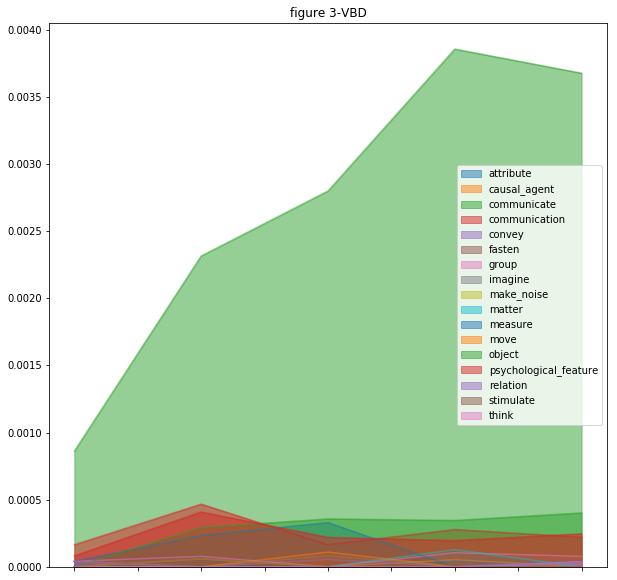

In [65]:
plt.rcParams['figure.figsize'] = [10, 10]
'''
dfJJ.plot.area(stacked=False)
plt.title('3-1-JJ')
#dfJJ.plot.bar()

dfNN.plot.area(stacked=False)
plt.title('3-2-NN')
#dfNN.plot.bar()
'''
dfVBD.plot.area(stacked=False)
plt.title('figure 3-VBD')
#dfVBD.plot.bar()

'''
dfRB.plot.area(stacked=False)

dfRBR.plot.area(stacked=False)
plt.title('3-4-RBR')
#dfRBR.plot.bar()
'''

As I have mentioned above, I have found that the writing style of Chehov has regularly changed with time passing by, so from the graph above, I want to find the changes suiting the variation. 

In JJ, adjective or numeral, ordinal, I found that the frequency of causal_agent ,group and object are becoming lower, and the frequency of psychological_feature is becoming higher. Which may suggest that Chekhov was writing more with the inner behaviours of human beings than outside descriptions. He focused more with the pyschological activities and can hit our heart easier.

In NN, noun, common, singular or mass, there is no obvious tendency which means his writing themes haven't changed so much. 

In VBD, verb, past tense, there is a hugh increase in communicate, which shows a shift from simple description to dialogs. The personality is better expressed with communications that by which the author build the character more vividly.

In RB, adverb, away is becoming less, which is really interesting.

In RBR,  adverb, comparative,there is no obvious tendency and maybe the emotions insides the articles haven't changed a lot.